In [94]:
import pandas as pd
import numpy as np
import os  
print("文件列表：",os.listdir("C:/Users/zuoya/Desktop/375cases_e/fs_pre_1921/2-testin-rj"))
data = pd.ExcelFile("C:/Users/zuoya/Desktop/375cases_e/fs_pre_1921/2-testin-rj/Embeded_FS/EmbededFS-results.xlsx")
sheet_names = data.sheet_names
print("列表名：",sheet_names )

文件列表： ['Embeded_FS', 'split']
列表名： ['STACK', 'NB', 'RF', 'KNN', 'SVM', 'LR']


In [95]:
# data = pd.read_csv("C:/Users/zuoya/Desktop/Code/ipypb-fs/08_Catboost/Catboost/egfr01_467/test_label.csv")
# y = data.label
# print(y)
# data = data.drop(columns=['id','label'])

# scaler = StandardScaler()#因此选用StandardScaler进行归一化
# scaler.fit(data.values)


# X = pd.DataFrame(data = scaler.transform(data.values), columns=data.columns)
# X['label']=y



# outputpath = "C:/Users/zuoya/Desktop/Code/ipypb-fs/08_Catboost/Catboost/egfr01_467/testZscore.csv"
# X.to_csv(outputpath,sep=',',index=False,header=True) 
# # df1是你想要输出的的DataFrame
# # index是否要索引，header是否要列名，True就是需要
# X.head()

In [96]:
# data = pd.read_excel("C:/Users/zuoya/Desktop/375cases_e/fs_pre_01/group1/RFE.xlsx", sheet_name='g1rfegb12')
name = 'SVM'
data = pd.read_excel("C:/Users/zuoya/Desktop/375cases_e/fs_pre_1921/2-testin-rj/Embeded_FS/EmbededFS-results.xlsx", sheet_name=name)

data.keys()
train = pd.read_csv("C:/Users/zuoya/Desktop/375cases_e/fs_pre_1921/2-testin-rj/split/Train-FS-ZSCORE-MI.csv")
test = pd.read_csv("C:/Users/zuoya/Desktop/375cases_e/fs_pre_1921/2-testin-rj/split/InternalTest-FS-ZSCORE-MI.csv")
test1 = pd.read_csv("C:/Users/zuoya/Desktop/375cases_e/fs_pre_1921/2-testin-rj/split/ExternalTest-FS-ZSCORE-MI.csv")
train=train[data.keys()]
train.shape
test=test[data.keys()]
test.shape
test1=test1[data.keys()]
test1.shape

train.to_csv("C:/Users/zuoya/Desktop/375cases_e/fs_pre_1921/2-testin-rj/split/Train-FS-ZSCORE-MI-SVM.csv",index=None)
# train.to_csv("C:/Users/zuoya/Desktop/Code/ipypb-fs/08_Catboost/Catboost/egfr01_467/trainZscore-RFERF5.csv",index=None)
# train.to_csv("C:/Users/zuoya/Desktop/Code/ipypb-fs/08_Catboost/Catboost/egfr01_467/trainZscore-RFERF11.csv",index=None)


# test.to_csv("C:/Users/zuoya/Desktop/Code/ipypb-fs/08_Catboost/Catboost/egfr01_467/testZscore-RFERF19.csv",index=None)
# test.to_csv("C:/Users/zuoya/Desktop/Code/ipypb-fs/08_Catboost/Catboost/egfr01_467/testZscore-RFERF5.csv",index=None)
test.to_csv("C:/Users/zuoya/Desktop/375cases_e/fs_pre_1921/2-testin-rj/split/InternalTest-FS-ZSCORE-MI-SVM.csv",index=None)


# test1.to_csv("C:/Users/zuoya/Desktop/Code/ipypb-fs/08_Catboost/Catboost/egfr01_467/test1Zscore-RFERF19.csv",index=None)
# test1.to_csv("C:/Users/zuoya/Desktop/Code/ipypb-fs/08_Catboost/Catboost/egfr01_467/test1Zscore-RFERF5.csv",index=None)
test1.to_csv("C:/Users/zuoya/Desktop/375cases_e/fs_pre_1921/2-testin-rj/split/ExternalTest-FS-ZSCORE-MI-SVM.csv",index=None)



In [97]:
train.shape

(70, 13)

In [98]:
test.shape

(18, 13)

In [99]:
#%% load liabrary
import os
import numpy as np
import xlrd
import scipy.io as io
import pandas as pd
import sklearn
from sklearn.model_selection import GridSearchCV
from sklearn.feature_selection import RFE
from sklearn import svm
from sklearn.model_selection import cross_val_score,ShuffleSplit, train_test_split
from sklearn.linear_model import Lasso, Ridge, LassoCV,LogisticRegressionCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import StackingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_validate
from sklearn import metrics
import itertools
import joblib
from scipy import stats
from sklearn import preprocessing
print("Import library done.\n")

Import library done.



In [100]:
# data = pd.read_csv("C:/Users/zuoya/Desktop/Code/ipypb-fs/08_Catboost/Catboost/egfr01_467/test_label.csv")
# y = data.label
# print(y)
# data = data.drop(columns=['id','label'])

# scaler = StandardScaler()#因此选用StandardScaler进行归一化
# scaler.fit(data.values)


# X = pd.DataFrame(data = scaler.transform(data.values), columns=data.columns)
# X['label']=y



# outputpath = "C:/Users/zuoya/Desktop/Code/ipypb-fs/08_Catboost/Catboost/egfr01_467/testZscore.csv"
# X.to_csv(outputpath,sep=',',index=False,header=True) 
# # df1是你想要输出的的DataFrame
# # index是否要索引，header是否要列名，True就是需要
# X.head()

In [101]:
# DIABETES PREDICTION MODEL

# CLASSIFICATION MODELS - HOLDOUT

'''
Steps to follow:
    - Load the saved dataset
    - General View
    - Modeling
        - Base models: LogisticRegression, GaussianNB, KNeighborsClassifier, SVC, MLPClassifier, DecisionTreeClassifier,
                       BaggingClassifier, RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier,
                       XGBClassifier, LGBMClassifier, CatBoostClassifier, NGBClassifier
    - Model Evaluation
    - Model Tuning
    - Model Results
'''

# Import dependencies
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno

from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from ngboost import NGBClassifier

import os
import pickle

from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve, classification_report, confusion_matrix, plot_confusion_matrix
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, StratifiedKFold

from yellowbrick.classifier import ConfusionMatrix, ClassificationReport, ROCAUC, ClassPredictionError
from yellowbrick.model_selection import LearningCurve, FeatureImportances


import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=UserWarning)
pd.pandas.set_option('display.max_columns', None)
pd.set_option('display.float_format', lambda x: '%.3f' % x)


# Load the preprocessed dataset
# diabetes_preprocessed = pd.read_csv('./diabetes_prepared.csv')

# train.to_csv("C:/Users/zuoya/Desktop/Code/ipypb-fs/08_Catboost/Catboost/EGFR1921/trainZscore-RFERF17-1.csv",index=None)
# train.to_csv("C:/Users/zuoya/Desktop/Code/ipypb-fs/08_Catboost/Catboost/EGFR1921/trainZscore-RFEGB8.csv",index=None)
# train.to_csv("C:/Users/zuoya/Desktop/Code/ipypb-fs/08_Catboost/Catboost/EGFR1921/trainZscore-RFERF17-42.csv",index=None)

# diabetes_preprocessed = pd.read_csv("C:/Users/zuoya/Desktop/375cases_e/fs_pre_01/group1/new-auc/train_rferf17.csv")
# diabetes_preprocessed = pd.read_csv("C:/Users/zuoya/Desktop/375cases_e/fs_pre_01/group1/new-auc/train_rfegb5.csv")
pathdata="C:/Users/zuoya/Desktop/375cases_e/fs_pre_1921/2-testin-rj/split/Train-FS-ZSCORE-MI-SVM.csv"
diabetes_preprocessed = pd.read_csv(pathdata)




# diabetes_preprocessed = pd.read_csv("C:/Users/zuoya/Desktop/Code/ipypb-fs/08_Catboost/Catboost/Results_HRFS01/catboost/train.csv")
df = diabetes_preprocessed.copy()
# df = df.drop(columns="id",axis=1)

## GENERAL VIEW

df.head()
df.shape
df.info()
df.columns
df.index
df.describe([0.10, 0.25, 0.50, 0.75, 0.90, 0.95, 0.99]).T

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70 entries, 0 to 69
Data columns (total 13 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   CT_wavelet-LHL_firstorder_Maximum       70 non-null     float64
 1   CT_wavelet-LHH_glcm_Imc1                70 non-null     float64
 2   CT_wavelet2-LHH_firstorder_Mean         70 non-null     float64
 3   CT_wavelet-LHH_glcm_ClusterShade        70 non-null     float64
 4   CT_original_glcm_ClusterShade           70 non-null     float64
 5   CT_original_shape_Elongation            70 non-null     float64
 6   CT_wavelet2-LHH_firstorder_Median       70 non-null     float64
 7   PET_original_firstorder_90Percentile    70 non-null     float64
 8   CT_wavelet2-HHH_firstorder_Median       70 non-null     float64
 9   CT_wavelet-LHH_firstorder_Maximum       70 non-null     float64
 10  CT_wavelet2-HLH_firstorder_Mean         70 non-null     float64


count   mean   std    min    10%  \
CT_wavelet-LHL_firstorder_Maximum      70.000  0.000 1.007 -1.684 -1.142   
CT_wavelet-LHH_glcm_Imc1               70.000  0.000 1.007 -5.804 -1.032   
CT_wavelet2-LHH_firstorder_Mean        70.000  0.000 1.007 -3.034 -0.998   
CT_wavelet-LHH_glcm_ClusterShade       70.000 -0.000 1.007 -5.969 -0.801   
CT_original_glcm_ClusterShade          70.000  0.000 1.007 -2.382 -1.046   
CT_original_shape_Elongation           70.000 -0.000 1.007 -2.766 -1.384   
CT_wavelet2-LHH_firstorder_Median      70.000  0.000 1.007 -6.563 -0.456   
PET_original_firstorder_90Percentile   70.000  0.000 1.007 -1.227 -0.966   
CT_wavelet2-HHH_firstorder_Median      70.000 -0.000 1.007 -5.430 -0.578   
CT_wavelet-LHH_firstorder_Maximum      70.000  0.000 1.007 -1.927 -1.197   
CT_wavelet2-HLH_firstorder_Mean        70.000  0.000 1.007 -3.189 -1.007   
CT_wavelet-LLH_glcm_DifferenceVariance 70.000 -0.000 1.007 -0.928 -0.738   
label                                  70.000  0.500 0.504  0.000  0.000   

                                          25%    50%   75%   90%   95%   99%  \
CT_wavelet-LHL_firstorder_Maximum      -0.786 -0.174 0.639 1.349 1.773 2.470   
CT_wavelet-LHH_glcm_Imc1               -0.318  0.248 0.624 0.757 0.935 1.016   
CT_wavelet2-LHH_firstorder_Mean        -0.407 -0.087 0.210 0.655 1.397 4.162   
CT_wavelet-LHH_glcm_ClusterShade       -0.037  0.150 0.276 0.563 1.068 2.254   
CT_original_glcm_ClusterShade          -0.144  0.127 0.290 0.512 0.590 2.964   
CT_original_shape_Elongation           -0.584  0.114 0.733 1.194 1.415 1.638   
CT_wavelet2-LHH_firstorder_Median      -0.102  0.013 0.178 0.558 1.239 2.099   
PET_original_firstorder_90Percentile   -0.747 -0.351 0.774 1.585 2.197 2.349   
CT_wavelet2-HHH_firstorder_Median      -0.226  0.062 0.259 0.580 1.358 2.592   
CT_wavelet-LHH_firstorder_Maximum      -0.708  0.036 0.596 1.301 1.428 2.544   
CT_wavelet2-HLH_firstorder_Mean        -0.201  0.096 0.308 0.474 0.862 3.848   
CT_wavelet-LLH_glcm_DifferenceVariance -0.648 -0.470 0.337 1.430 2.146 3.451   
label                                   0.000  0.500 1.000 1.000 1.000 1.000   

                                         max  
CT_wavelet-LHL_firstorder_Maximum      2.759  
CT_wavelet-LHH_glcm_Imc1               1.097  
CT_wavelet2-LHH_firstorder_Mean        4.484  
CT_wavelet-LHH_glcm_ClusterShade       2.463  
CT_original_glcm_ClusterShade          5.800  
CT_original_shape_Elongation           1.665  
CT_wavelet2-LHH_firstorder_Median      2.291  
PET_original_firstorder_90Percentile   2.452  
CT_wavelet2-HHH_firstorder_Median      3.586  
CT_wavelet-LHH_firstorder_Maximum      2.847  
CT_wavelet2-HLH_firstorder_Mean        4.057  
CT_wavelet-LLH_glcm_DifferenceVariance 3.518  
label                                  1.000

In [102]:
# Check for missing values
df.isnull().values.any()
df.isnull().sum().sort_values(ascending=False)


CT_wavelet-LHL_firstorder_Maximum         0
CT_wavelet-LHH_glcm_Imc1                  0
CT_wavelet2-LHH_firstorder_Mean           0
CT_wavelet-LHH_glcm_ClusterShade          0
CT_original_glcm_ClusterShade             0
CT_original_shape_Elongation              0
CT_wavelet2-LHH_firstorder_Median         0
PET_original_firstorder_90Percentile      0
CT_wavelet2-HHH_firstorder_Median         0
CT_wavelet-LHH_firstorder_Maximum         0
CT_wavelet2-HLH_firstorder_Mean           0
CT_wavelet-LLH_glcm_DifferenceVariance    0
label                                     0
dtype: int64

In [12]:

# pathdata="C:/Users/zuoya/Desktop/EJR/2023-383CASES-01-CLINICS.csv"
# diabetes_preprocessed = pd.read_csv(pathdata)




# # diabetes_preprocessed = pd.read_csv("C:/Users/zuoya/Desktop/Code/ipypb-fs/08_Catboost/Catboost/Results_HRFS01/catboost/train.csv")
# df = diabetes_preprocessed.copy()

In [103]:
X_train = pd.read_csv("C:/Users/zuoya/Desktop/375cases_e/fs_pre_1921/2-testin-rj/split/Train-FS-ZSCORE-MI-SVM.csv")
y_train = X_train['label']
X_train = X_train.drop(labels=['label'], axis=1)

X_test = pd.read_csv("C:/Users/zuoya/Desktop/375cases_e/fs_pre_1921/2-testin-rj/split/InternalTest-FS-ZSCORE-MI-SVM.csv")
y_test = X_test['label']
X_test = X_test.drop(labels=['label'], axis=1)

In [104]:
# # MODELING


# # Define dependent and independent variables
# y = df["label"]
# X = df.drop(["label"], axis=1)

# # y = df["Outcome"]
# # X = df.drop(["Outcome"], axis=1)

# # Split the dataset into train and test sets
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=520)

In [105]:
# X_train.to_csv("C:/Users/zuoya/Desktop/EJR/xtrain-2023-383CASES-01-CLINICS.csv")

In [106]:
# X_test.to_csv("C:/Users/zuoya/Desktop/EJR/xtest-2023-383CASES-01-CLINICS.csv")

In [107]:
# y_train.to_csv("C:/Users/zuoya/Desktop/EJR/ytrain-2023-383CASES-01-CLINICS.csv")

In [108]:
# y_test.to_csv("C:/Users/zuoya/Desktop/EJR/ytest-2023-383CASES-01-CLINICS.csv")

In [109]:
# Evaluate each model in turn by looking at train and test errors and scores
from sklearn.metrics import roc_auc_score
def evaluate_classification_model_holdout(models):
    # # Split the dataset into train and test sets
    # X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=123456)

    # Define lists to track names and results for models
    names = []
    train_accuracy_results = []
    test_accuracy_results = []

    print('################ Accuracy scores for test set for the models: ################\n')
    for name, model in models:
        model.fit(X_train, y_train)
        y_train_pred = model.predict(X_train)
        y_test_pred = model.predict(X_test)

#         train_accuracy_result = accuracy_score(y_train, y_train_pred)
#         test_accuracy_result = accuracy_score(y_test, y_test_pred)
#         train_accuracy_results.append(train_accuracy_result)
#         test_accuracy_results.append(test_accuracy_result)
        train_accuracy_result = roc_auc_score(y_train, y_train_pred)
        test_accuracy_result = roc_auc_score(y_test, y_test_pred)
        train_accuracy_results.append(train_accuracy_result)
        test_accuracy_results.append(test_accuracy_result)

        names.append(name)
        msg = "%s: %f" % (name, test_accuracy_result)
        print(msg)

    print('\n################ Train and test results for the model: ################\n')
    data_result = pd.DataFrame({'models': names,
                                'accuracy_train': train_accuracy_results,
                                'accuracy_test': test_accuracy_results})
    print(data_result)

    # Plot the results
    plt.figure(figsize=(15, 12))
    sns.barplot(x='accuracy_test', y='models', data=data_result.sort_values(by="accuracy_test", ascending=False), color="r")
    plt.xlabel('AUC Scores')
    plt.ylabel('Models')
    plt.title('AUC Scores For Test Set')
    plt.show()

In [110]:
# Define a function to plot feature_importances
def plot_feature_importances(tuned_model):
    feature_importances = pd.DataFrame({'Importance': tuned_model.feature_importances_ * 100, 'Feature': X_train.columns})
    plt.figure()
    sns.barplot(x="Importance", y="Feature", data=feature_importances.sort_values(by="Importance", ascending=False))
    plt.title('Feature Importance') # TODO tuned_model.__name__
    plt.show()


In [111]:
# Function to plot confusion_matrix
def plot_confusion_matrix(model, X_test, y_test, normalize=True):
    plot_confusion_matrix(model, X_test, y_test, cmap=plt.cm.Blues, normalize=normalize)
    plt.figure(figsize=(15, 15))
    plt.show()

In [112]:
# Function to plot confusion_matrix
def plot_confusion_matrix_yb(model):
    # # Split the dataset into train and test sets
    # X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=123456)
    model_cm = ConfusionMatrix(model, percent=True, class_names = ["EGFR E19", "EGFR E21"], cmap='Blues')
    model_cm.fit(X_train, y_train)
    model_cm.score(X_test, y_test)
    model_cm.show();

In [113]:
# Function to plot classification_report by using yellowbrick
def plot_classification_report_yb(model):
    # # Split the dataset into train and test sets
    # X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=123456)
    visualizer = ClassificationReport(model,class_names = ["EGFR E19", "EGFR E21"], support=True, cmap='Blues')
    visualizer.fit(X_train, y_train)  # Fit the visualizer and the model
    visualizer.score(X_test, y_test)  # Evaluate the model on the test data
    visualizer.poof()
    # visualizer.show();

In [114]:
# Funtion to plot ROC-AUC Curve
def plot_roc_auc_curve(model):
    model_roc_auc = roc_auc_score(y_test, model.predict(X_test))
    fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(X_test)[:, 1])
    plt.figure()
    plt.plot(fpr, tpr, label='AUC (area = %0.4f)' % model_roc_auc)
    plt.plot([0, 1], [0, 1], 'r--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(model,' Receiver operating characteristic')
    plt.legend(loc="lower right")
    plt.show()

In [115]:
# Funtion to plot ROC-AUC Curve by using yellowbrick
def plot_roc_auc_curve_yb(model):
    # # Split the dataset into train and test sets
    # X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=123456)
    visualizer = ROCAUC(model, class_names = ["EGFR E19", "EGFR E21"])
    visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
    visualizer.score(X_test, y_test)  # Evaluate the model on the test data
    visualizer.show();  # Finalize and show the figure

In [116]:
# Function to plot prediction errors
def plot_class_prediction_error_yb(model):
    # # Split the dataset into train and test sets
    # X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=123456)
    # Instantiate the classification model and visualizer
    visualizer = ClassPredictionError(model, class_names = ["EGFR E19", "EGFR E21"], cmap='Blues')
    # Fit the training data to the visualizer
    visualizer.fit(X_train, y_train)
    # Evaluate the model on the test data
    visualizer.score(X_test, y_test)
    # Draw visualization
    visualizer.show();

In [117]:
# Function to plot learning curves
def plot_learning_curve(model_tuned):
    # Create the learning curve visualizer
    cv = StratifiedKFold(n_splits=12)
    sizes = np.linspace(0.3, 1.0, 10)
    # Instantiate the classification model and visualizer
    visualizer = LearningCurve(model_tuned, cv=cv, scoring='accuracy', train_sizes=sizes, n_jobs=4)
    visualizer.fit(X, y)  # Fit the data to the visualizer
    visualizer.show()  # Finalize and render the figure

In [118]:
# Function to report results quickly
def report_results_quickly(model):
    fig, axes = plt.subplots(2, 2,figsize=(15, 9))
    model = model
    visualgrid = [FeatureImportances(model, ax=axes[0][0]),
                  ConfusionMatrix(model, ax=axes[0][1], cmap='Blues'),
                  ClassificationReport(model, ax=axes[1][0], cmap='Blues'),
                  ROCAUC(model, ax=axes[1][1])]
    for viz in visualgrid:
        viz.fit(X_train, y_train)
        viz.score(X_test, y_test)
        viz.finalize()
    plt.show()

In [119]:
# Function to plot all the results
def plot_results(model):
    plot_confusion_matrix_yb(model)
    plot_classification_report_yb(model)
    plot_roc_auc_curve_yb(model)
    plot_class_prediction_error_yb(model)


In [120]:
def Save_to_Csv(data, file_name, Save_format = 'csv', Save_type = 'col'):
    # data
    # 输入为一个字典，格式： { '列名称': 数据,....} 
    # 列名即为CSV中数据对应的列名， 数据为一个列表
    
    # file_name 存储文件的名字
    # Save_format 为存储类型， 默认csv格式， 可改为 excel
    # Save_type 存储类型 默认按列存储， 否则按行存储
    
    # 默认存储在当前路径下
    
    import pandas as pd
    import numpy as np
    
    Name = []
    times = 0
 
    if Save_type == 'col':
        for name, List in data.items():
            Name.append(name)
            if times == 0:
                Data = np.array(List).reshape(-1,1)
            else:
                Data = np.hstack((Data, np.array(List).reshape(-1,1)))
                
            times += 1
            
        Pd_data = pd.DataFrame(columns=Name, data=Data) 
        
    else:
        for name, List in data.items():
            Name.append(name)
            if times == 0:
                Data = np.array(List)
            else:
                Data = np.vstack((Data, np.array(List)))
        
            times += 1
    
        Pd_data = pd.DataFrame(index=Name, data=Data)  
    
    if Save_format == 'csv':
        Pd_data.to_csv('./'+ file_name +'.csv',encoding='utf-8')
    else:
        Pd_data.to_excel('./'+ file_name +'.xls',encoding='utf-8')

In [121]:
# # MODELING


# # Define dependent and independent variables
# y = df["label"]
# X = df.drop(["label"], axis=1)

# # y = df["Outcome"]
# # X = df.drop(["Outcome"], axis=1)

# # Split the dataset into train and test sets
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=520)

In [122]:
# See the results for base models

base_models = [('LogisticRegression', LogisticRegression()),
               ('Naive Bayes', GaussianNB()),
               ('KNN', KNeighborsClassifier()),
               ('SVM', SVC()),
               ('ANN', MLPClassifier()),
               ('CART', DecisionTreeClassifier()),
               ('BaggedTrees', BaggingClassifier()),
               ('RF', RandomForestClassifier()),
               ('AdaBoost', AdaBoostClassifier()),
               ('GBM', GradientBoostingClassifier()),
               ("XGBoost", XGBClassifier()),
               ("LightGBM", LGBMClassifier()),
               ("CatBoost", CatBoostClassifier(verbose=False)),
               ("NGBoost", NGBClassifier(verbose=False))]

################ Accuracy scores for test set for the models: ################

LogisticRegression: 0.722222
Naive Bayes: 0.444444
KNN: 0.388889
SVM: 0.500000
ANN: 0.611111
CART: 0.500000
BaggedTrees: 0.444444
RF: 0.611111
AdaBoost: 0.444444
GBM: 0.444444
XGBoost: 0.666667
LightGBM: 0.722222
CatBoost: 0.611111
NGBoost: 0.611111

################ Train and test results for the model: ################

                models  accuracy_train  accuracy_test
0   LogisticRegression           0.671          0.722
1          Naive Bayes           0.629          0.444
2                  KNN           0.657          0.389
3                  SVM           0.829          0.500
4                  ANN           0.943          0.611
5                 CART           1.000          0.500
6          BaggedTrees           0.986          0.444
7                   RF           1.000          0.611
8             AdaBoost           1.000          0.444
9                  GBM           1.000          0.444
10

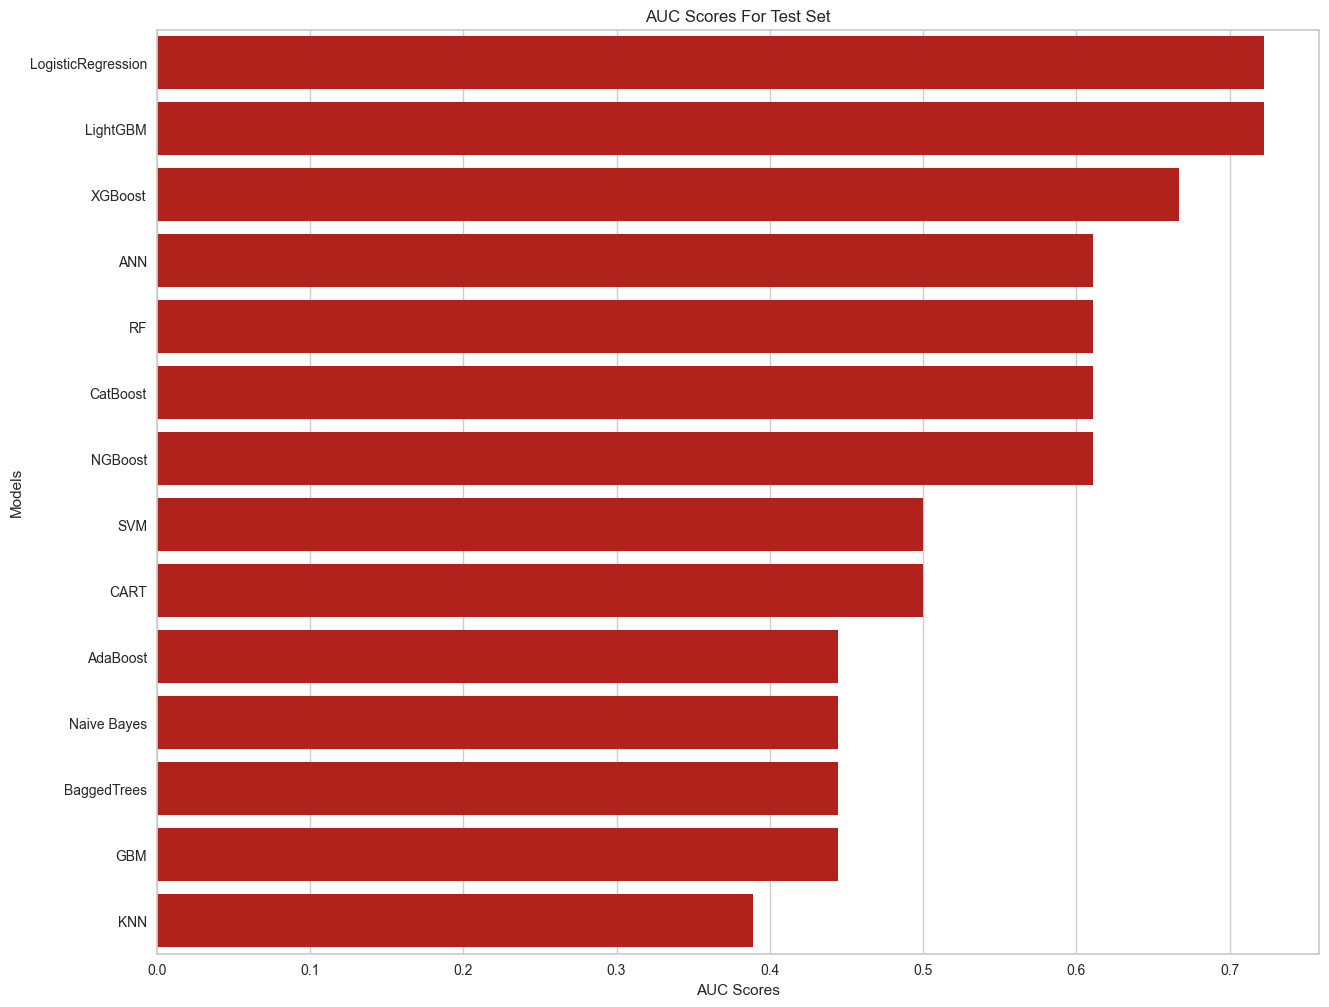

In [123]:
evaluate_classification_model_holdout(base_models)

In [27]:
# For some distance-based models, we need to scale the features in order to
# increase the speed and the performance/accuracy level of the model.
# We can also see the effect of scaling type by changing the sclaer function.
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler, StandardScaler, MinMaxScaler

################ Accuracy scores for test set for the models: ################

GaussianNB: 0.583333

################ Train and test results for the model: ################

       models  accuracy_train  accuracy_test
0  GaussianNB           0.620          0.583


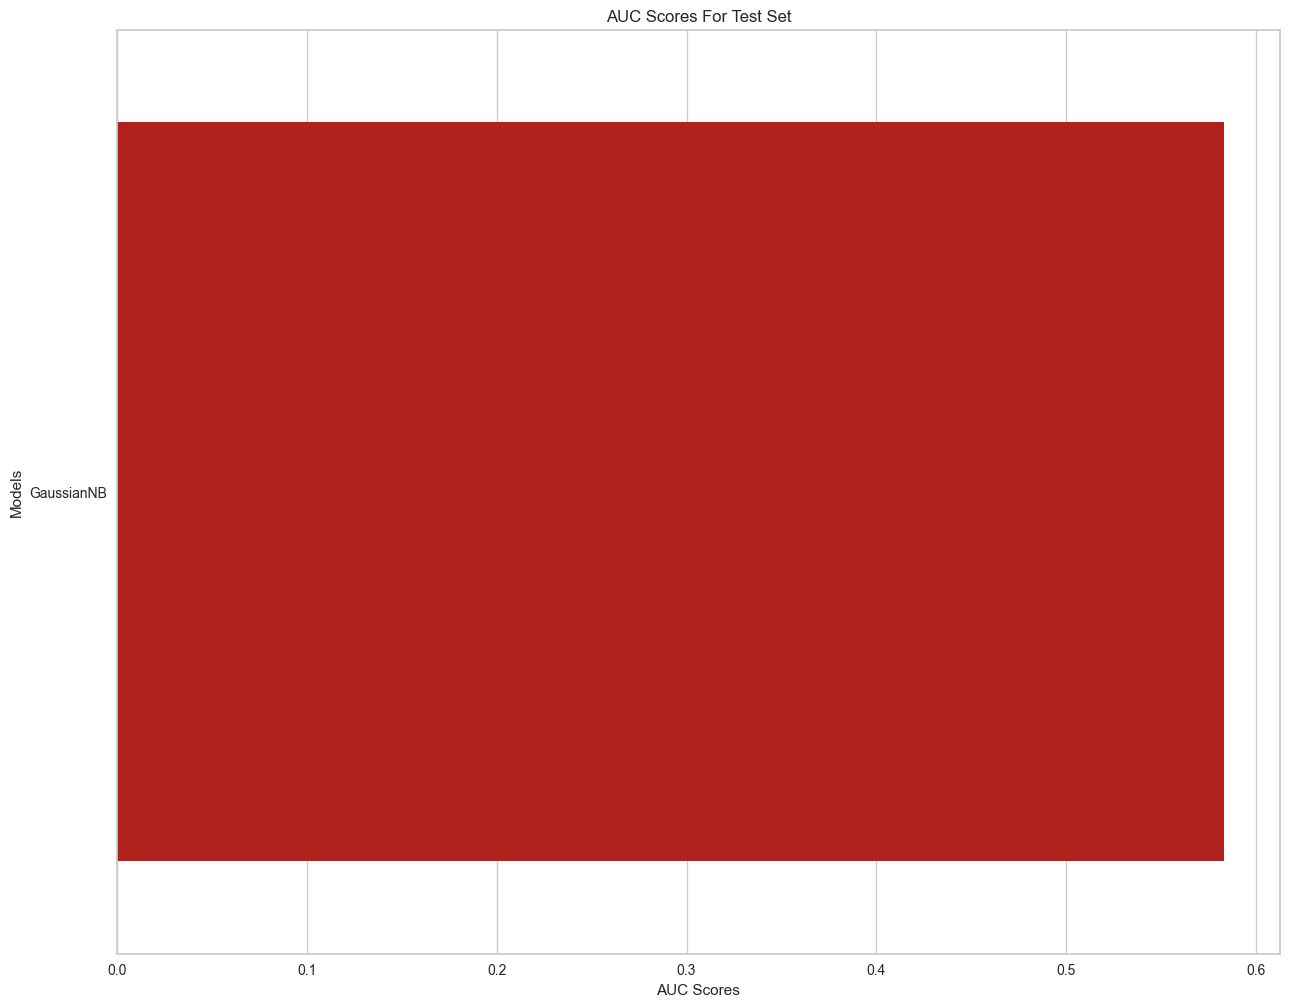

In [28]:
# LogisticRegression with make_pipeline
GNBreg = make_pipeline(MinMaxScaler(), GaussianNB())
evaluate_classification_model_holdout([('GaussianNB', GNBreg)]) # 0.805 instead of  0.805195

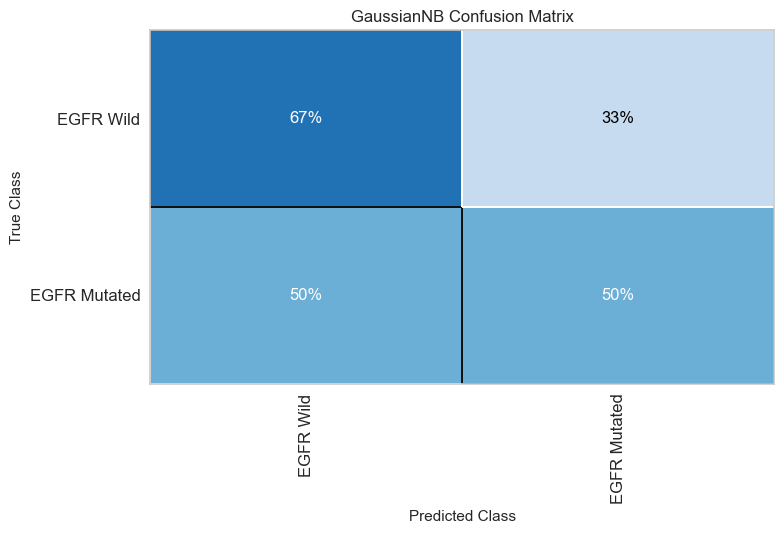

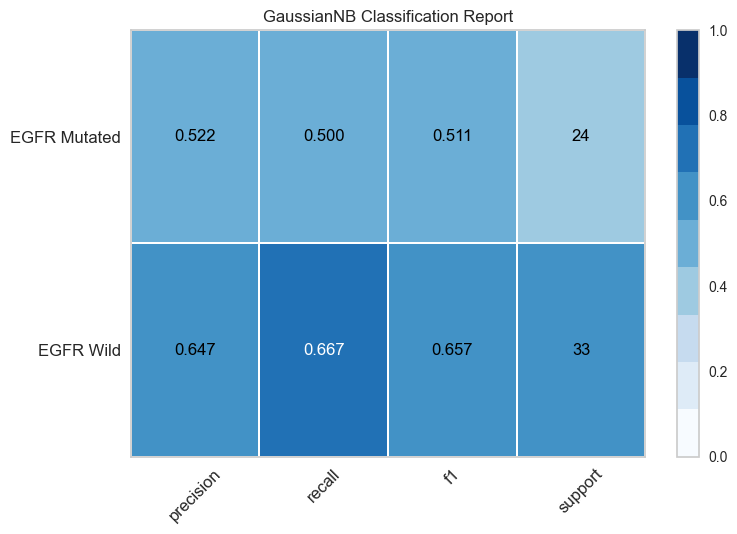

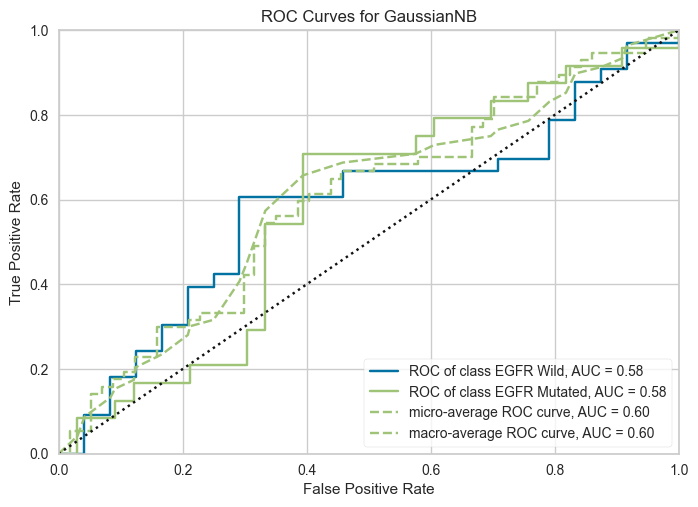

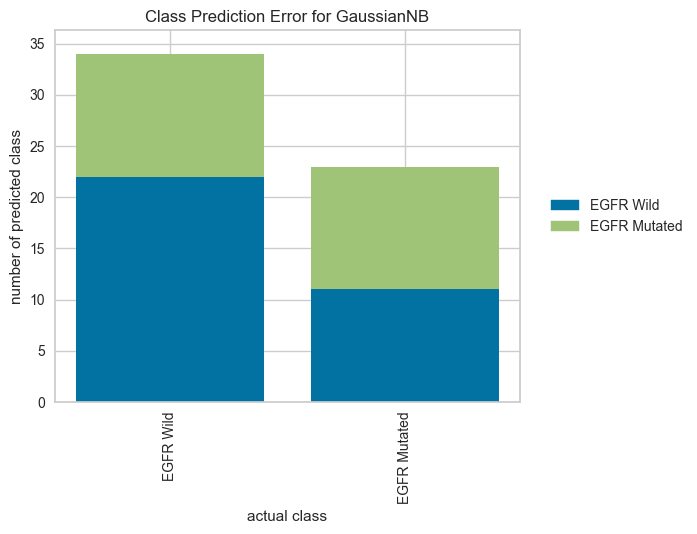

NameError: name 'X' is not defined

In [29]:
# plot_feature_importances(GNBreg)
plot_results(GNBreg)
# report_results_quickly(GNBreg)
plot_learning_curve(GNBreg)

################ Accuracy scores for test set for the models: ################

KNN: 0.585227

################ Train and test results for the model: ################

  models  accuracy_train  accuracy_test
0    KNN           0.696          0.585


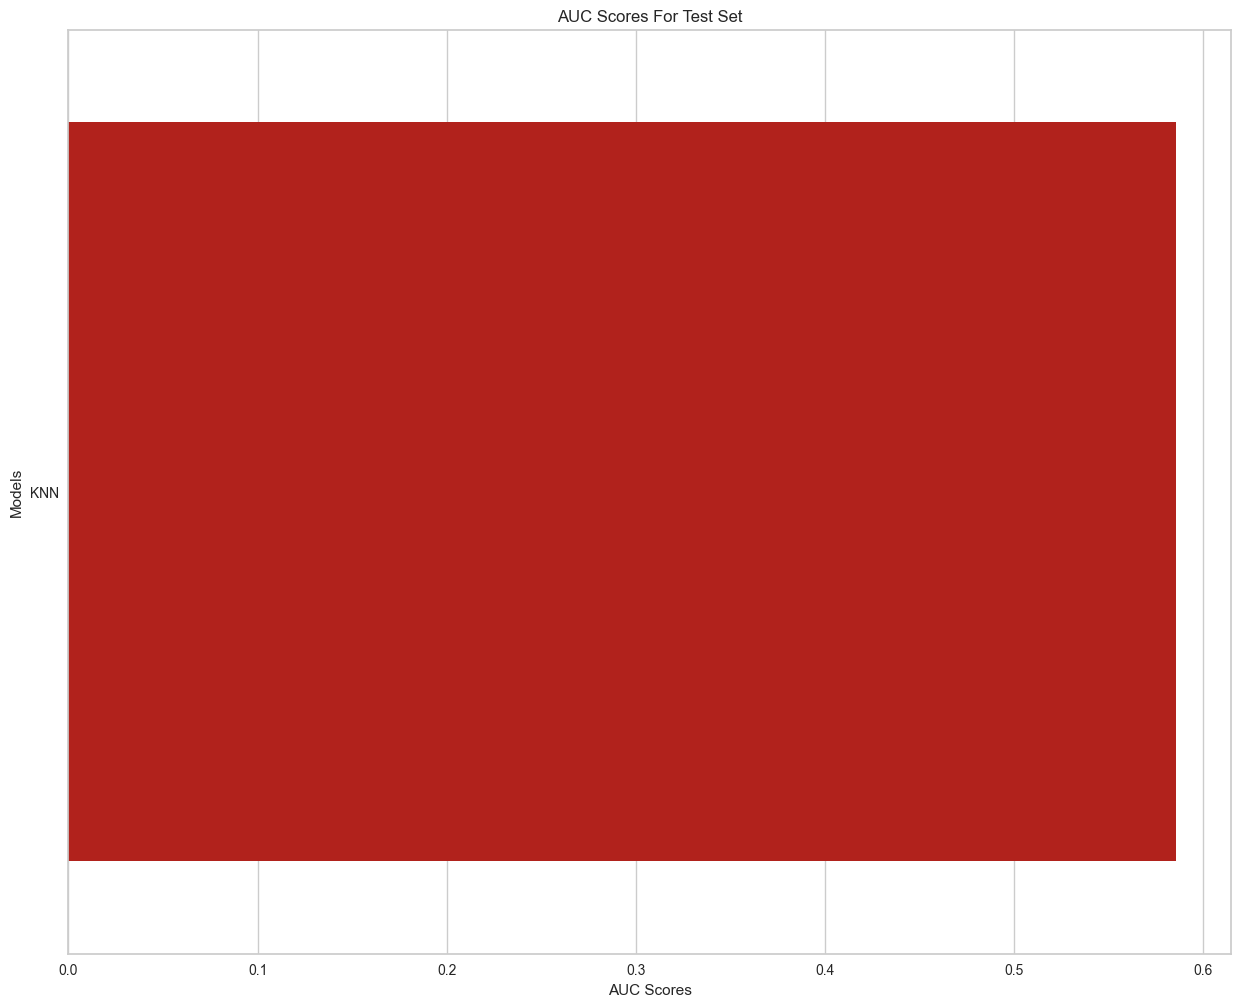

In [30]:
# LogisticRegression with make_pipeline
KNNreg = make_pipeline(MinMaxScaler(), KNeighborsClassifier())
evaluate_classification_model_holdout([('KNN', KNNreg)]) # 0.805 instead of  0.805195

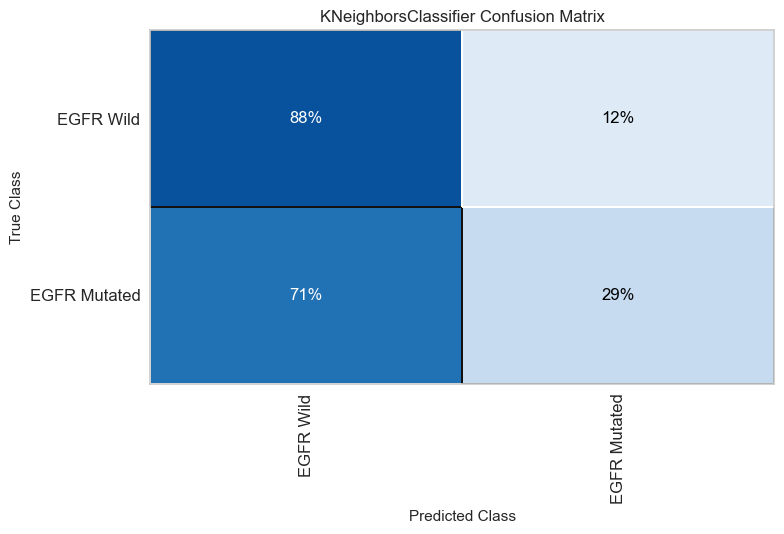

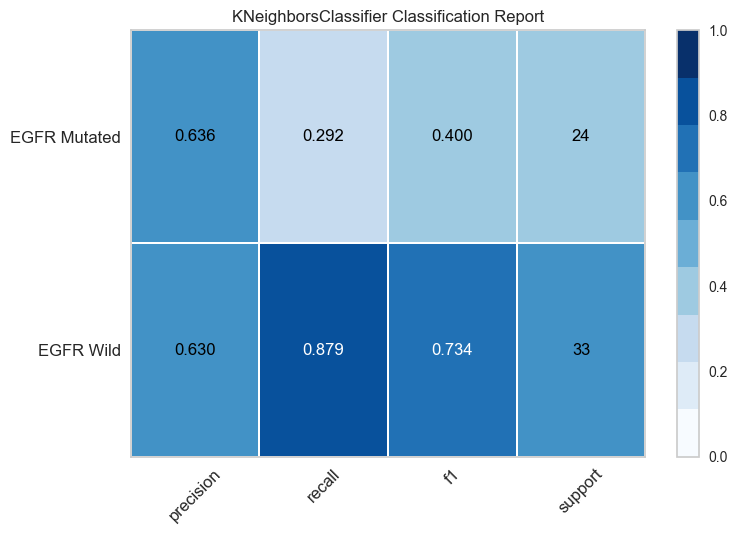

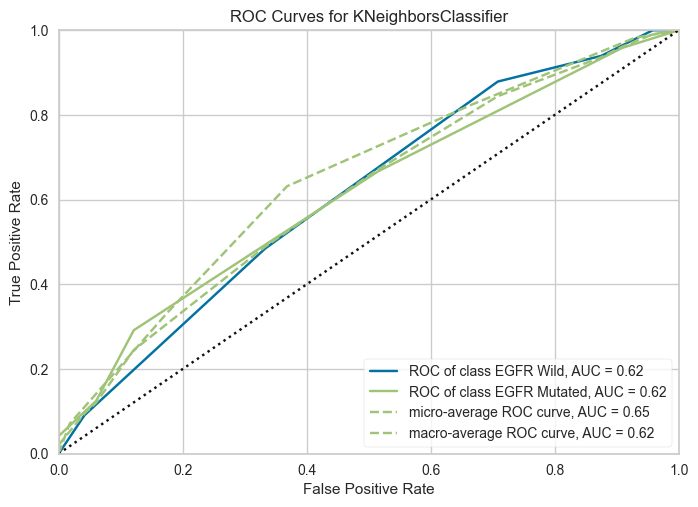

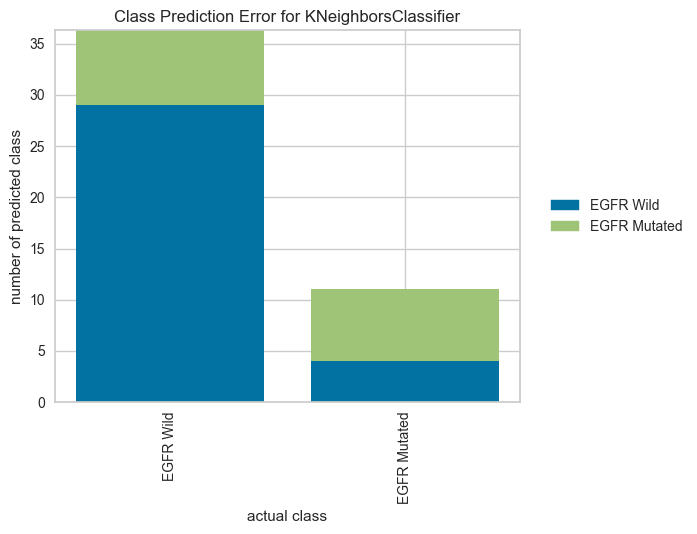

NameError: name 'X' is not defined

In [31]:
# plot_feature_importances(KNNreg)
plot_results(KNNreg)
# report_results_quickly(KNNreg)
plot_learning_curve(KNNreg)

In [ ]:
# LogisticRegression with make_pipeline
MLPreg = make_pipeline(MinMaxScaler(), MLPClassifier())
evaluate_classification_model_holdout([('MLP', MLPreg)]) # 0.805 instead of  0.805195

In [32]:
# plot_feature_importances(MLPreg)
plot_results(MLPreg)
# report_results_quickly(MLPreg)
plot_learning_curve(MLPreg)

NameError: name 'MLPreg' is not defined

################ Accuracy scores for test set for the models: ################

DT: 0.490530

################ Train and test results for the model: ################

  models  accuracy_train  accuracy_test
0     DT           1.000          0.491


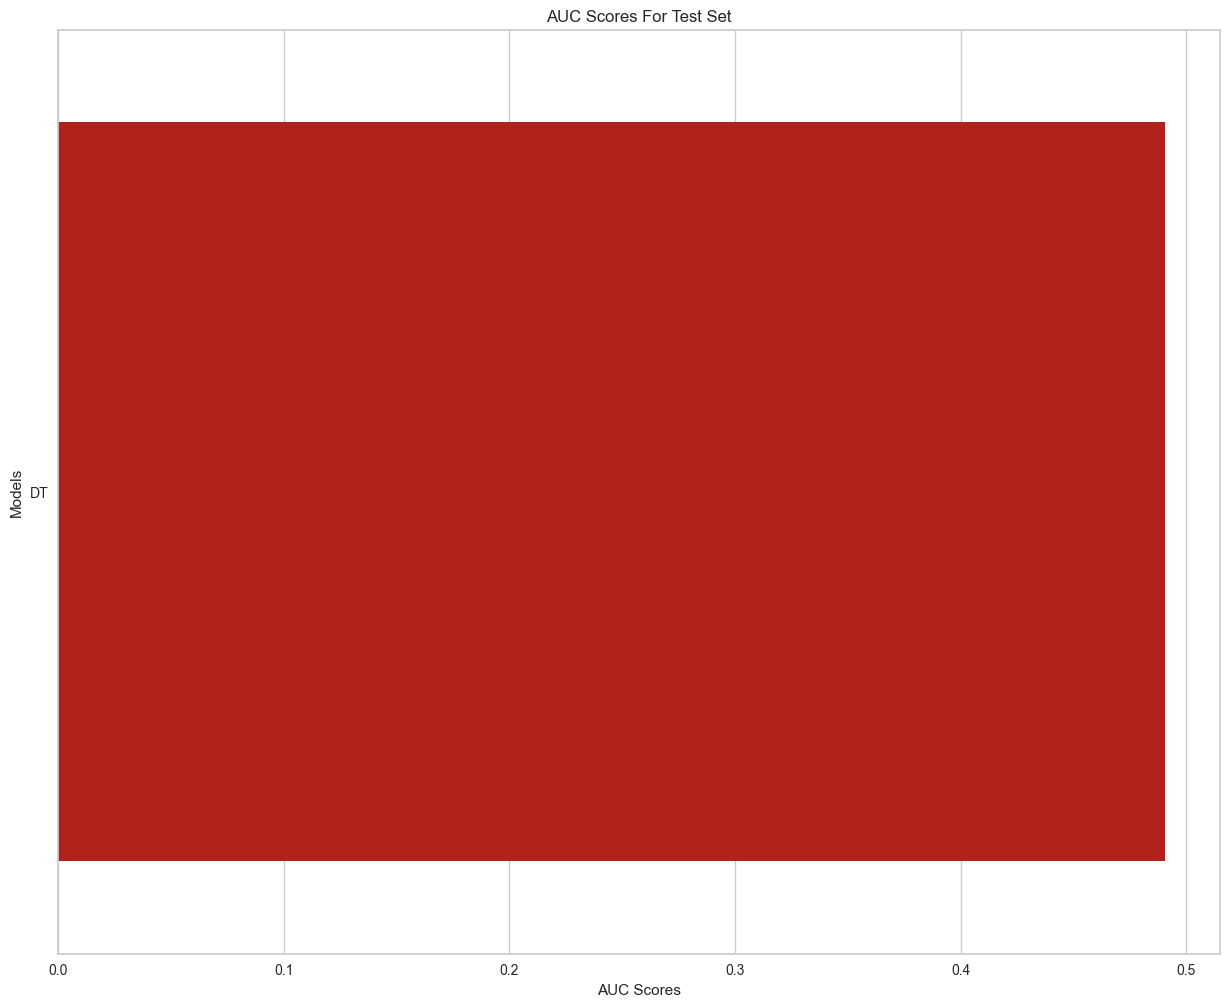

In [33]:
# LogisticRegression with make_pipeline
DTreg = make_pipeline(MinMaxScaler(), DecisionTreeClassifier())
evaluate_classification_model_holdout([('DT', DTreg)]) # 0.805 instead of  0.805195

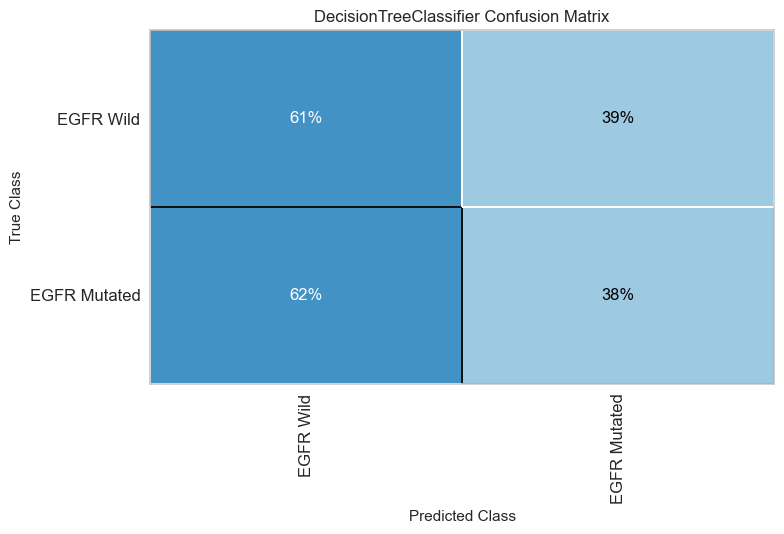

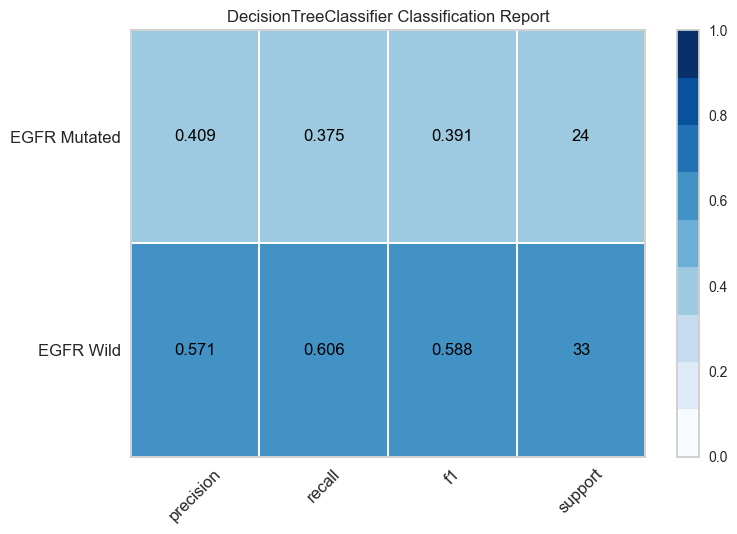

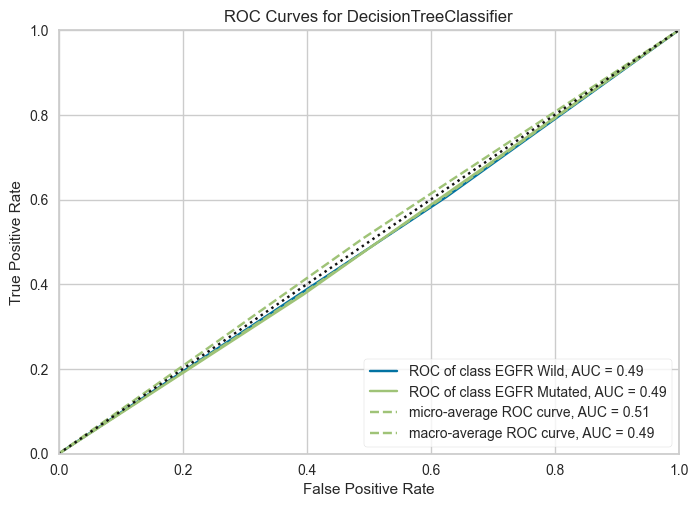

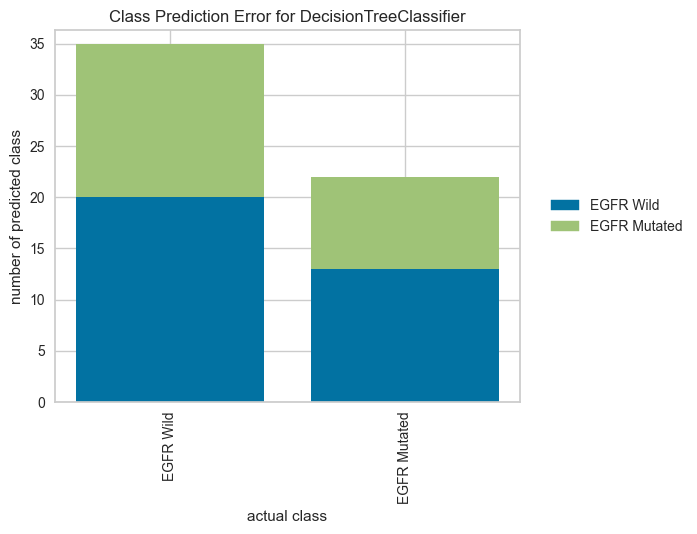

NameError: name 'X' is not defined

In [34]:
# plot_feature_importances(DTreg)
plot_results(DTreg)
# report_results_quickly(DTreg)
plot_learning_curve(DTreg)

################ Accuracy scores for test set for the models: ################

BC: 0.507576

################ Train and test results for the model: ################

  models  accuracy_train  accuracy_test
0     BC           0.976          0.508


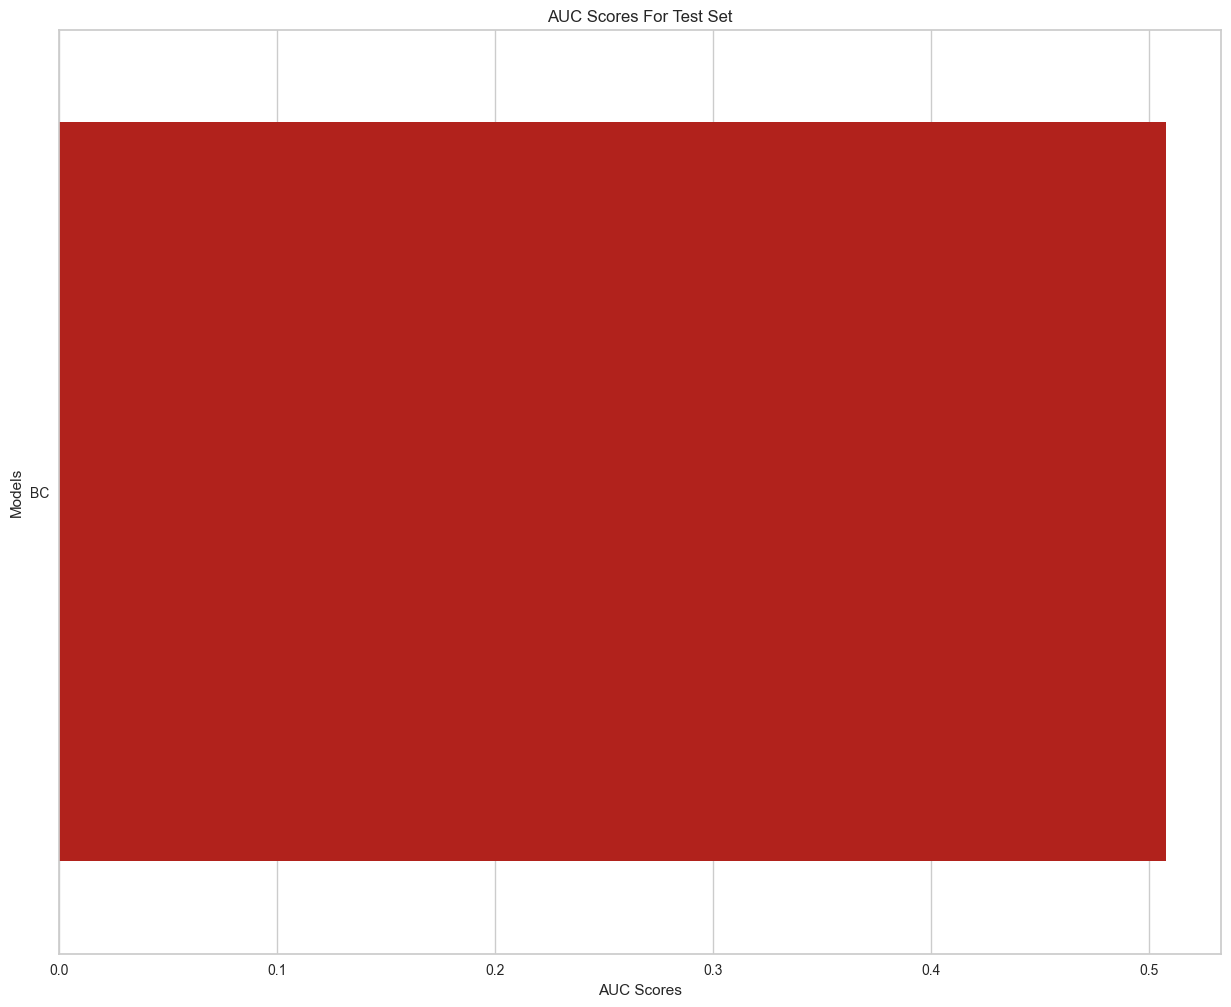

In [35]:
# LogisticRegression with make_pipeline
BCreg = make_pipeline(MinMaxScaler(), BaggingClassifier())
evaluate_classification_model_holdout([('BC', BCreg)]) # 0.805 instead of  0.805195

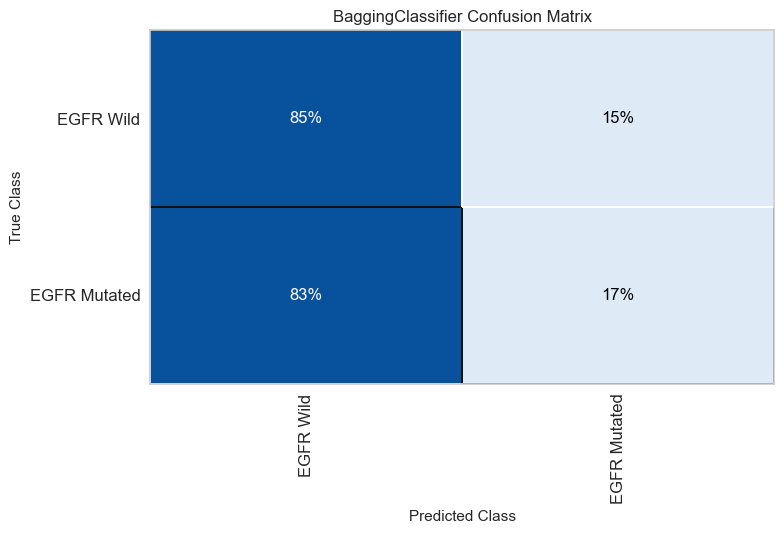

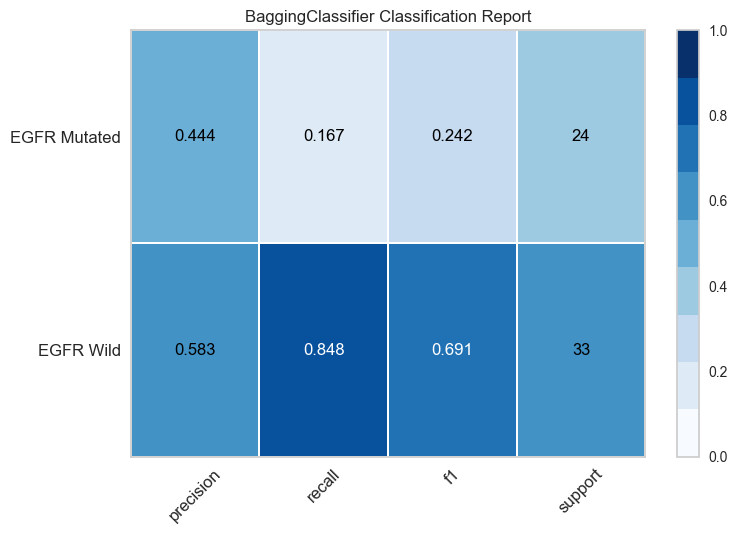

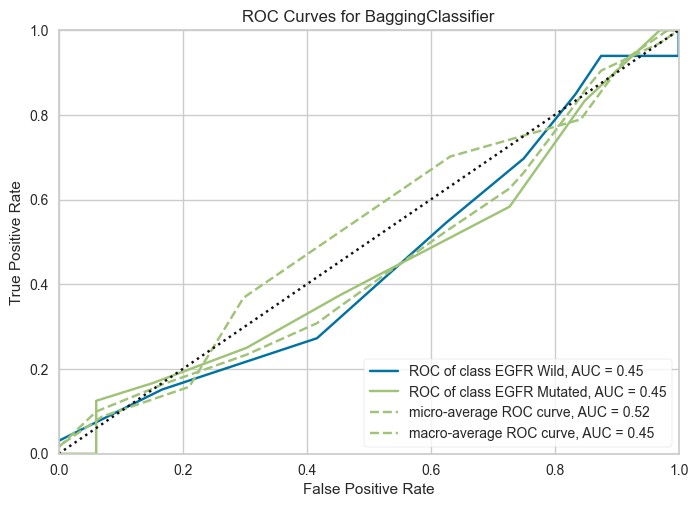

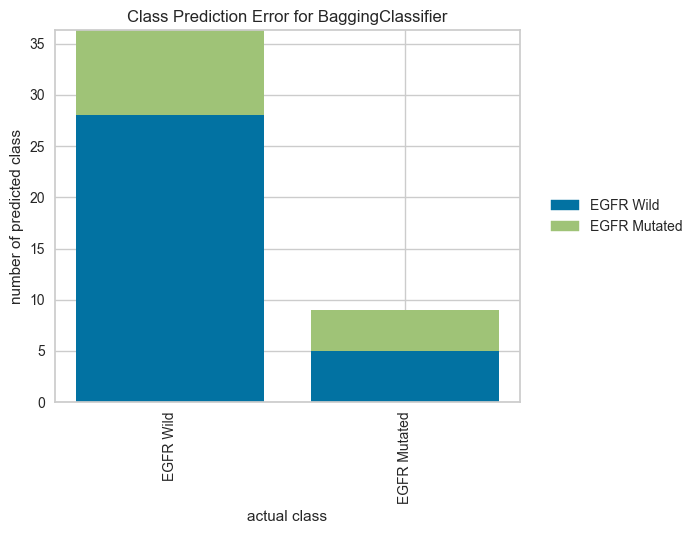

NameError: name 'X' is not defined

In [36]:
# plot_feature_importances(BCreg)
plot_results(BCreg)
# report_results_quickly(BCreg)
plot_learning_curve(BCreg)

################ Accuracy scores for test set for the models: ################

GBM: 0.482955

################ Train and test results for the model: ################

  models  accuracy_train  accuracy_test
0    GBM           1.000          0.483


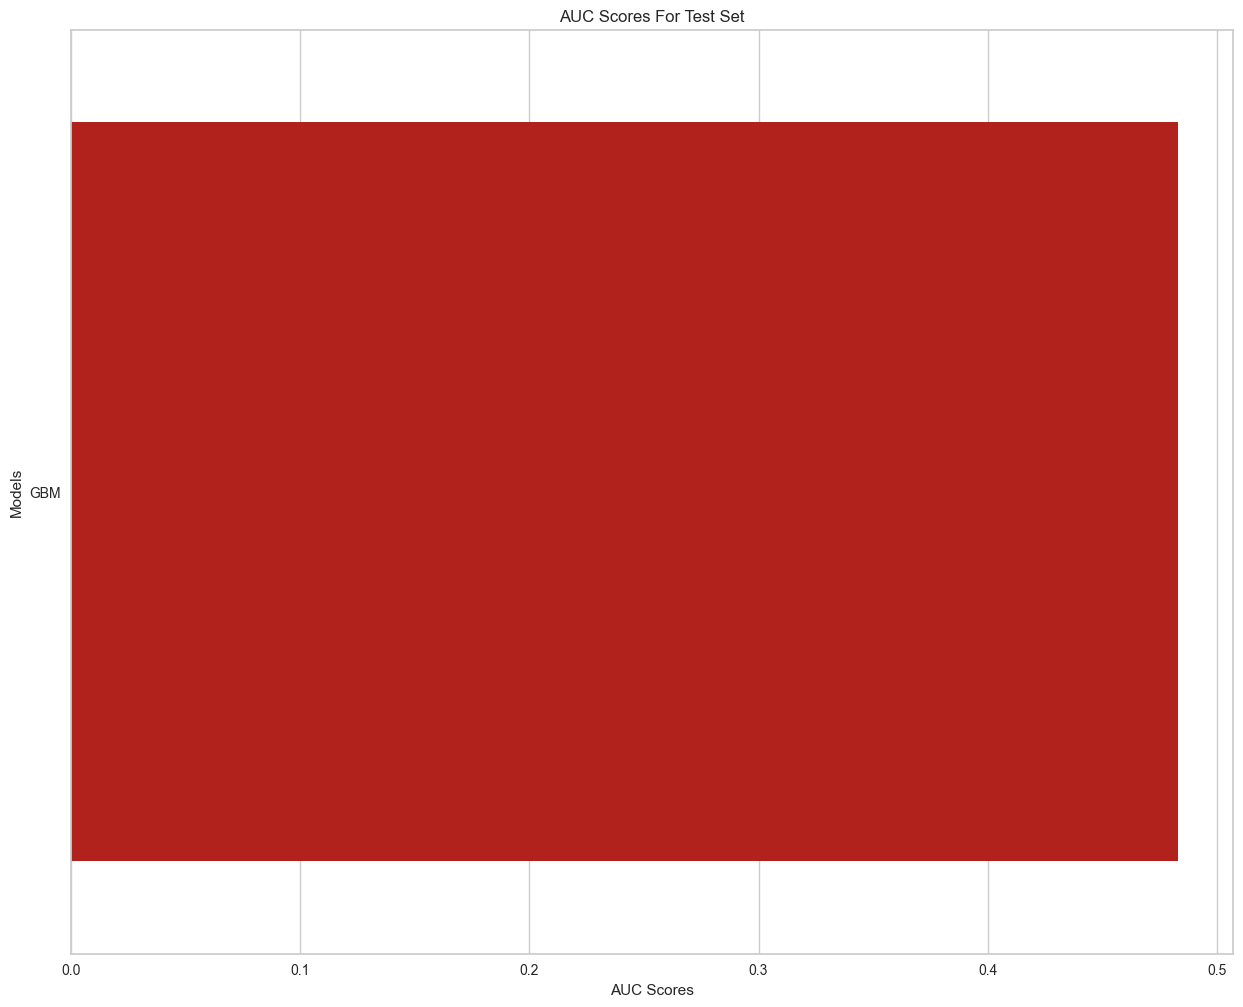

In [37]:
# LogisticRegression with make_pipeline
GBMreg = make_pipeline(MinMaxScaler(), GradientBoostingClassifier())
evaluate_classification_model_holdout([('GBM', GBMreg)]) # 0.805 instead of  0.805195

In [ ]:
# plot_feature_importances(GBMreg)
plot_results(GBMreg)
# report_results_quickly(GBMreg)
plot_learning_curve(GBMreg)

In [ ]:
# LogisticRegression with make_pipeline
ABreg = make_pipeline(MinMaxScaler(), AdaBoostClassifier())
evaluate_classification_model_holdout([('AB', ABreg)]) # 0.805 instead of  0.805195

In [ ]:
# plot_feature_importances(ABreg)
plot_results(ABreg)
# report_results_quickly(ABreg)
plot_learning_curve(ABreg)

In [ ]:
# LogisticRegression with make_pipeline
ngbreg = make_pipeline(MinMaxScaler(), NGBClassifier(verbose=False))
evaluate_classification_model_holdout([('NGBClassifier', ngbreg)]) # 0.805 instead of  0.805195

In [ ]:
# plot_feature_importances(ngbreg)
# plot_results(ngbreg)
# report_results_quickly(ngbreg)
# plot_learning_curve(ngbreg)

In [ ]:
# KNN with make_pipeline
knn = make_pipeline(RobustScaler(), KNeighborsClassifier())
evaluate_classification_model_holdout([('KNN', knn)]) # 0.857 instead of 0.850649

In [ ]:
# plot_feature_importances(knn)
plot_results(knn)
# report_results_quickly(knn)
plot_learning_curve(knn)

In [ ]:
# SVC with make_pipeline
svc = make_pipeline(RobustScaler(), SVC())
evaluate_classification_model_holdout([('SVM', svc)]) # 0.864 instead of 0.837662

In [ ]:
# plot_feature_importances(svc)
plot_results(svc)
# report_results_quickly(svc)
plot_learning_curve(svc)

In [ ]:
# ANN with make_pipeline
ann = make_pipeline(StandardScaler(), MLPClassifier())
evaluate_classification_model_holdout([('ANN', ann)]) # 0.857 instead of 0.850649

In [34]:
# MODEL TUNING

'''
Models to be tuned:
    - LogisticRegression
    - RandomForestClassifier
    -SVM
    - LightGBMClassifier
    - XGBClassifier
'''

# LogisticRegression # 0.805195

logreg_model = LogisticRegression(random_state=42)
logreg_params = {'penalty': ['l1', 'l2'],
                 'C': [0.001, 0.009, 0.01, 0.09, 1, 5, 10, 25]}
logreg_cv_model = GridSearchCV(logreg_model, logreg_params, cv=10, n_jobs=-1, verbose=2).fit(X_train, y_train)
logreg_cv_model.best_params_ # {'C': 1, 'penalty': 'l2'}

Fitting 10 folds for each of 16 candidates, totalling 160 fits


C:\Users\zuoya\.conda\envs\tf\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
80 fits failed out of a total of 160.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
80 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\zuoya\.conda\envs\tf\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\zuoya\.conda\envs\tf\lib\site-packages\sklearn\linear_model\_logistic.py", line 1461, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\zuoya\.conda\envs\tf\lib\site-packages\sklearn\linear_model\_logistic.py", line 449, in _check_solver
    %

{'C': 1, 'penalty': 'l2'}

In [35]:
# Final Model
logreg_tuned = LogisticRegression(**logreg_cv_model.best_params_).fit(X_train, y_train)
y_pred = logreg_tuned.predict(X_test)
# accuracy_score(y_test, y_pred) # 0.8051948051948052
roc_auc_score(y_test, y_pred)

0.7222222222222223

In [36]:
Data = {'label':y_test, 'y_pred':y_pred}
Save_to_Csv(data = Data, file_name = 'Inter-test-for-auc-dca-LR-SVM', Save_format = 'csv',Save_type = 'col')

In [37]:
import numpy as np
import pandas as pd
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score, recall_score, f1_score
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno

from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from ngboost import NGBClassifier

import os
import pickle

from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve, classification_report, confusion_matrix, plot_confusion_matrix
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, StratifiedKFold

from yellowbrick.classifier import ConfusionMatrix, ClassificationReport, ROCAUC, ClassPredictionError
from yellowbrick.model_selection import LearningCurve, FeatureImportances

import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=UserWarning)
pd.pandas.set_option('display.max_columns', None)
pd.set_option('display.float_format', lambda x: '%.3f' % x)
# # Load the model that we saved before
data1 = pd.read_csv("Inter-test-for-auc-dca-LR-SVM.csv")
external_test_pred=data1.y_pred
external_test_label=data1.label
auc = roc_auc_score(external_test_label, external_test_pred)
precision = precision_score(external_test_label, external_test_pred, pos_label=1, average='binary', sample_weight=None)
accuracy = accuracy_score(external_test_label, external_test_pred)
recall = recall_score(external_test_label, external_test_pred, average="binary", pos_label=1)
# f1_score = f1_score(external_test_label, external_test_pred)
# f1_score = f1_score(external_test_label, external_test_pred, average='weighted')
class_names = ["EGFR E19", "EGFR E21"]
print(classification_report(external_test_label, external_test_pred, target_names=class_names))
print('precision',precision,'accuracy',accuracy,'recall',recall,'auc',auc)

              precision    recall  f1-score   support

    EGFR E19       0.75      0.67      0.71         9
    EGFR E21       0.70      0.78      0.74         9

    accuracy                           0.72        18
   macro avg       0.72      0.72      0.72        18
weighted avg       0.73      0.72      0.72        18

precision 0.7 accuracy 0.7222222222222222 recall 0.7777777777777778 auc 0.7222222222222223


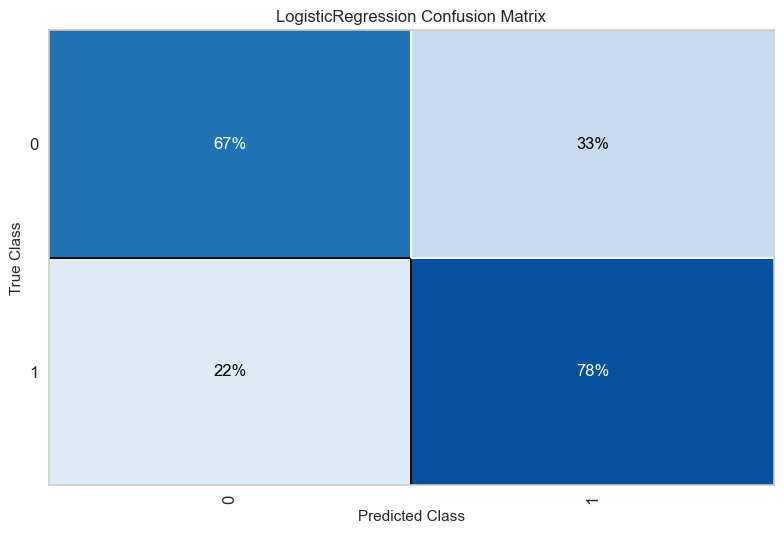

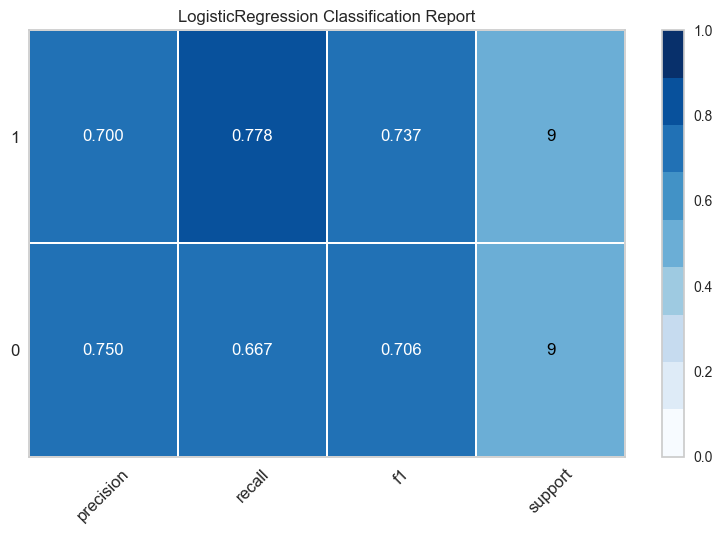

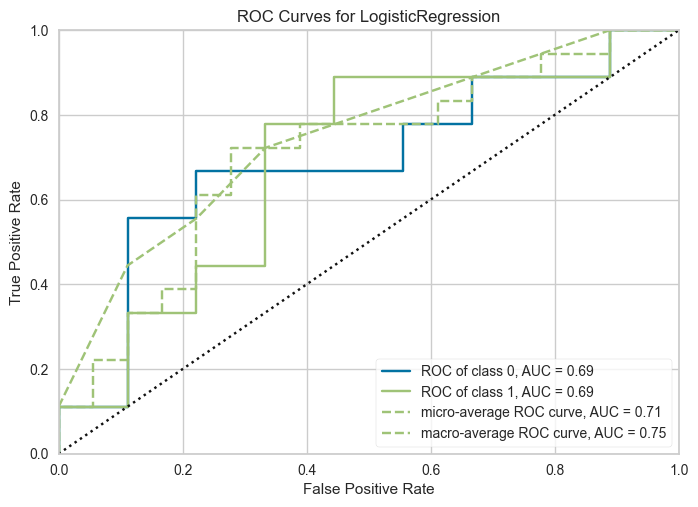

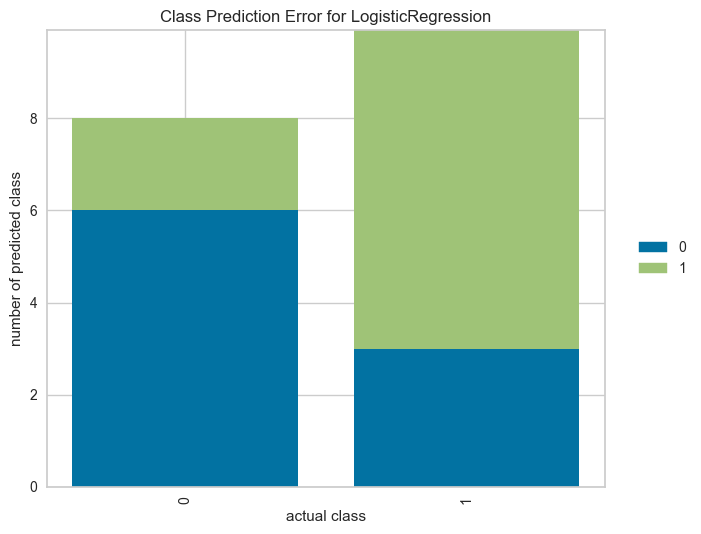

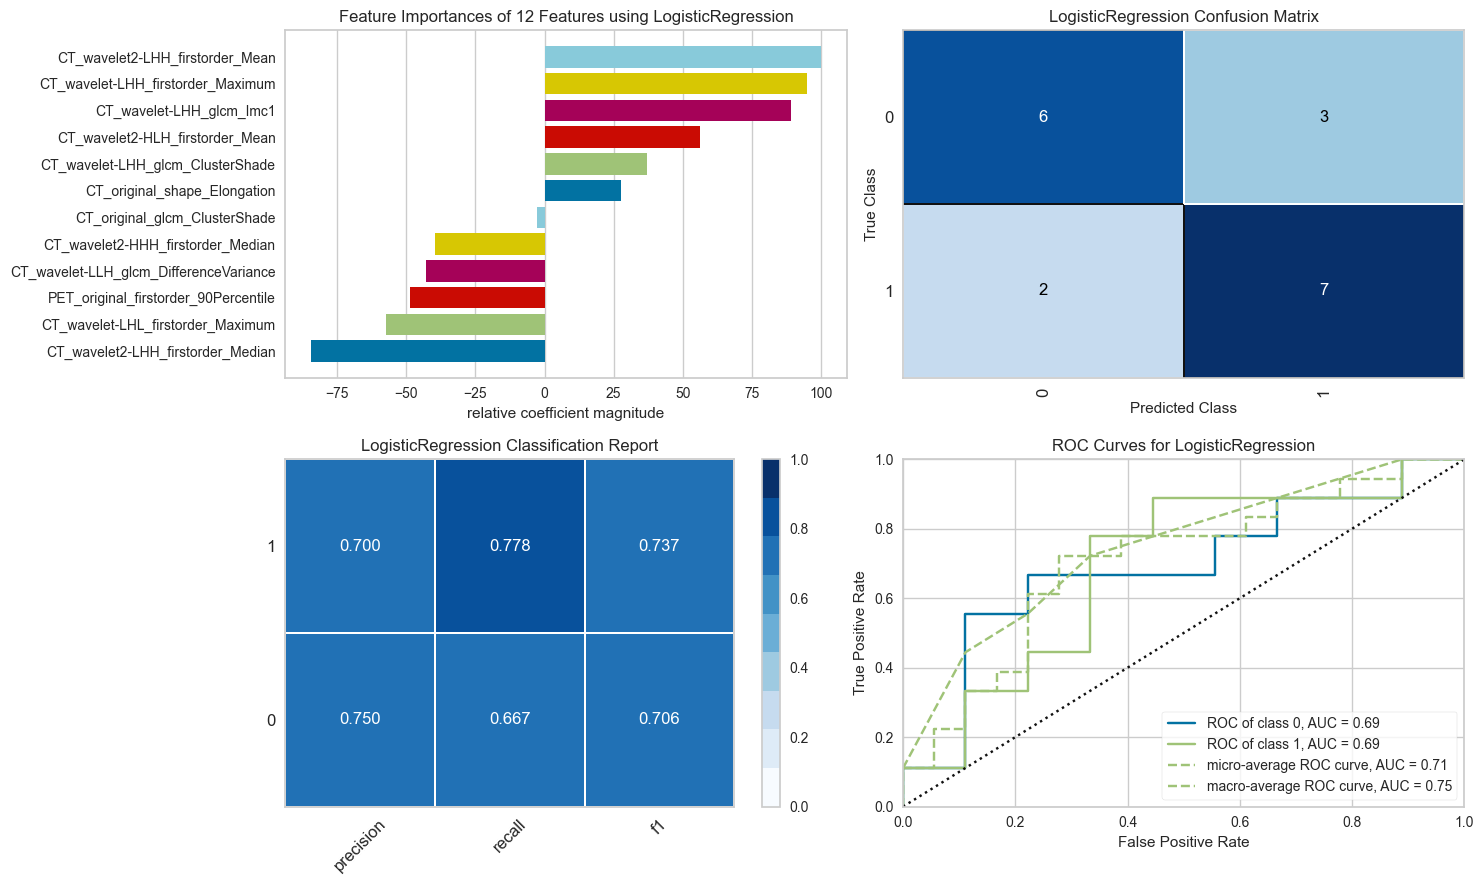

NameError: name 'X' is not defined

In [38]:
# Visualization of Results
# plot_feature_importances(logreg_tuned)
plot_results(logreg_tuned)
report_results_quickly(logreg_tuned)
plot_learning_curve(logreg_tuned)


In [39]:
# RandomForestClassifier # 0.876623

rf_model = RandomForestClassifier(random_state=42)
rf_params = {"n_estimators": [500, 800,1000,2000,3000,5000],
             "min_samples_split": [2, 5,7,8,9, 10,15,20, 30],
             "max_depth": [1,2,3,4, 5, 8, None]}

rf_cv_model = GridSearchCV(rf_model, rf_params, cv=10, n_jobs=-1, verbose=2).fit(X_train, y_train)
rf_cv_model.best_params_ # {'max_depth': None, 'min_samples_split': 7, 'n_estimators': 200}

Fitting 10 folds for each of 378 candidates, totalling 3780 fits


{'max_depth': 8, 'min_samples_split': 20, 'n_estimators': 2000}

In [40]:
rf_cv_model.best_params_   #0.6425000000000001   {'max_depth': 8, 'min_samples_split': 2, 'n_estimators': 10}

{'max_depth': 8, 'min_samples_split': 20, 'n_estimators': 2000}

In [41]:
# Final Model
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve, classification_report, confusion_matrix, plot_confusion_matrix
rf_tuned = RandomForestClassifier(**rf_cv_model.best_params_).fit(X_train, y_train)
y_pred = rf_tuned.predict(X_test)
# accuracy_score(y_test, y_pred) # 0.8831168831168831
roc_auc_score(y_test, y_pred)

0.5

In [42]:
Data = {'label':y_test, 'y_pred':y_pred}
Save_to_Csv(data = Data, file_name = 'Inter-test-for-auc-dca-SVM-RF73', Save_format = 'csv',Save_type = 'col')

In [43]:
import numpy as np
import pandas as pd
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score, recall_score, f1_score
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno

from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from ngboost import NGBClassifier

import os
import pickle

from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve, classification_report, confusion_matrix, plot_confusion_matrix
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, StratifiedKFold

from yellowbrick.classifier import ConfusionMatrix, ClassificationReport, ROCAUC, ClassPredictionError
from yellowbrick.model_selection import LearningCurve, FeatureImportances


import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=UserWarning)
pd.pandas.set_option('display.max_columns', None)
pd.set_option('display.float_format', lambda x: '%.3f' % x)
# # Load the model that we saved before
data1 = pd.read_csv("Inter-test-for-auc-dca-SVM-RF73.csv")
external_test_pred=data1.y_pred
external_test_label=data1.label
auc = roc_auc_score(external_test_label, external_test_pred)
precision = precision_score(external_test_label, external_test_pred, pos_label=1, average='binary', sample_weight=None)
accuracy = accuracy_score(external_test_label, external_test_pred)
recall = recall_score(external_test_label, external_test_pred, average="binary", pos_label=1)
# f1_score = f1_score(external_test_label, external_test_pred)
# f1_score = f1_score(external_test_label, external_test_pred, average='weighted')
class_names = ["EGFR E19", "EGFR E21"]
print(classification_report(external_test_label, external_test_pred, target_names=class_names))
print('precision',precision,'accuracy',accuracy,'recall',recall,'auc',auc)

              precision    recall  f1-score   support

    EGFR E19       0.50      0.56      0.53         9
    EGFR E21       0.50      0.44      0.47         9

    accuracy                           0.50        18
   macro avg       0.50      0.50      0.50        18
weighted avg       0.50      0.50      0.50        18

precision 0.5 accuracy 0.5 recall 0.4444444444444444 auc 0.5


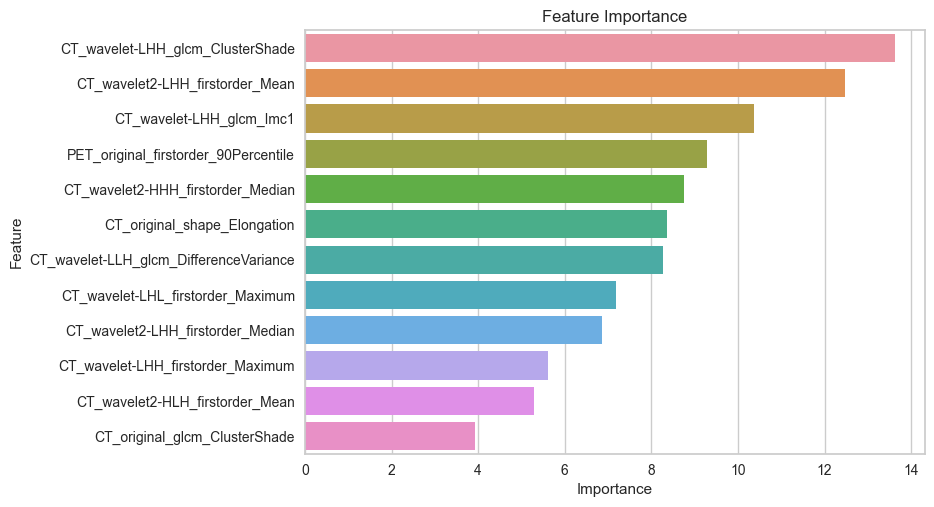

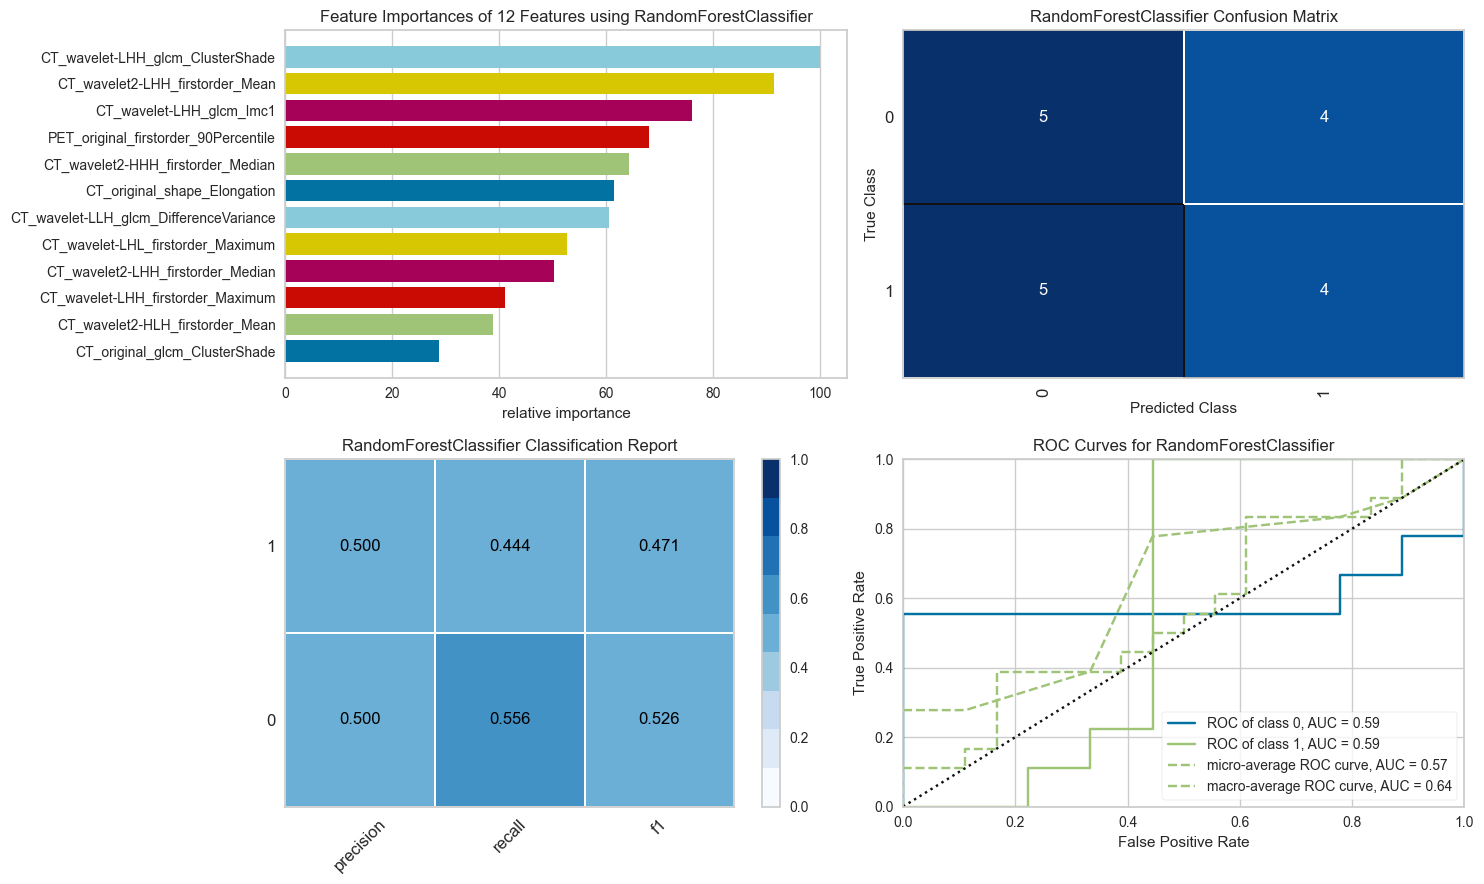

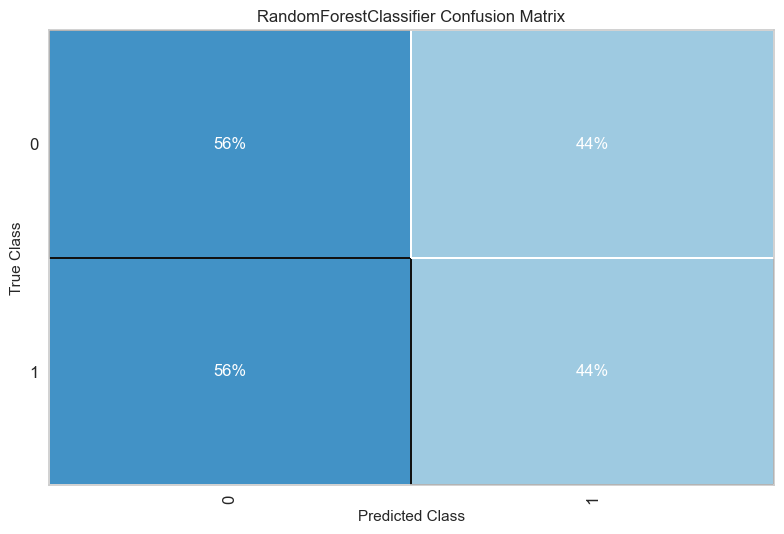

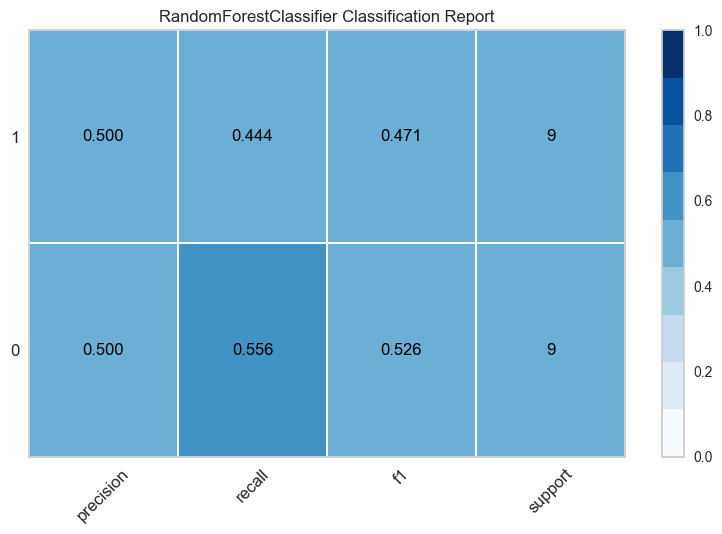

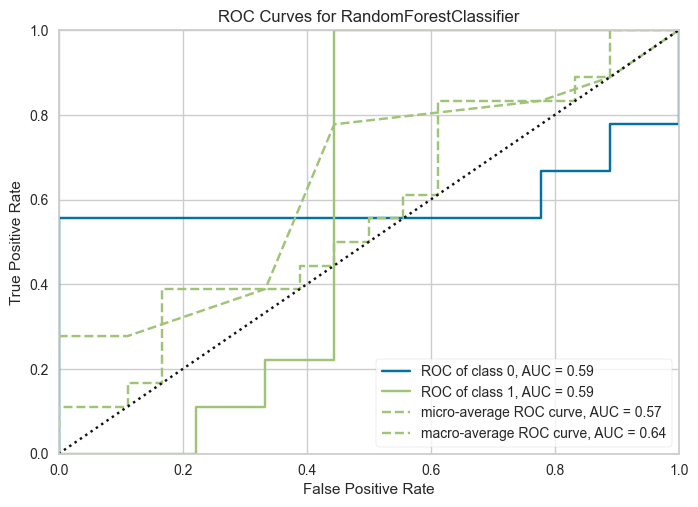

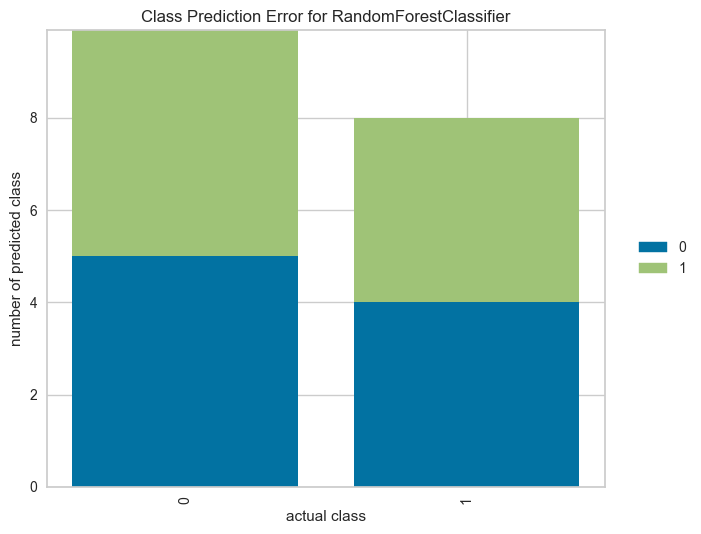

NameError: name 'X' is not defined

In [44]:
# Visualization of Results --> Feature Importances
plot_feature_importances(rf_tuned)
report_results_quickly(rf_tuned)
plot_results(rf_tuned)
plot_learning_curve(rf_tuned)

In [124]:
# CatBoostClassifier # 0.883117

from yellowbrick.contrib.wrapper import wrap
cb_model = CatBoostClassifier()
                                        
cb_params = {
#     'depth': [1,2,3,4, 6, 10],
          'learning_rate' : [0.01,0.03,0.05,0.15,0.1,0.3],
#          'l2_leaf_reg': [1,4,9],
         'iterations': [200,300,500,800,1200,2000,3000],
          'early_stopping_rounds':[2000,3000],
#              'subsample':[0.5,1.0],
             'max_depth':[1,3,5,6,8,10, None]
#              'n_estimators':[1000,3000,5000] 
#           'task_type':['GPU'],
#           'loss_function':['Binary'],
          
         }
# {'learning_rate': 0.01, 'max_depth': 1, 'n_estimators': 5000, 'subsample': 0.5}

cb_cv_model = GridSearchCV(cb_model, cb_params, cv=10, n_jobs=-1, verbose=2).fit(X_train, y_train)
cb_cv_model.best_params_ # {'learning_rate': 0.01, 'max_depth': 6, 'n_estimators': 100, 'subsample': 0.9}


Fitting 10 folds for each of 588 candidates, totalling 5880 fits
0:	learn: 0.6722921	total: 2.47ms	remaining: 740ms
1:	learn: 0.6583842	total: 4.31ms	remaining: 643ms
2:	learn: 0.6378372	total: 5.79ms	remaining: 573ms
3:	learn: 0.6176097	total: 7.03ms	remaining: 520ms
4:	learn: 0.6011074	total: 8.39ms	remaining: 495ms
5:	learn: 0.5828241	total: 9.6ms	remaining: 471ms
6:	learn: 0.5667286	total: 10.9ms	remaining: 455ms
7:	learn: 0.5488504	total: 12.1ms	remaining: 443ms
8:	learn: 0.5362193	total: 13.3ms	remaining: 429ms
9:	learn: 0.5197436	total: 14.8ms	remaining: 428ms
10:	learn: 0.5048113	total: 16.4ms	remaining: 430ms
11:	learn: 0.4917666	total: 17.7ms	remaining: 424ms
12:	learn: 0.4791840	total: 19ms	remaining: 420ms
13:	learn: 0.4658560	total: 20.5ms	remaining: 418ms
14:	learn: 0.4547283	total: 21.7ms	remaining: 413ms
15:	learn: 0.4402261	total: 23.1ms	remaining: 409ms
16:	learn: 0.4306048	total: 24.5ms	remaining: 408ms
17:	learn: 0.4244223	total: 25.7ms	remaining: 403ms
18:	learn: 0

282:	learn: 0.0141419	total: 335ms	remaining: 20.1ms
283:	learn: 0.0140818	total: 336ms	remaining: 18.9ms
284:	learn: 0.0140289	total: 337ms	remaining: 17.7ms
285:	learn: 0.0139762	total: 338ms	remaining: 16.5ms
286:	learn: 0.0139180	total: 340ms	remaining: 15.4ms
287:	learn: 0.0138668	total: 341ms	remaining: 14.2ms
288:	learn: 0.0137984	total: 342ms	remaining: 13ms
289:	learn: 0.0137418	total: 343ms	remaining: 11.8ms
290:	learn: 0.0136670	total: 344ms	remaining: 10.6ms
291:	learn: 0.0135934	total: 345ms	remaining: 9.45ms
292:	learn: 0.0135206	total: 346ms	remaining: 8.27ms
293:	learn: 0.0134374	total: 347ms	remaining: 7.08ms
294:	learn: 0.0133666	total: 348ms	remaining: 5.9ms
295:	learn: 0.0133090	total: 349ms	remaining: 4.71ms
296:	learn: 0.0131473	total: 350ms	remaining: 3.54ms
297:	learn: 0.0131016	total: 351ms	remaining: 2.35ms
298:	learn: 0.0130505	total: 352ms	remaining: 1.18ms
299:	learn: 0.0130059	total: 353ms	remaining: 0us


{'early_stopping_rounds': 2000,
 'iterations': 300,
 'learning_rate': 0.05,
 'max_depth': 6}

In [125]:
# Final Model
cb_tuned = CatBoostClassifier(**cb_cv_model.best_params_).fit(X_train, y_train,use_best_model=True)

y_pred = cb_tuned.predict(X_test)
accuracy_score(y_test, y_pred) # 0.8766233766233766

You should provide test set for use best model. use_best_model parameter has been switched to false value.


0:	learn: 0.6722921	total: 864us	remaining: 259ms
1:	learn: 0.6583842	total: 1.89ms	remaining: 281ms
2:	learn: 0.6378372	total: 2.63ms	remaining: 260ms
3:	learn: 0.6176097	total: 3.38ms	remaining: 250ms
4:	learn: 0.6011074	total: 4.03ms	remaining: 238ms
5:	learn: 0.5828241	total: 4.8ms	remaining: 235ms
6:	learn: 0.5667286	total: 5.41ms	remaining: 227ms
7:	learn: 0.5488504	total: 6.03ms	remaining: 220ms
8:	learn: 0.5362193	total: 6.74ms	remaining: 218ms
9:	learn: 0.5197436	total: 7.45ms	remaining: 216ms
10:	learn: 0.5048113	total: 8.1ms	remaining: 213ms
11:	learn: 0.4917666	total: 8.91ms	remaining: 214ms
12:	learn: 0.4791840	total: 9.6ms	remaining: 212ms
13:	learn: 0.4658560	total: 10.2ms	remaining: 209ms
14:	learn: 0.4547283	total: 10.8ms	remaining: 206ms
15:	learn: 0.4402261	total: 11.5ms	remaining: 204ms
16:	learn: 0.4306048	total: 12.1ms	remaining: 202ms
17:	learn: 0.4244223	total: 12.8ms	remaining: 200ms
18:	learn: 0.4120573	total: 13.4ms	remaining: 198ms
19:	learn: 0.4065636	total

246:	learn: 0.0174208	total: 160ms	remaining: 34.4ms
247:	learn: 0.0173272	total: 161ms	remaining: 33.8ms
248:	learn: 0.0172344	total: 162ms	remaining: 33.2ms
249:	learn: 0.0171204	total: 162ms	remaining: 32.5ms
250:	learn: 0.0170287	total: 163ms	remaining: 31.8ms
251:	learn: 0.0169390	total: 164ms	remaining: 31.2ms
252:	learn: 0.0168644	total: 164ms	remaining: 30.5ms
253:	learn: 0.0167546	total: 165ms	remaining: 29.9ms
254:	learn: 0.0166469	total: 166ms	remaining: 29.2ms
255:	learn: 0.0165751	total: 166ms	remaining: 28.6ms
256:	learn: 0.0164713	total: 167ms	remaining: 27.9ms
257:	learn: 0.0163180	total: 167ms	remaining: 27.3ms
258:	learn: 0.0162085	total: 168ms	remaining: 26.6ms
259:	learn: 0.0161040	total: 169ms	remaining: 26ms
260:	learn: 0.0160044	total: 169ms	remaining: 25.3ms
261:	learn: 0.0159084	total: 170ms	remaining: 24.7ms
262:	learn: 0.0158089	total: 171ms	remaining: 24ms
263:	learn: 0.0157144	total: 171ms	remaining: 23.4ms
264:	learn: 0.0156360	total: 172ms	remaining: 22.7

0.6111111111111112

In [126]:
import shap
shap.initjs()
explainer = shap.TreeExplainer(cb_tuned)
shap_values = explainer.shap_values(X_train)

# visualize the first prediction's explanation
shap.force_plot(explainer.expected_value, shap_values[0,:], X_train.iloc[0,:])

In [127]:
# shap.dependence_plot(y_train, shap_values, X_train)

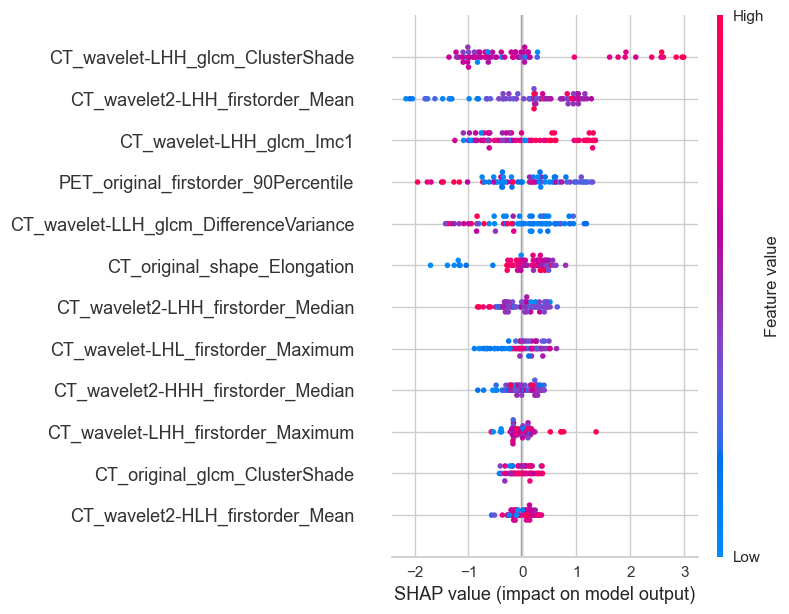

In [128]:

shap.summary_plot(shap_values, X_train)

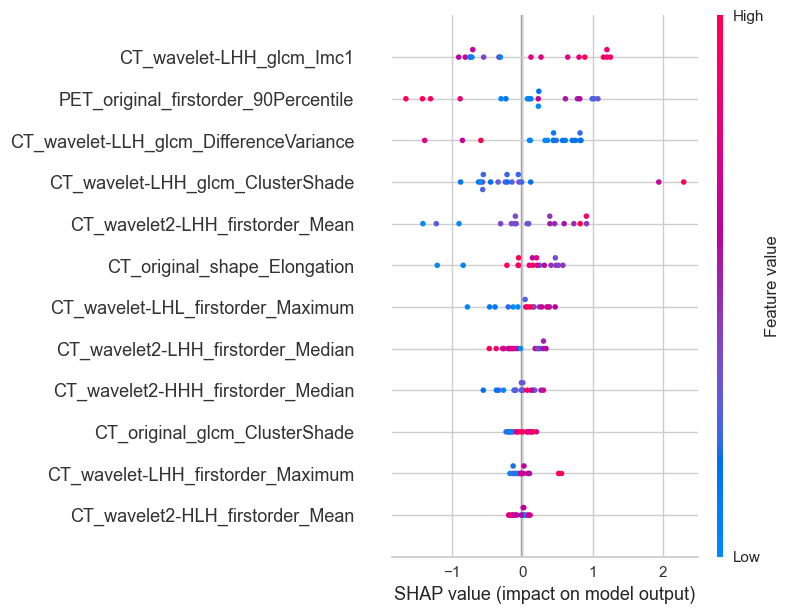

In [129]:
shap_values = explainer.shap_values(X_test)
shap.summary_plot(shap_values, X_test)

In [130]:
import shap
explainer = shap.TreeExplainer(cb_tuned)
shap_values = explainer.shap_values(X_test)

# visualize the first prediction's explanation
shap.force_plot(explainer.expected_value, shap_values[0,:], X_test.iloc[0,:])

In [131]:
Data = {'label':y_test, 'y_pred':y_pred}
Save_to_Csv(data = Data, file_name = 'Inter-test-for-auc-dca--SVM-CBC73', Save_format = 'csv',Save_type = 'col')

In [132]:
import numpy as np
import pandas as pd
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score, recall_score, f1_score
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno

from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from ngboost import NGBClassifier

import os
import pickle

from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve, classification_report, confusion_matrix, plot_confusion_matrix
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, StratifiedKFold

from yellowbrick.classifier import ConfusionMatrix, ClassificationReport, ROCAUC, ClassPredictionError
from yellowbrick.model_selection import LearningCurve, FeatureImportances


import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=UserWarning)
pd.pandas.set_option('display.max_columns', None)
pd.set_option('display.float_format', lambda x: '%.3f' % x)
# # Load the model that we saved before
data1 = pd.read_csv("Inter-test-for-auc-dca--SVM-CBC73.csv")
external_test_pred=data1.y_pred
external_test_label=data1.label
auc = roc_auc_score(external_test_label, external_test_pred)
precision = precision_score(external_test_label, external_test_pred, pos_label=1, average='binary', sample_weight=None)
accuracy = accuracy_score(external_test_label, external_test_pred)
recall = recall_score(external_test_label, external_test_pred, average="binary", pos_label=1)
# f1_score = f1_score(external_test_label, external_test_pred)
# f1_score = f1_score(external_test_label, external_test_pred, average='weighted')
class_names = ["EGFR E19", "EGFR E21"]
print(classification_report(external_test_label, external_test_pred, target_names=class_names))
print('precision',precision,'accuracy',accuracy,'recall',recall,'auc',auc)

              precision    recall  f1-score   support

    EGFR E19       0.67      0.44      0.53         9
    EGFR E21       0.58      0.78      0.67         9

    accuracy                           0.61        18
   macro avg       0.62      0.61      0.60        18
weighted avg       0.62      0.61      0.60        18

precision 0.5833333333333334 accuracy 0.6111111111111112 recall 0.7777777777777778 auc 0.6111111111111112


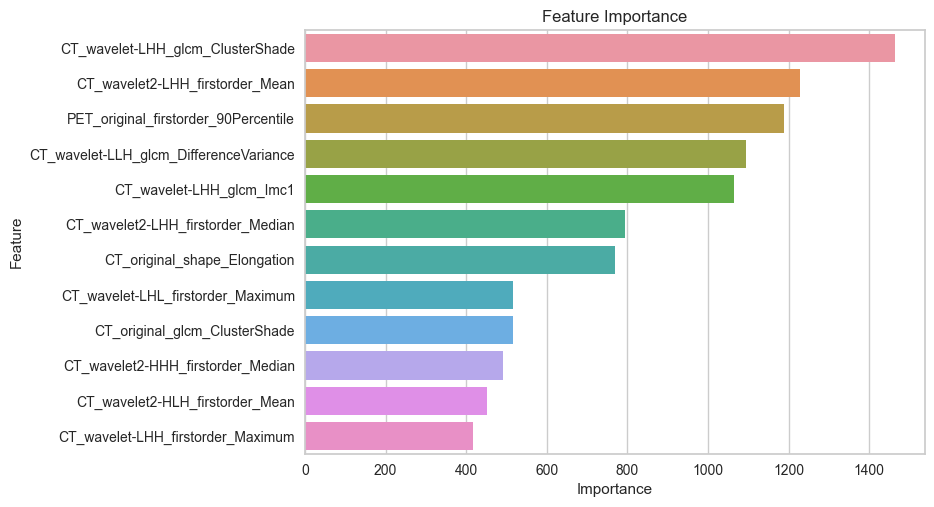

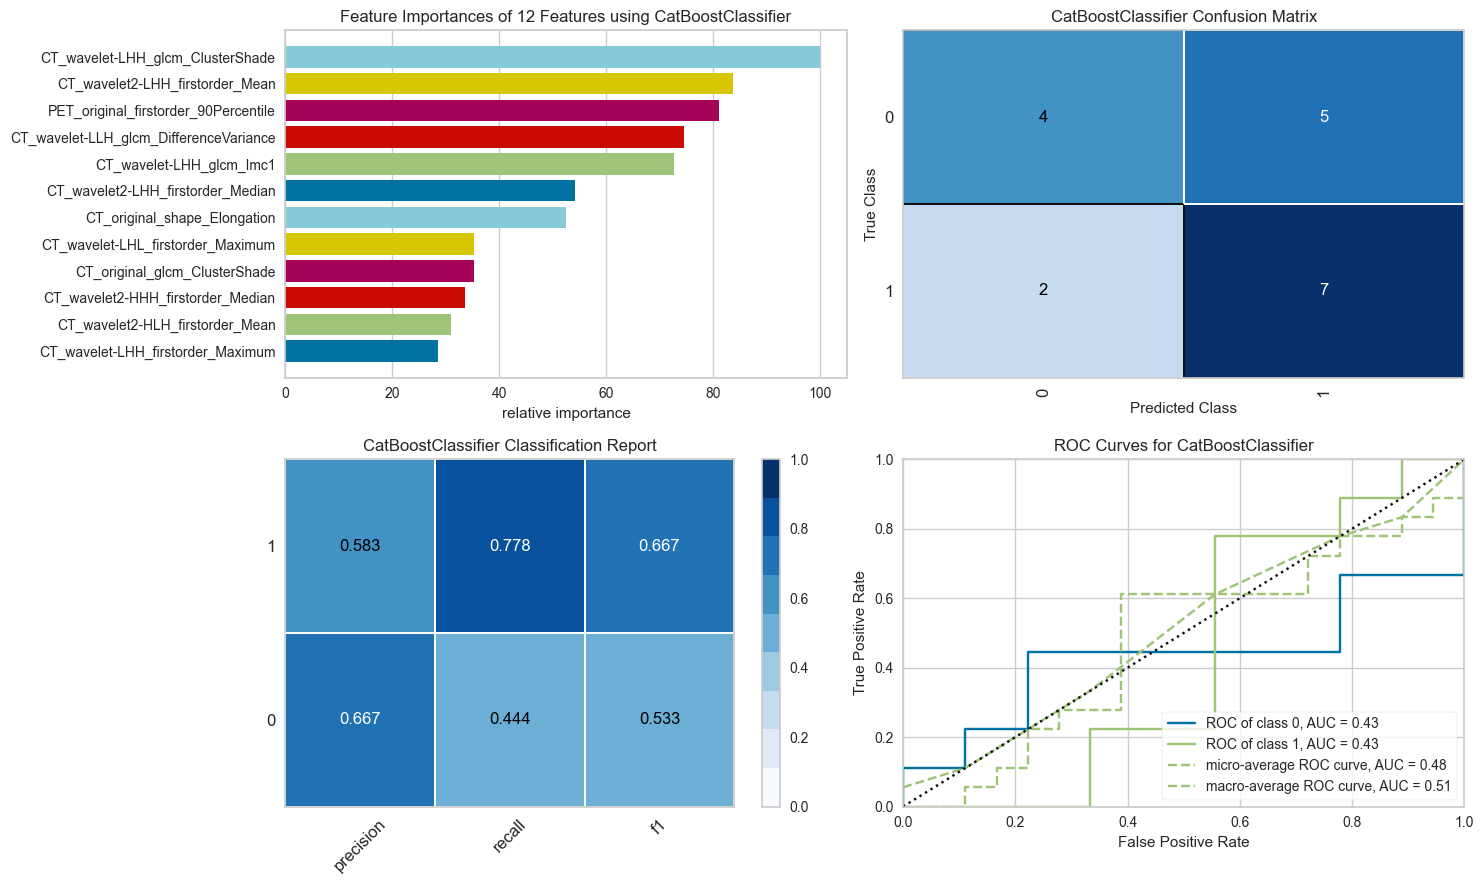

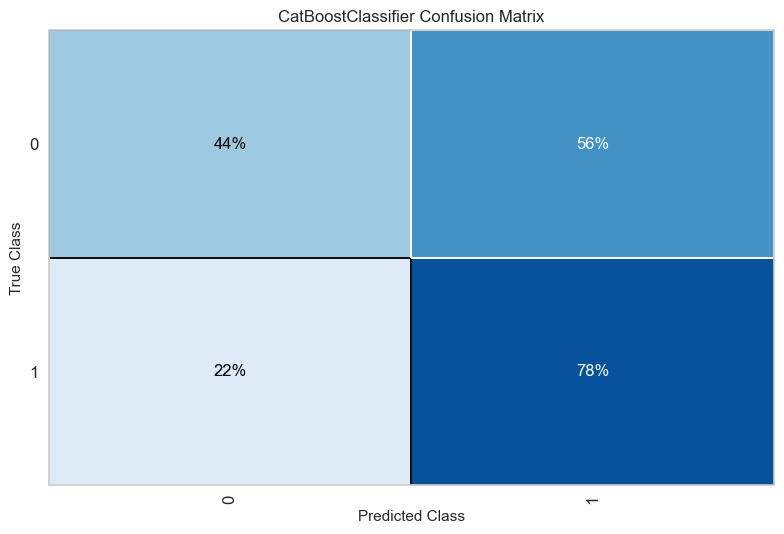

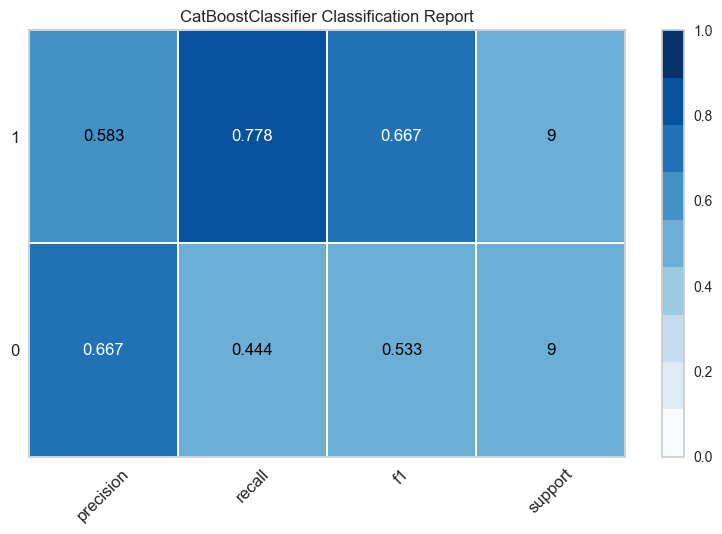

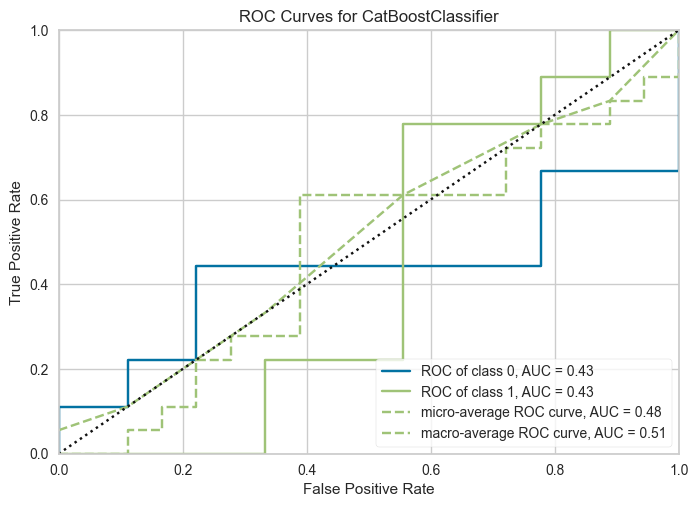

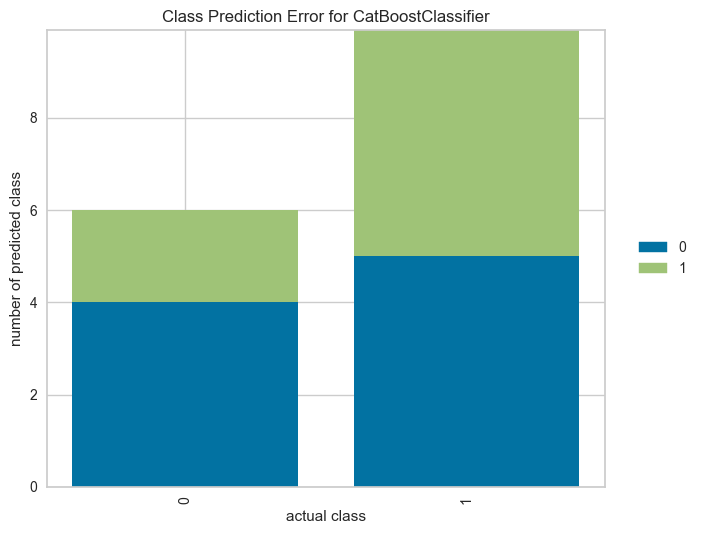

NameError: name 'X' is not defined

In [133]:
# Visualization of Results --> Feature Importances
cb_tuned1 = wrap(cb_tuned)
plot_feature_importances(cb_tuned1)
report_results_quickly(cb_tuned1)
plot_results(cb_tuned1)
plot_learning_curve(cb_tuned1)


In [45]:
# # AdaBoostClassifier # 0.883117

adb_model = AdaBoostClassifier()
adb_params = {"learning_rate": [0.001, 0.01,0.1, 0.2, 0.5],              
#               "subsample": [0.5, 0.9, 1.0],
              "n_estimators": [200,500,800,1000,2000,3000,5000]#,2000,3000,5000,10000
#               "max_features": [3,4,5],
#               "min_samples_split": [2, 5,7,8,9, 10,15,20, 30],
#               "max_depth": [1,2,3, None]
             } #,4, 5, 8

adb_cv_model = GridSearchCV(adb_model, adb_params, cv=10, n_jobs=-1, verbose=2).fit(X_train, y_train)
adb_cv_model.best_params_ # {'learning_rate': 0.01, 'max_depth': 6, 'n_estimators': 100, 'subsample': 0.9}

Fitting 10 folds for each of 35 candidates, totalling 350 fits


{'learning_rate': 0.001, 'n_estimators': 3000}

In [46]:
# Final Model
adb_tuned = AdaBoostClassifier(**adb_cv_model.best_params_).fit(X_train, y_train)
y_pred = adb_tuned.predict(X_test)
accuracy_score(y_test, y_pred) # 0.8766233766233766

0.6111111111111112

In [47]:
Data = {'label':y_test, 'y_pred':y_pred}
Save_to_Csv(data = Data, file_name = 'Inter-test-for-auc-dca--SVM-ADB73', Save_format = 'csv',Save_type = 'col')

In [48]:
import numpy as np
import pandas as pd
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score, recall_score, f1_score
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno

from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from ngboost import NGBClassifier

import os
import pickle

from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve, classification_report, confusion_matrix, plot_confusion_matrix
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, StratifiedKFold

from yellowbrick.classifier import ConfusionMatrix, ClassificationReport, ROCAUC, ClassPredictionError
from yellowbrick.model_selection import LearningCurve, FeatureImportances


import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=UserWarning)
pd.pandas.set_option('display.max_columns', None)
pd.set_option('display.float_format', lambda x: '%.3f' % x)
# # Load the model that we saved before
data1 = pd.read_csv("Inter-test-for-auc-dca--SVM-ADB73.csv")
external_test_pred=data1.y_pred
external_test_label=data1.label
auc = roc_auc_score(external_test_label, external_test_pred)
precision = precision_score(external_test_label, external_test_pred, pos_label=1, average='binary', sample_weight=None)
accuracy = accuracy_score(external_test_label, external_test_pred)
recall = recall_score(external_test_label, external_test_pred, average="binary", pos_label=1)
# f1_score = f1_score(external_test_label, external_test_pred)
# f1_score = f1_score(external_test_label, external_test_pred, average='weighted')
class_names = ["EGFR E19", "EGFR E21"]
print(classification_report(external_test_label, external_test_pred, target_names=class_names))
print('precision',precision,'accuracy',accuracy,'recall',recall,'auc',auc)

              precision    recall  f1-score   support

    EGFR E19       0.60      0.67      0.63         9
    EGFR E21       0.62      0.56      0.59         9

    accuracy                           0.61        18
   macro avg       0.61      0.61      0.61        18
weighted avg       0.61      0.61      0.61        18

precision 0.625 accuracy 0.6111111111111112 recall 0.5555555555555556 auc 0.6111111111111112


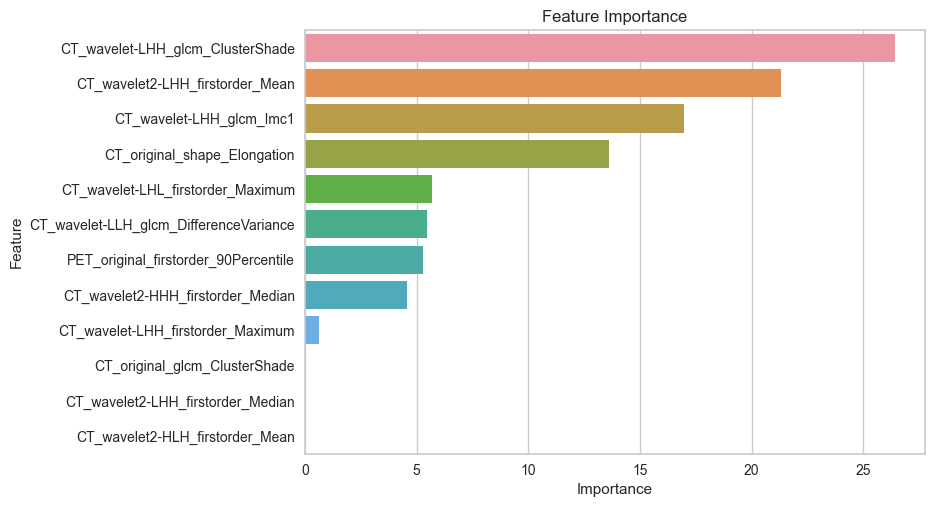

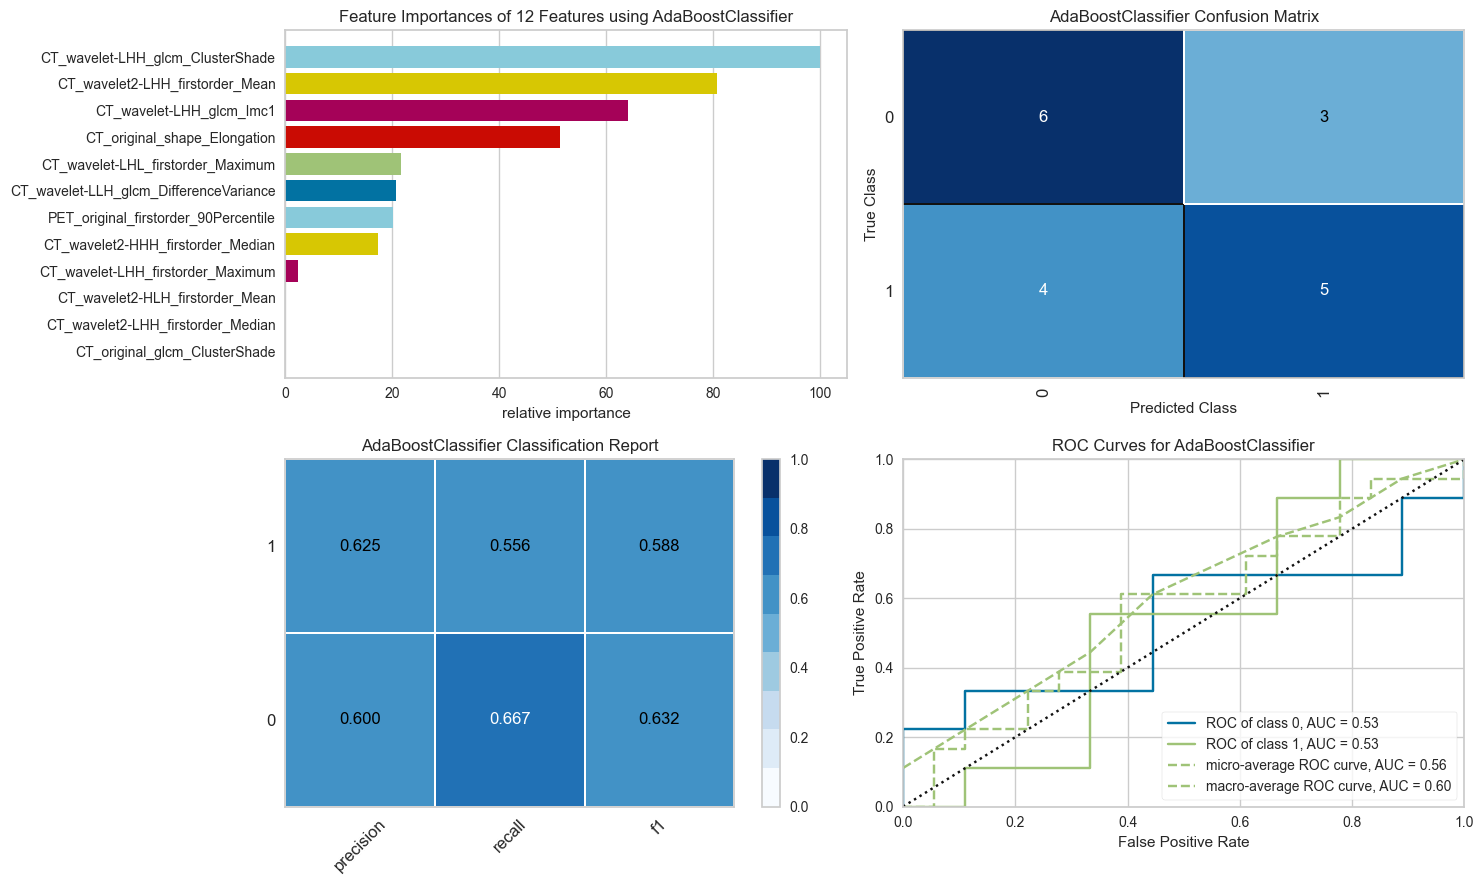

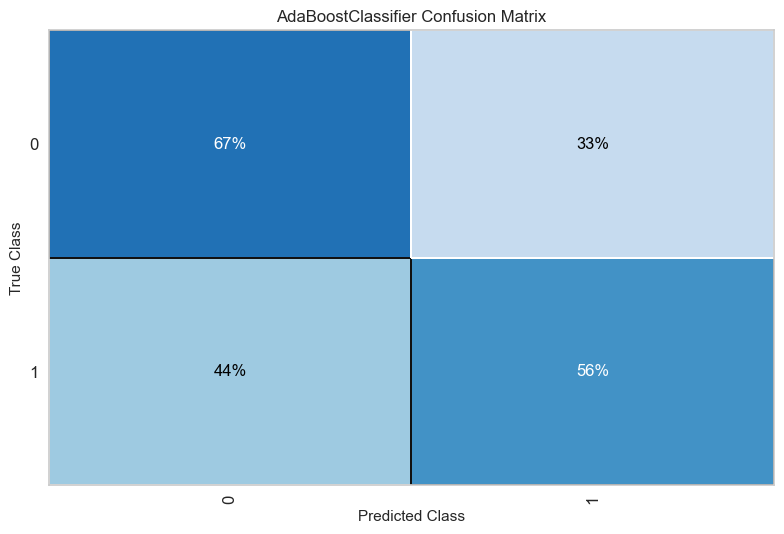

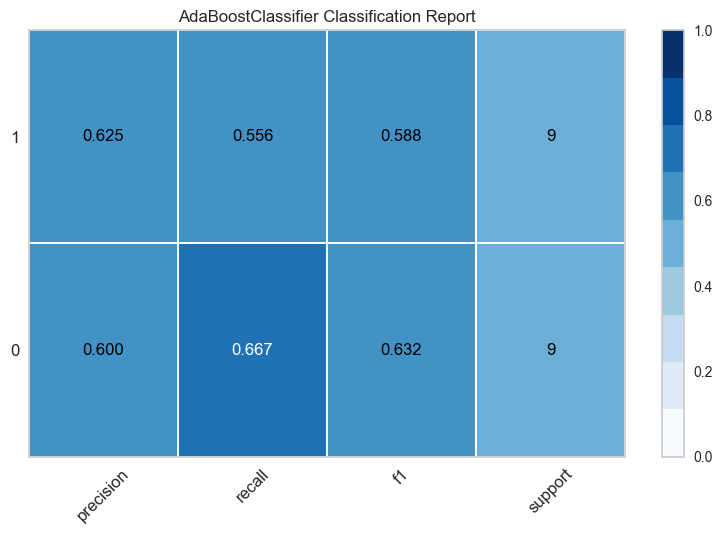

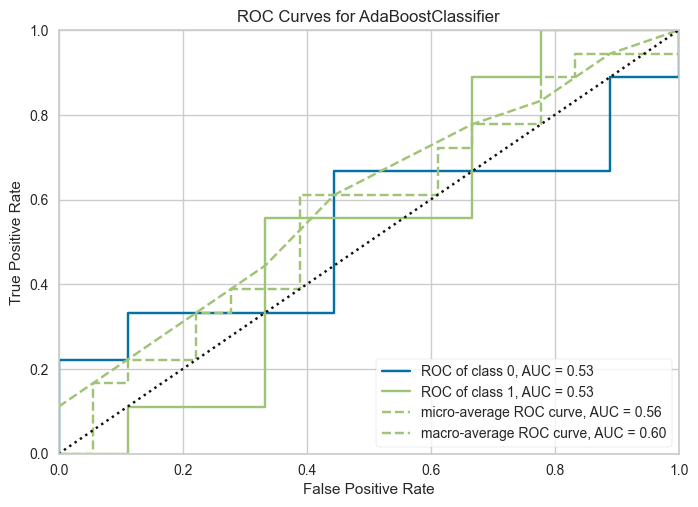

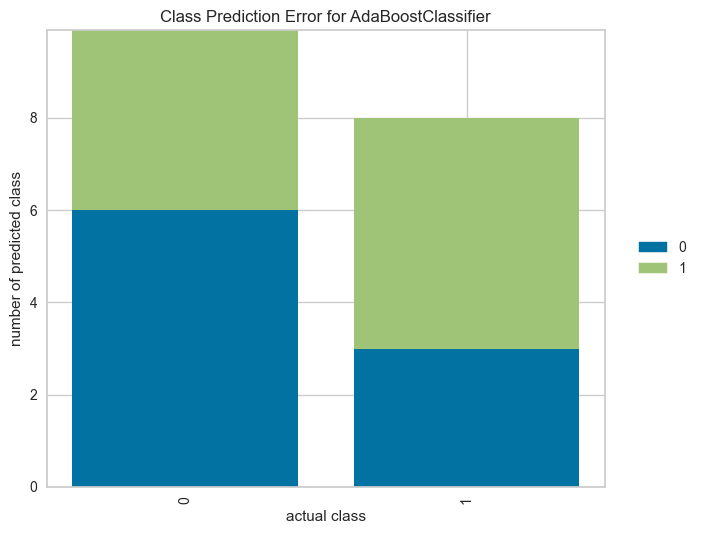

NameError: name 'X' is not defined

In [49]:
# # Visualization of Results --> Feature Importances
# # adb_tuned = wrap(adb_tuned)
plot_feature_importances(adb_tuned)
report_results_quickly(adb_tuned)
plot_results(adb_tuned)
plot_learning_curve(adb_tuned)

In [50]:
# # GradientBoostingClassifier # 0.883117

gbdt_model = GradientBoostingClassifier()
gbdt_params = {"learning_rate": [0.01, 0.1, 0.2, 0.5],              
              "subsample": [0.5, 0.6, 0.7,0.8],
              "n_estimators": [ 200,500,800,1000,2000,3000,5000]#
#               "max_features": [3,4,5],
#               "min_samples_split": [2, 5,7,8,9, 10,15,20, 30],
#               "max_depth": [1,2,3, None]
             } #,4, 5, 8

gbdt_cv_model = GridSearchCV(gbdt_model, gbdt_params, cv=10, n_jobs=-1, verbose=2).fit(X_train, y_train)
gbdt_cv_model.best_params_ # {'learning_rate': 0.01, 'max_depth': 6, 'n_estimators': 100, 'subsample': 0.9}

Fitting 10 folds for each of 112 candidates, totalling 1120 fits


{'learning_rate': 0.2, 'n_estimators': 200, 'subsample': 0.6}

In [51]:
# Final Model
gbdt_tuned = GradientBoostingClassifier(**gbdt_cv_model.best_params_).fit(X_train, y_train)
y_pred = gbdt_tuned.predict(X_test)
accuracy_score(y_test, y_pred) # 0.8766233766233766

0.6111111111111112

In [52]:
Data = {'label':y_test, 'y_pred':y_pred}
Save_to_Csv(data = Data, file_name = 'Inter-test-for-auc-dca--SVM-gbdt', Save_format = 'csv',Save_type = 'col')

In [53]:
import numpy as np
import pandas as pd
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score, recall_score, f1_score
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno

from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from ngboost import NGBClassifier

import os
import pickle

from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve, classification_report, confusion_matrix, plot_confusion_matrix
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, StratifiedKFold

from yellowbrick.classifier import ConfusionMatrix, ClassificationReport, ROCAUC, ClassPredictionError
from yellowbrick.model_selection import LearningCurve, FeatureImportances


import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=UserWarning)
pd.pandas.set_option('display.max_columns', None)
pd.set_option('display.float_format', lambda x: '%.3f' % x)
# # Load the model that we saved before
data1 = pd.read_csv("Inter-test-for-auc-dca--SVM-gbdt.csv")
external_test_pred=data1.y_pred
external_test_label=data1.label
auc = roc_auc_score(external_test_label, external_test_pred)
precision = precision_score(external_test_label, external_test_pred, pos_label=1, average='binary', sample_weight=None)
accuracy = accuracy_score(external_test_label, external_test_pred)
recall = recall_score(external_test_label, external_test_pred, average="binary", pos_label=1)
# f1_score = f1_score(external_test_label, external_test_pred)
# f1_score = f1_score(external_test_label, external_test_pred, average='weighted')
class_names = ["EGFR E19", "EGFR E21"]
print(classification_report(external_test_label, external_test_pred, target_names=class_names))
print('precision',precision,'accuracy',accuracy,'recall',recall,'auc',auc)

              precision    recall  f1-score   support

    EGFR E19       0.62      0.56      0.59         9
    EGFR E21       0.60      0.67      0.63         9

    accuracy                           0.61        18
   macro avg       0.61      0.61      0.61        18
weighted avg       0.61      0.61      0.61        18

precision 0.6 accuracy 0.6111111111111112 recall 0.6666666666666666 auc 0.6111111111111112


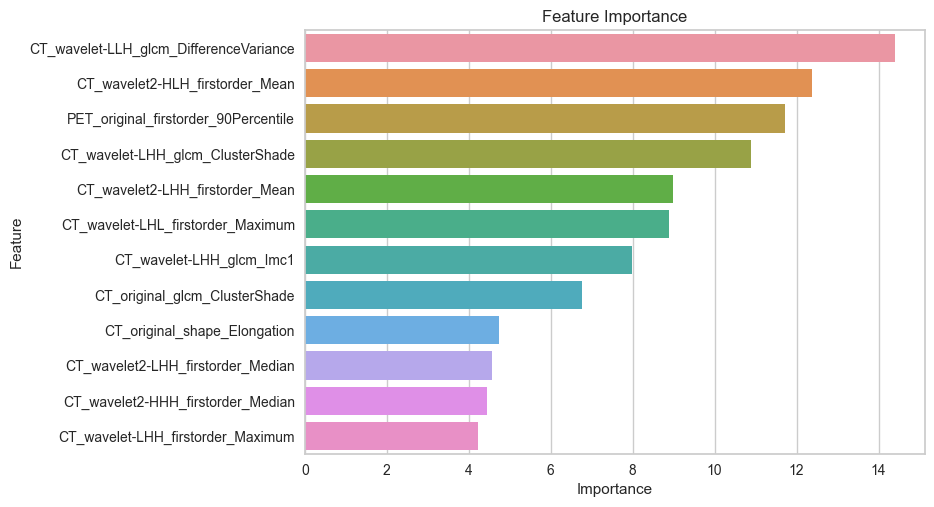

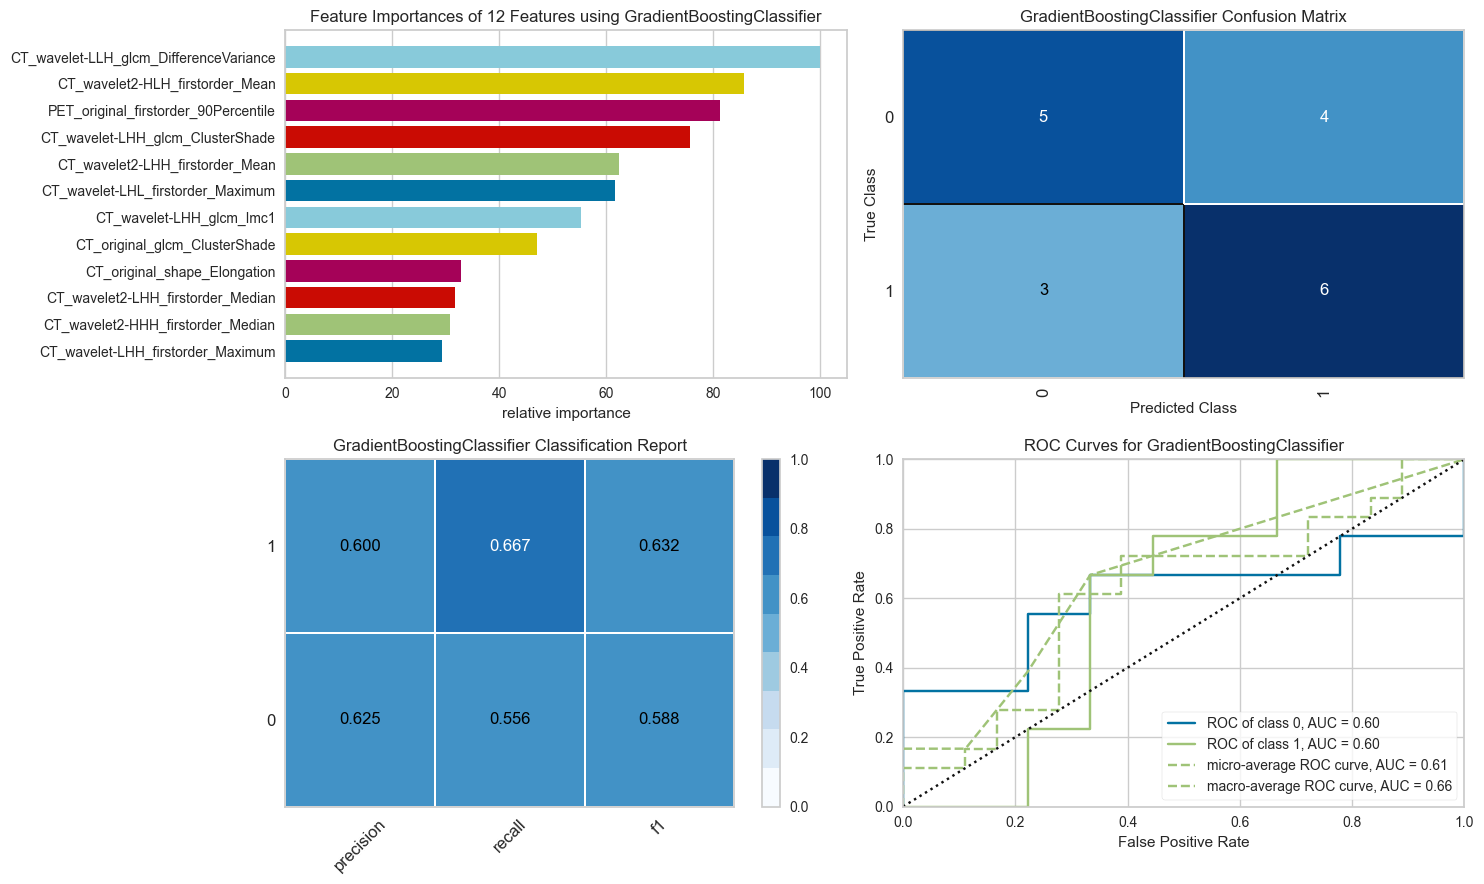

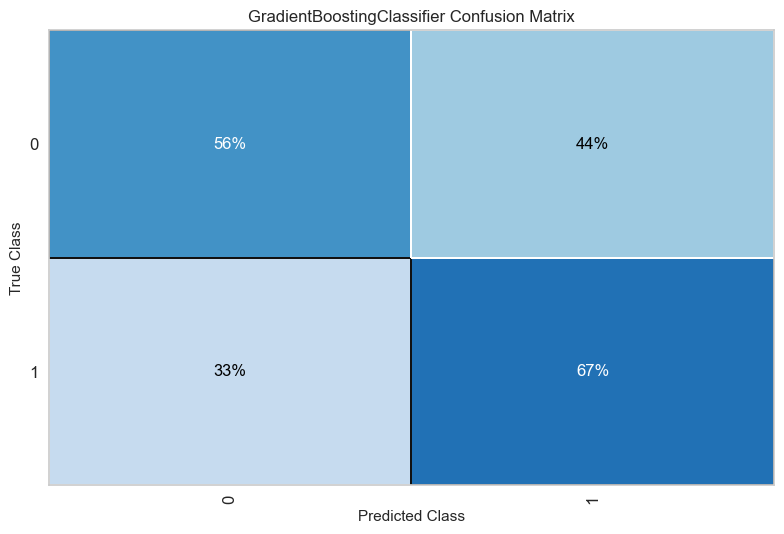

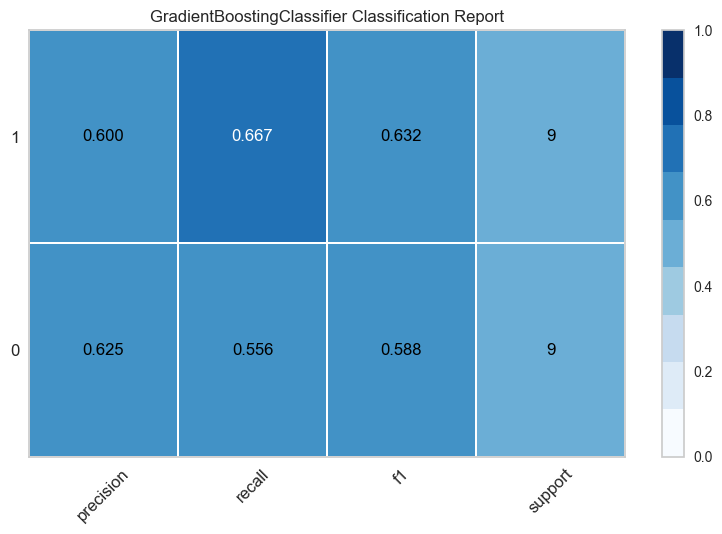

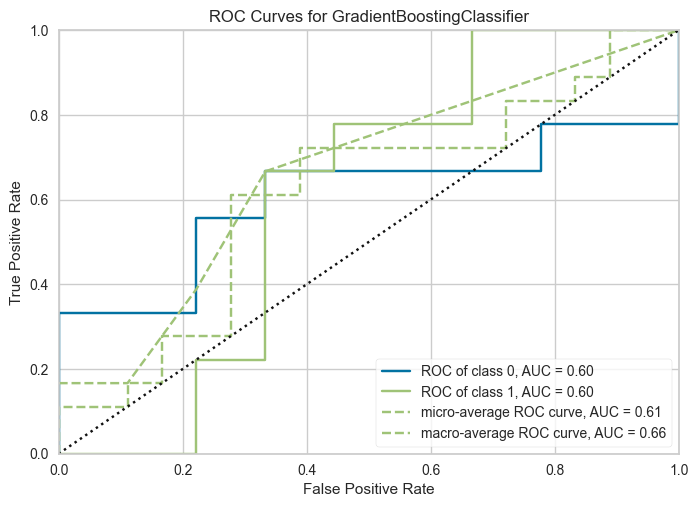

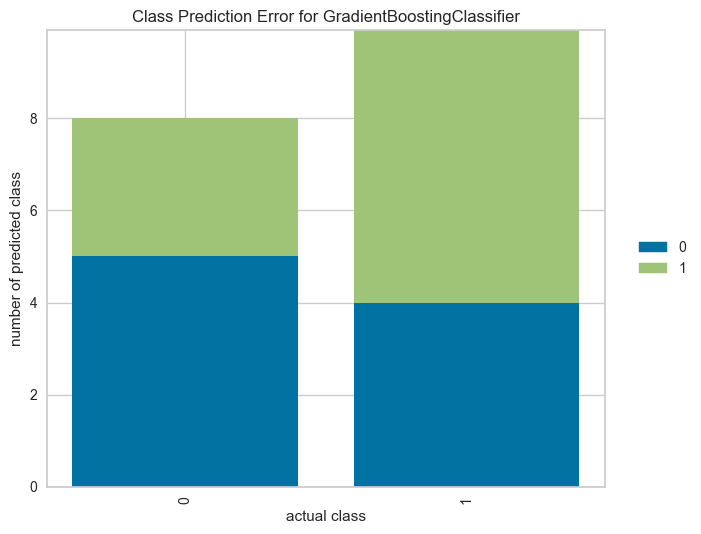

NameError: name 'X' is not defined

In [54]:
# # Visualization of Results --> Feature Importances
# # ngb_tuned = wrap(ngb_tuned)
plot_feature_importances(gbdt_tuned)

report_results_quickly(gbdt_tuned)
plot_results(gbdt_tuned)
plot_learning_curve(gbdt_tuned)

In [55]:
# XGBClassifier # 0.883117

xgb_model = XGBClassifier(random_state=42)
xgb_params = {"learning_rate": [0.01, 0.1, 0.2, 0.5],              
              "subsample": [0.5, 0.9, 1.0],
              "n_estimators": [ 500,1000,2000,3000,5000,10000],
#               "max_features": [3,4,5],
#               "min_samples_split": [2, 5,7,8,9, 10,15,20, 30],
              "max_depth": [1,2,3,4, 5, 8, None]}

xgb_cv_model = GridSearchCV(xgb_model, xgb_params, cv=10, n_jobs=-1, verbose=2).fit(X_train, y_train)
xgb_cv_model.best_params_ # {'learning_rate': 0.01, 'max_depth': 1, 'n_estimators': 2000, 'subsample': 0.5}

Fitting 10 folds for each of 504 candidates, totalling 5040 fits


{'learning_rate': 0.2, 'max_depth': 4, 'n_estimators': 1000, 'subsample': 0.9}

In [56]:
# Final Model
xgb_tuned = XGBClassifier(**xgb_cv_model.best_params_).fit(X_train, y_train)
y_pred = xgb_tuned.predict(X_test)
accuracy_score(y_test, y_pred) # 0.8766233766233766


0.6111111111111112

In [57]:
Data = {'label':y_test, 'y_pred':y_pred}
Save_to_Csv(data = Data, file_name = 'Inter-test-for-auc-dca-SVM-XGB73', Save_format = 'csv',Save_type = 'col')

In [58]:
import numpy as np
import pandas as pd
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score, recall_score, f1_score
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno

from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from ngboost import NGBClassifier

import os
import pickle

from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve, classification_report, confusion_matrix, plot_confusion_matrix
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, StratifiedKFold

from yellowbrick.classifier import ConfusionMatrix, ClassificationReport, ROCAUC, ClassPredictionError
from yellowbrick.model_selection import LearningCurve, FeatureImportances


import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=UserWarning)
pd.pandas.set_option('display.max_columns', None)
pd.set_option('display.float_format', lambda x: '%.3f' % x)
# # Load the model that we saved before
data1 = pd.read_csv("Inter-test-for-auc-dca-SVM-XGB73.csv")
external_test_pred=data1.y_pred
external_test_label=data1.label
auc = roc_auc_score(external_test_label, external_test_pred)
precision = precision_score(external_test_label, external_test_pred, pos_label=1, average='binary', sample_weight=None)
accuracy = accuracy_score(external_test_label, external_test_pred)
recall = recall_score(external_test_label, external_test_pred, average="binary", pos_label=1)
# f1_score = f1_score(external_test_label, external_test_pred)
# f1_score = f1_score(external_test_label, external_test_pred, average='weighted')
class_names = ["EGFR E19", "EGFR E21"]
print(classification_report(external_test_label, external_test_pred, target_names=class_names))
print('precision',precision,'accuracy',accuracy,'recall',recall,'auc',auc)

              precision    recall  f1-score   support

    EGFR E19       0.67      0.44      0.53         9
    EGFR E21       0.58      0.78      0.67         9

    accuracy                           0.61        18
   macro avg       0.62      0.61      0.60        18
weighted avg       0.62      0.61      0.60        18

precision 0.5833333333333334 accuracy 0.6111111111111112 recall 0.7777777777777778 auc 0.6111111111111112


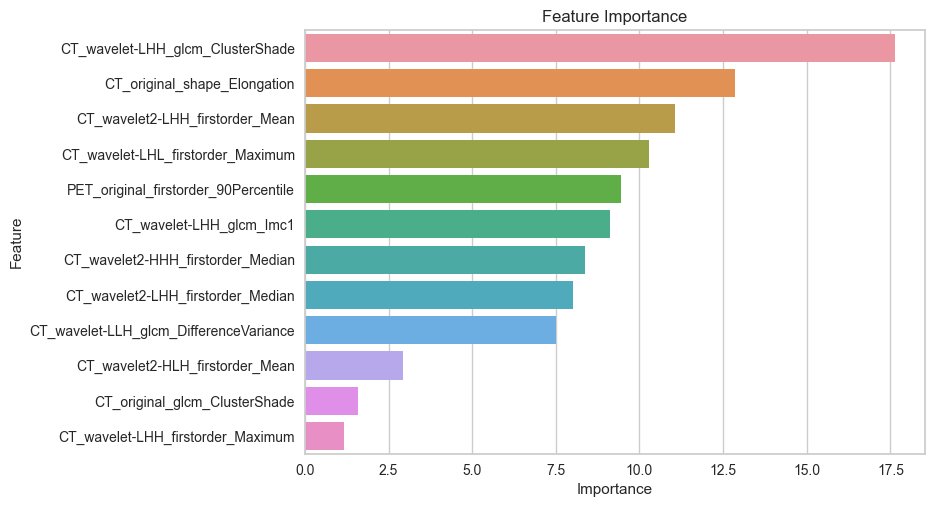

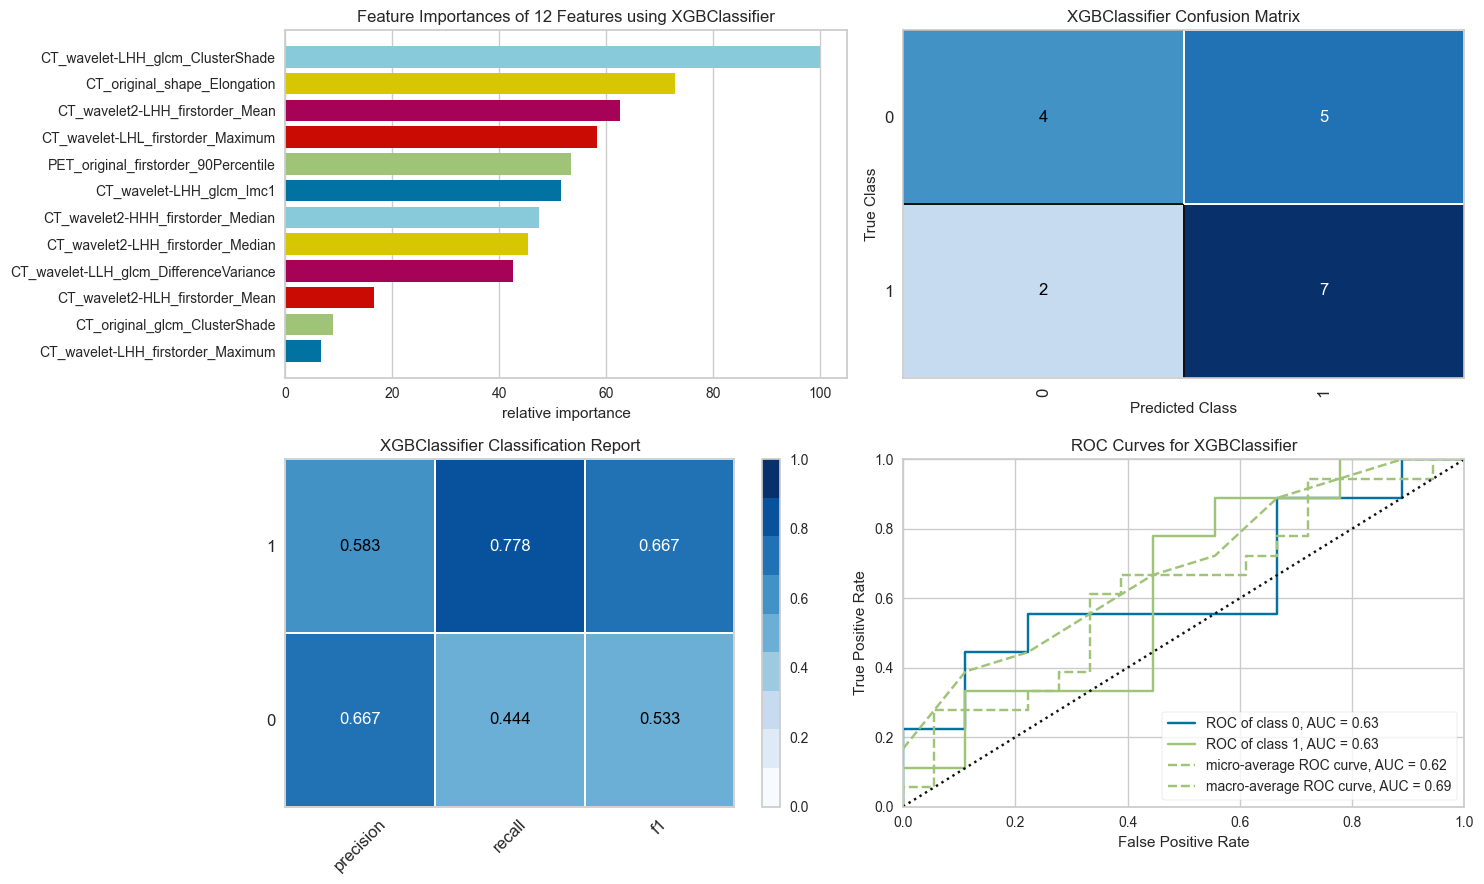

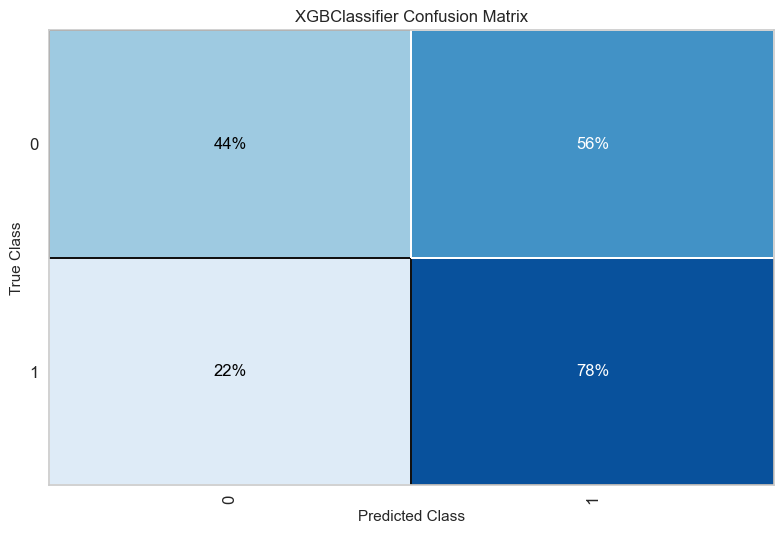

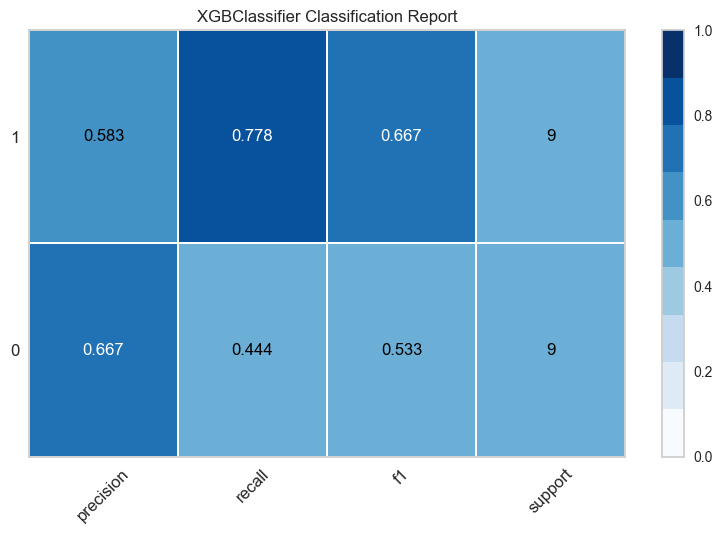

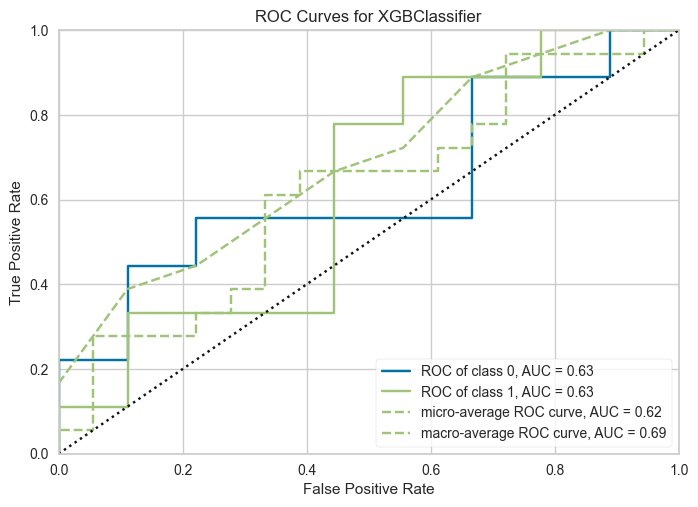

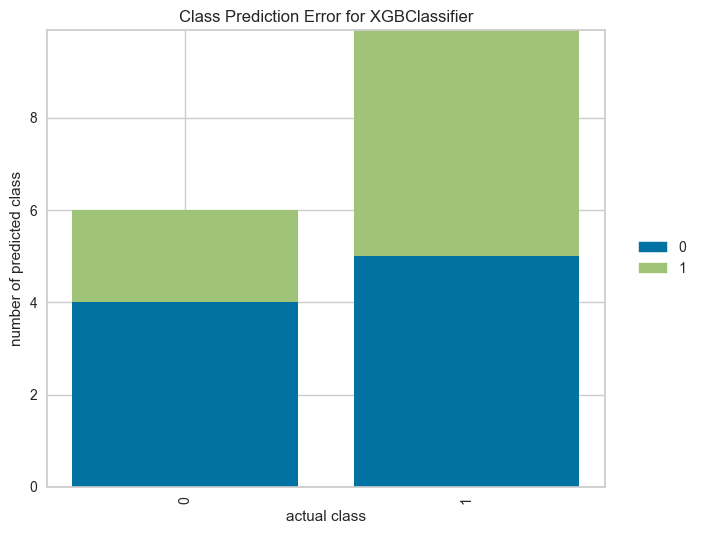

In [59]:
# Visualization of Results --> Feature Importances
plot_feature_importances(xgb_tuned)
report_results_quickly(xgb_tuned)
plot_results(xgb_tuned)
# plot_learning_curve(xgb_tuned)

In [60]:
# LightGBMClassifier # 0.857143

lgbm_model = LGBMClassifier(random_state=42)
lgbm_params = {"learning_rate": [0.01, 0.03, 0.05, 0.1, 0.2,0.5],
               "n_estimators": [200,500, 800,1000, 1500,2000,3000,5000],
               "max_depth": [1,2,3,4, 5,6, 8,None]}

lgbm_cv_model = GridSearchCV(lgbm_model, lgbm_params, cv=10, n_jobs=-1, verbose=2).fit(X_train, y_train)
lgbm_cv_model.best_params_ # {'learning_rate': 0.01, 'max_depth': 8, 'n_estimators': 500}

Fitting 10 folds for each of 384 candidates, totalling 3840 fits


{'learning_rate': 0.03, 'max_depth': 2, 'n_estimators': 200}

In [61]:
# Final Model
lgbm_tuned = LGBMClassifier(**lgbm_cv_model.best_params_).fit(X_train, y_train)
y_pred = lgbm_tuned.predict(X_test)
accuracy_score(y_test, y_pred) # 0.8766233766233766


0.6666666666666666

In [62]:
Data = {'label':y_test, 'y_pred':y_pred}
Save_to_Csv(data = Data, file_name = 'Inter-test-for-auc-dca-SVM-lgb73', Save_format = 'csv',Save_type = 'col')

In [63]:
import numpy as np
import pandas as pd
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score, recall_score, f1_score
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno

from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from ngboost import NGBClassifier

import os
import pickle

from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve, classification_report, confusion_matrix, plot_confusion_matrix
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, StratifiedKFold

from yellowbrick.classifier import ConfusionMatrix, ClassificationReport, ROCAUC, ClassPredictionError
from yellowbrick.model_selection import LearningCurve, FeatureImportances


import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=UserWarning)
pd.pandas.set_option('display.max_columns', None)
pd.set_option('display.float_format', lambda x: '%.3f' % x)
# # Load the model that we saved before
data1 = pd.read_csv("Inter-test-for-auc-dca-SVM-lgb73.csv")
external_test_pred=data1.y_pred
external_test_label=data1.label
auc = roc_auc_score(external_test_label, external_test_pred)
precision = precision_score(external_test_label, external_test_pred, pos_label=1, average='binary', sample_weight=None)
accuracy = accuracy_score(external_test_label, external_test_pred)
recall = recall_score(external_test_label, external_test_pred, average="binary", pos_label=1)
# f1_score = f1_score(external_test_label, external_test_pred)
# f1_score = f1_score(external_test_label, external_test_pred, average='weighted')
class_names = ["EGFR E19", "EGFR E21"]
print(classification_report(external_test_label, external_test_pred, target_names=class_names))
print('precision',precision,'accuracy',accuracy,'recall',recall,'auc',auc)

              precision    recall  f1-score   support

    EGFR E19       0.67      0.67      0.67         9
    EGFR E21       0.67      0.67      0.67         9

    accuracy                           0.67        18
   macro avg       0.67      0.67      0.67        18
weighted avg       0.67      0.67      0.67        18

precision 0.6666666666666666 accuracy 0.6666666666666666 recall 0.6666666666666666 auc 0.6666666666666667


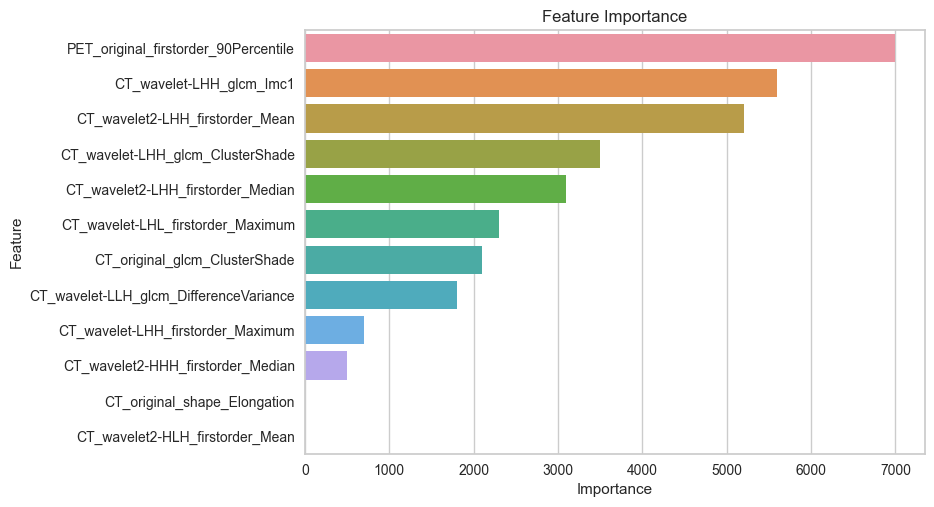

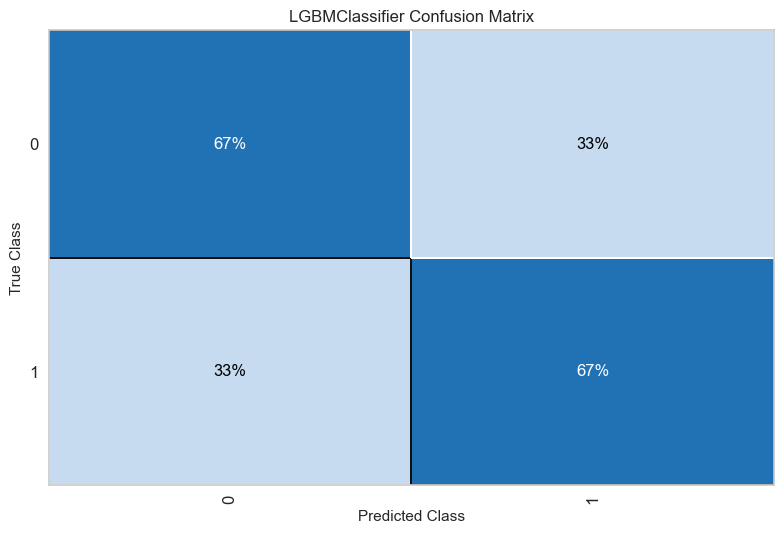

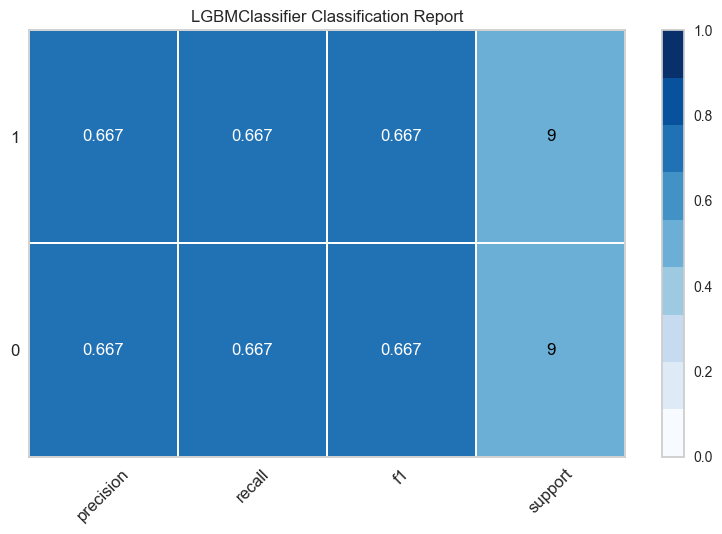

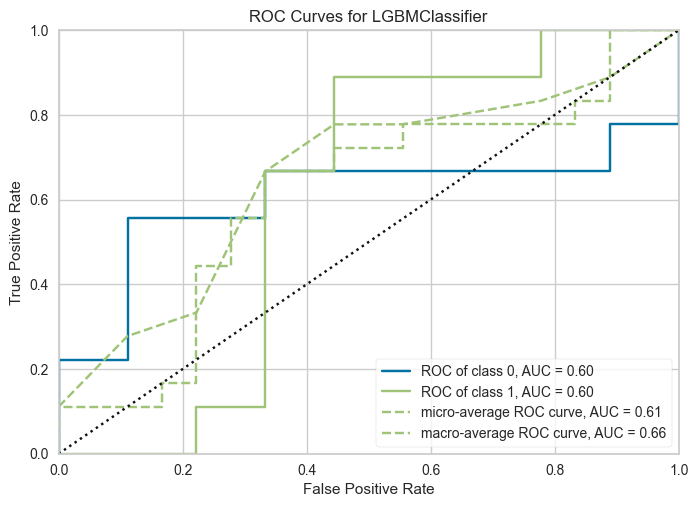

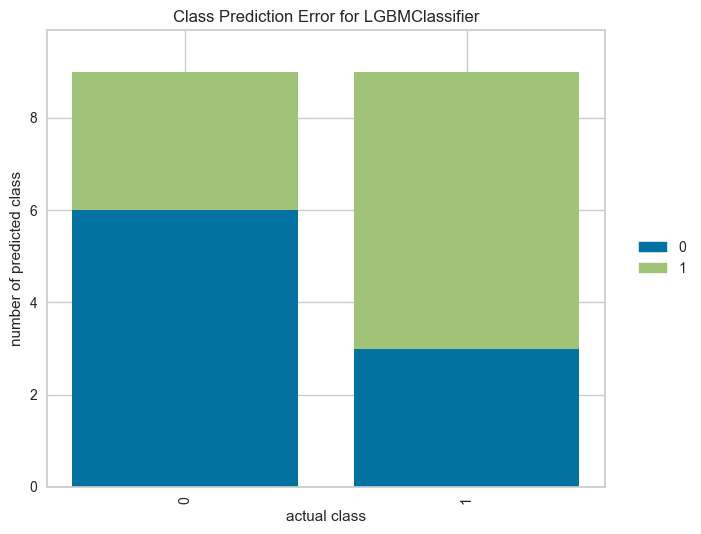

In [64]:
# Visualization of Results --> Feature Importances
plot_feature_importances(lgbm_tuned)
# report_results_quickly(lgbm_tuned)
plot_results(lgbm_tuned)
# plot_learning_curve(lgbm_tuned)

In [65]:
import shap
shap.initjs()
explainer = shap.TreeExplainer(lgbm_tuned)
shap_values = explainer.shap_values(X_train)




In [66]:
# visualize the first prediction's explanation
shap.force_plot(explainer.expected_value, shap_values[0,:], X_train.iloc[0,:])

TypeError: list indices must be integers or slices, not tuple

In [ ]:
shap.dependence_plot(y_train, shap_values, X_train)

In [ ]:
shap.summary_plot(shap_values, X_train)

In [ ]:
shap_values = explainer.shap_values(X_test)
shap.summary_plot(shap_values, X_test)

In [67]:
import shap
explainer = shap.TreeExplainer(lgbm_tuned)
shap_values = explainer.shap_values(X_test)


In [68]:
# visualize the first prediction's explanation
shap.force_plot(explainer.expected_value, shap_values[0,:], X_test.iloc[0,:])

TypeError: list indices must be integers or slices, not tuple

################ Accuracy scores for test set for the models: ################

0:	learn: 0.6722921	total: 1.07ms	remaining: 321ms
1:	learn: 0.6583842	total: 1.86ms	remaining: 277ms
2:	learn: 0.6378372	total: 2.51ms	remaining: 249ms
3:	learn: 0.6176097	total: 3.16ms	remaining: 234ms
4:	learn: 0.6011074	total: 4ms	remaining: 236ms
5:	learn: 0.5828241	total: 4.76ms	remaining: 233ms
6:	learn: 0.5667286	total: 5.42ms	remaining: 227ms
7:	learn: 0.5488504	total: 6.17ms	remaining: 225ms
8:	learn: 0.5362193	total: 6.79ms	remaining: 220ms
9:	learn: 0.5197436	total: 7.42ms	remaining: 215ms
10:	learn: 0.5048113	total: 8.02ms	remaining: 211ms
11:	learn: 0.4917666	total: 8.69ms	remaining: 209ms
12:	learn: 0.4791840	total: 9.4ms	remaining: 208ms
13:	learn: 0.4658560	total: 10.2ms	remaining: 208ms
14:	learn: 0.4547283	total: 10.8ms	remaining: 205ms
15:	learn: 0.4402261	total: 11.4ms	remaining: 203ms
16:	learn: 0.4306048	total: 12.1ms	remaining: 201ms
17:	learn: 0.4244223	total: 12.7ms	remaining: 199m

233:	learn: 0.0189388	total: 147ms	remaining: 41.5ms
234:	learn: 0.0188116	total: 148ms	remaining: 41ms
235:	learn: 0.0187186	total: 149ms	remaining: 40.3ms
236:	learn: 0.0186277	total: 149ms	remaining: 39.7ms
237:	learn: 0.0184356	total: 150ms	remaining: 39.1ms
238:	learn: 0.0183266	total: 151ms	remaining: 38.4ms
239:	learn: 0.0182194	total: 151ms	remaining: 37.8ms
240:	learn: 0.0181137	total: 152ms	remaining: 37.2ms
241:	learn: 0.0179870	total: 152ms	remaining: 36.5ms
242:	learn: 0.0178863	total: 153ms	remaining: 35.9ms
243:	learn: 0.0177727	total: 154ms	remaining: 35.3ms
244:	learn: 0.0176906	total: 154ms	remaining: 34.7ms
245:	learn: 0.0175932	total: 155ms	remaining: 34ms
246:	learn: 0.0174208	total: 156ms	remaining: 33.4ms
247:	learn: 0.0173272	total: 156ms	remaining: 32.8ms
248:	learn: 0.0172344	total: 157ms	remaining: 32.1ms
249:	learn: 0.0171204	total: 157ms	remaining: 31.5ms
250:	learn: 0.0170287	total: 158ms	remaining: 30.8ms
251:	learn: 0.0169390	total: 159ms	remaining: 30.2

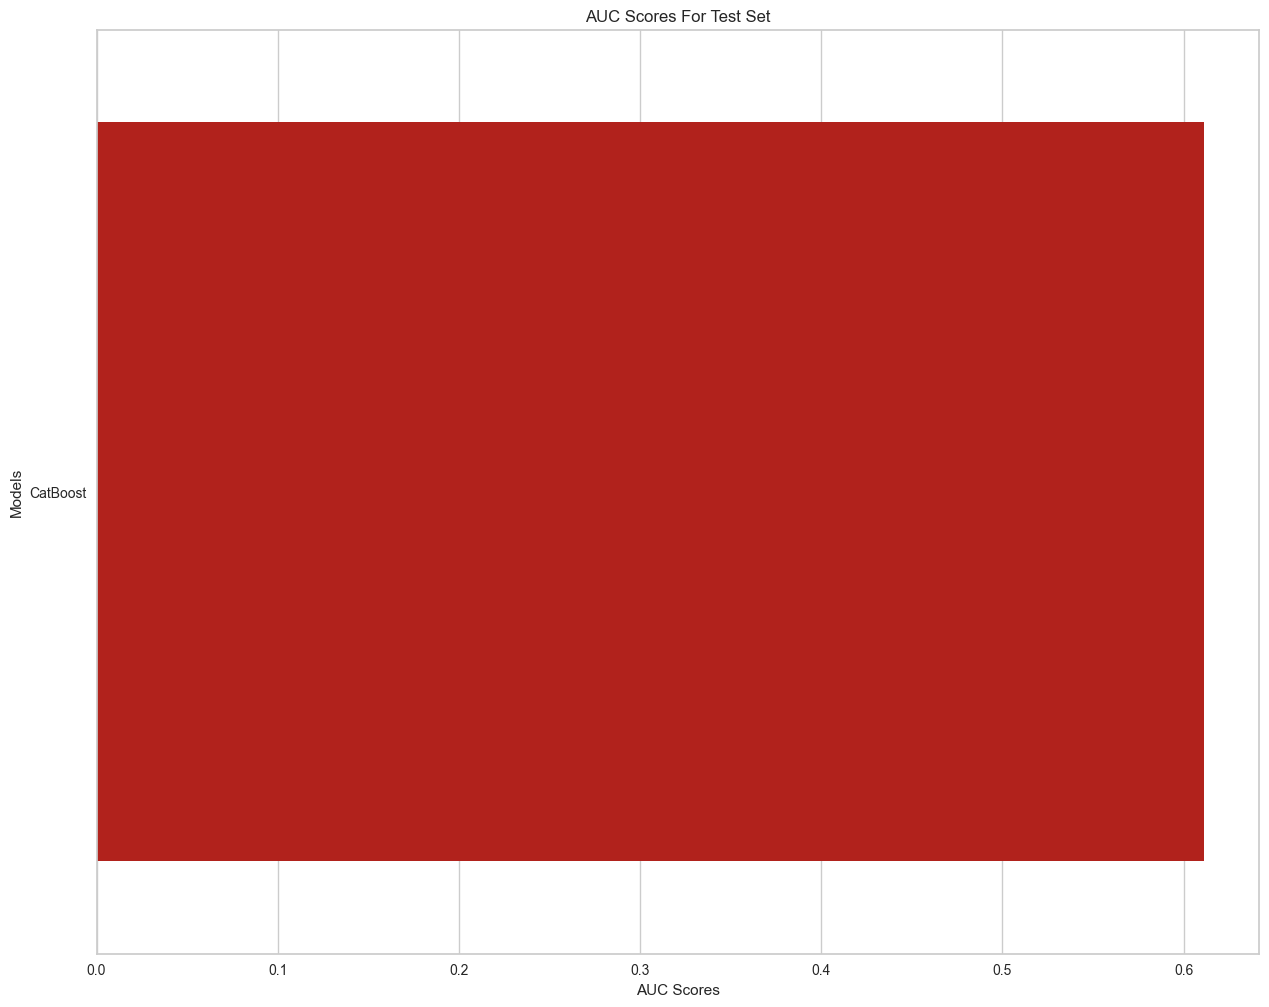

In [134]:
# Comparison of tuned models
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve, classification_report, confusion_matrix, plot_confusion_matrix
tuned_models = [
#     ('LogisticRegression', logreg_tuned),
#                 ('RF', rf_tuned),
#                 ('XGBoost', xgb_tuned),
#                 ('LightGBM', lgbm_tuned),
               ('CatBoost', cb_tuned)
# #                 ('SVM', svm_tuned),
#                 ('GBDT', gbdt_tuned),
# #                 ('NGBoost', ngb_tuned),
# #                 ('DT', dt_tuned),
#                 ('AdaBoost', adb_tuned)
               ]


evaluate_classification_model_holdout(tuned_models)

In [153]:
# Stack models
from mlxtend.classifier import StackingCVClassifier
stack_gen = StackingCVClassifier(classifiers=(logreg_tuned, rf_tuned, xgb_tuned, lgbm_tuned,cb_tuned,svm_tuned,gbdt_tuned,ngb_tuned,dt_tuned,adb_tuned), meta_classifier=xgb_tuned)
stack_gen_model = stack_gen.fit(X_train, y_train)

evaluate_classification_model_holdout([('stack model', stack_gen_model)]) # 0.890


0:	learn: 0.6913043	total: 466us	remaining: 233ms
1:	learn: 0.6894106	total: 1.08ms	remaining: 270ms
2:	learn: 0.6883138	total: 1.54ms	remaining: 255ms
3:	learn: 0.6871873	total: 1.95ms	remaining: 242ms
4:	learn: 0.6845546	total: 2.34ms	remaining: 232ms
5:	learn: 0.6820555	total: 2.76ms	remaining: 227ms
6:	learn: 0.6806537	total: 3.17ms	remaining: 224ms
7:	learn: 0.6792333	total: 3.58ms	remaining: 220ms
8:	learn: 0.6773484	total: 3.99ms	remaining: 218ms
9:	learn: 0.6761950	total: 4.4ms	remaining: 215ms
10:	learn: 0.6736581	total: 4.91ms	remaining: 218ms
11:	learn: 0.6717208	total: 5.35ms	remaining: 218ms
12:	learn: 0.6704542	total: 5.75ms	remaining: 215ms
13:	learn: 0.6693845	total: 6.15ms	remaining: 214ms
14:	learn: 0.6680733	total: 6.58ms	remaining: 213ms
15:	learn: 0.6666074	total: 7.01ms	remaining: 212ms
16:	learn: 0.6639269	total: 7.45ms	remaining: 212ms
17:	learn: 0.6629117	total: 7.88ms	remaining: 211ms
18:	learn: 0.6617477	total: 8.28ms	remaining: 210ms
19:	learn: 0.6602997	tot

370:	learn: 0.4008893	total: 151ms	remaining: 52.5ms
371:	learn: 0.4006165	total: 152ms	remaining: 52.2ms
372:	learn: 0.4004963	total: 152ms	remaining: 51.8ms
373:	learn: 0.4000378	total: 153ms	remaining: 51.4ms
374:	learn: 0.3994239	total: 153ms	remaining: 51ms
375:	learn: 0.3987564	total: 153ms	remaining: 50.6ms
376:	learn: 0.3974919	total: 154ms	remaining: 50.2ms
377:	learn: 0.3971057	total: 154ms	remaining: 49.8ms
378:	learn: 0.3961355	total: 155ms	remaining: 49.4ms
379:	learn: 0.3955762	total: 155ms	remaining: 49ms
380:	learn: 0.3952920	total: 156ms	remaining: 48.6ms
381:	learn: 0.3946990	total: 156ms	remaining: 48.2ms
382:	learn: 0.3941955	total: 156ms	remaining: 47.7ms
383:	learn: 0.3938039	total: 157ms	remaining: 47.3ms
384:	learn: 0.3933823	total: 157ms	remaining: 46.9ms
385:	learn: 0.3927936	total: 158ms	remaining: 46.5ms
386:	learn: 0.3925618	total: 158ms	remaining: 46.1ms
387:	learn: 0.3922111	total: 158ms	remaining: 45.7ms
388:	learn: 0.3917260	total: 159ms	remaining: 45.3

179:	learn: 0.4917567	total: 74.5ms	remaining: 132ms
180:	learn: 0.4914523	total: 75ms	remaining: 132ms
181:	learn: 0.4907059	total: 75.4ms	remaining: 132ms
182:	learn: 0.4900687	total: 75.9ms	remaining: 132ms
183:	learn: 0.4894686	total: 76.4ms	remaining: 131ms
184:	learn: 0.4886206	total: 76.8ms	remaining: 131ms
185:	learn: 0.4882853	total: 77.2ms	remaining: 130ms
186:	learn: 0.4877375	total: 77.6ms	remaining: 130ms
187:	learn: 0.4872053	total: 77.9ms	remaining: 129ms
188:	learn: 0.4861842	total: 78.3ms	remaining: 129ms
189:	learn: 0.4854089	total: 78.8ms	remaining: 129ms
190:	learn: 0.4843534	total: 79.2ms	remaining: 128ms
191:	learn: 0.4837414	total: 79.6ms	remaining: 128ms
192:	learn: 0.4834406	total: 80ms	remaining: 127ms
193:	learn: 0.4831028	total: 80.4ms	remaining: 127ms
194:	learn: 0.4822468	total: 80.8ms	remaining: 126ms
195:	learn: 0.4814440	total: 81.2ms	remaining: 126ms
196:	learn: 0.4812513	total: 81.6ms	remaining: 125ms
197:	learn: 0.4799580	total: 82ms	remaining: 125ms

[iter 0] loss=0.6802 val_loss=0.0000 scale=2.0000 norm=4.0000
[iter 100] loss=0.0605 val_loss=0.0000 scale=0.0001 norm=0.0001
[iter 200] loss=0.0605 val_loss=0.0000 scale=0.0001 norm=0.0001
[iter 300] loss=0.0605 val_loss=0.0000 scale=0.0001 norm=0.0001
[iter 400] loss=0.0605 val_loss=0.0000 scale=0.0001 norm=0.0001
[iter 500] loss=0.0605 val_loss=0.0000 scale=0.0001 norm=0.0001
[iter 600] loss=0.0605 val_loss=0.0000 scale=0.0001 norm=0.0001
[iter 700] loss=0.0605 val_loss=0.0000 scale=0.0001 norm=0.0001
[iter 800] loss=0.0605 val_loss=0.0000 scale=0.0001 norm=0.0001
[iter 900] loss=0.0605 val_loss=0.0000 scale=0.0001 norm=0.0001
[iter 1000] loss=0.0605 val_loss=0.0000 scale=0.0001 norm=0.0001
[iter 1100] loss=0.0605 val_loss=0.0000 scale=0.0001 norm=0.0001
[iter 1200] loss=0.0605 val_loss=0.0000 scale=0.0001 norm=0.0001
[iter 1300] loss=0.0605 val_loss=0.0000 scale=0.0001 norm=0.0001
[iter 1400] loss=0.0605 val_loss=0.0000 scale=0.0001 norm=0.0001
[iter 1500] loss=0.0605 val_loss=0.00

263:	learn: 0.5248911	total: 159ms	remaining: 143ms
264:	learn: 0.5244321	total: 160ms	remaining: 142ms
265:	learn: 0.5239001	total: 161ms	remaining: 141ms
266:	learn: 0.5237296	total: 161ms	remaining: 141ms
267:	learn: 0.5234640	total: 162ms	remaining: 140ms
268:	learn: 0.5231657	total: 163ms	remaining: 140ms
269:	learn: 0.5229685	total: 163ms	remaining: 139ms
270:	learn: 0.5227594	total: 164ms	remaining: 138ms
271:	learn: 0.5225581	total: 164ms	remaining: 138ms
272:	learn: 0.5221725	total: 165ms	remaining: 137ms
273:	learn: 0.5218820	total: 166ms	remaining: 137ms
274:	learn: 0.5216693	total: 166ms	remaining: 136ms
275:	learn: 0.5214038	total: 167ms	remaining: 135ms
276:	learn: 0.5212425	total: 167ms	remaining: 135ms
277:	learn: 0.5205246	total: 168ms	remaining: 134ms
278:	learn: 0.5198990	total: 168ms	remaining: 133ms
279:	learn: 0.5196429	total: 169ms	remaining: 133ms
280:	learn: 0.5192466	total: 170ms	remaining: 132ms
281:	learn: 0.5189891	total: 170ms	remaining: 132ms
282:	learn: 

[iter 0] loss=0.6796 val_loss=0.0000 scale=2.0000 norm=4.0000
[iter 100] loss=0.1079 val_loss=0.0000 scale=0.0002 norm=0.0003
[iter 200] loss=0.1079 val_loss=0.0000 scale=0.0002 norm=0.0003
[iter 300] loss=0.1079 val_loss=0.0000 scale=0.0002 norm=0.0003
[iter 400] loss=0.1077 val_loss=0.0000 scale=0.0002 norm=0.0003
[iter 500] loss=0.1077 val_loss=0.0000 scale=0.0002 norm=0.0003
[iter 600] loss=0.1060 val_loss=0.0000 scale=0.0002 norm=0.0003
[iter 700] loss=0.1060 val_loss=0.0000 scale=0.0002 norm=0.0003
[iter 800] loss=0.1061 val_loss=0.0000 scale=0.0002 norm=0.0003
[iter 900] loss=0.1061 val_loss=0.0000 scale=0.0002 norm=0.0003
[iter 1000] loss=0.1061 val_loss=0.0000 scale=0.0002 norm=0.0003
[iter 1100] loss=0.1061 val_loss=0.0000 scale=0.0002 norm=0.0003
[iter 1200] loss=0.1061 val_loss=0.0000 scale=0.0002 norm=0.0003
[iter 1300] loss=0.1061 val_loss=0.0000 scale=0.0002 norm=0.0003
[iter 1400] loss=0.1061 val_loss=0.0000 scale=0.0002 norm=0.0003
[iter 1500] loss=0.1061 val_loss=0.00

375:	learn: 0.3702344	total: 159ms	remaining: 52.4ms
376:	learn: 0.3697282	total: 159ms	remaining: 52ms
377:	learn: 0.3694314	total: 160ms	remaining: 51.6ms
378:	learn: 0.3692269	total: 160ms	remaining: 51.2ms
379:	learn: 0.3686564	total: 161ms	remaining: 50.7ms
380:	learn: 0.3677640	total: 161ms	remaining: 50.3ms
381:	learn: 0.3672247	total: 162ms	remaining: 49.9ms
382:	learn: 0.3668360	total: 162ms	remaining: 49.5ms
383:	learn: 0.3665687	total: 162ms	remaining: 49.1ms
384:	learn: 0.3662026	total: 163ms	remaining: 48.6ms
385:	learn: 0.3658207	total: 163ms	remaining: 48.2ms
386:	learn: 0.3653268	total: 164ms	remaining: 47.8ms
387:	learn: 0.3648995	total: 164ms	remaining: 47.4ms
388:	learn: 0.3643337	total: 165ms	remaining: 47ms
389:	learn: 0.3641317	total: 165ms	remaining: 46.5ms
390:	learn: 0.3639030	total: 166ms	remaining: 46.1ms
391:	learn: 0.3634410	total: 166ms	remaining: 45.7ms
392:	learn: 0.3625817	total: 166ms	remaining: 45.3ms
393:	learn: 0.3617720	total: 167ms	remaining: 44.9

177:	learn: 0.5284456	total: 76.6ms	remaining: 139ms
178:	learn: 0.5280909	total: 77.2ms	remaining: 138ms
179:	learn: 0.5277909	total: 77.6ms	remaining: 138ms
180:	learn: 0.5271786	total: 78.1ms	remaining: 138ms
181:	learn: 0.5265316	total: 78.5ms	remaining: 137ms
182:	learn: 0.5258927	total: 78.9ms	remaining: 137ms
183:	learn: 0.5250015	total: 79.3ms	remaining: 136ms
184:	learn: 0.5244836	total: 79.8ms	remaining: 136ms
185:	learn: 0.5238971	total: 80.2ms	remaining: 135ms
186:	learn: 0.5236188	total: 80.7ms	remaining: 135ms
187:	learn: 0.5227836	total: 81.2ms	remaining: 135ms
188:	learn: 0.5219123	total: 81.6ms	remaining: 134ms
189:	learn: 0.5213354	total: 82.1ms	remaining: 134ms
190:	learn: 0.5206292	total: 82.5ms	remaining: 134ms
191:	learn: 0.5202908	total: 83ms	remaining: 133ms
192:	learn: 0.5198191	total: 83.4ms	remaining: 133ms
193:	learn: 0.5180973	total: 83.9ms	remaining: 132ms
194:	learn: 0.5175547	total: 84.3ms	remaining: 132ms
195:	learn: 0.5166599	total: 84.8ms	remaining: 1

[iter 0] loss=0.6802 val_loss=0.0000 scale=2.0000 norm=4.0000


LinAlgError: Singular matrix

In [156]:
# Function ot blend models
def blend_models_predict(X_test):
    return ((0.05 * logreg_tuned.predict(X_test)) +
            (0.05 * dt_tuned.predict(X_test)) +
            (0.1 * gbdt_tuned.predict(X_test)) +
            (0.1 * rf_tuned.predict(X_test)) +
            (0.1 * svm_tuned.predict(X_test)) +
            (0.1 * adb_tuned.predict(X_test)) +
            (0.1 * xgb_tuned.predict(X_test)) +
            (0.1 * lgbm_tuned.predict(X_test)) +
            (0.1 * cb_tuned.predict(X_test)) +
             (0.1 * ngb_tuned.predict(X_test)) +
            (0.1 * stack_gen_model.predict(X_test)))

In [157]:
accuracy_score(y_test, blend_models_predict(X_test).round())# 0.8701298701298701
# aucroc_score(y_test, blend_models_predict(X_test).round())# 0.8701298701298701
roc_auc_score(y_test, blend_models_predict(X_test).round())

NotFittedError: This LogisticRegression instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

In [109]:
Data = {'label':y_test, 'y_pred':y_pred}
Save_to_Csv(data = Data, file_name = 'Inter-test-for-auc-dca--SVM-stack73', Save_format = 'csv',Save_type = 'col')

In [135]:
# Pickle Models --> Saving tuned models

# Create a folder named 'Models'
# save working directory
#
# cur_dir = os.getcwd()
# cur_dir
#
# # change working directory:
os.chdir("C:/Users/zuoya/Desktop/375cases_e/fs_pre_1921/2-testin-rj/split/RFE-RF-GB/SVM")
#
# # Save the models
for model in tuned_models:
    pickle.dump(model[1], open(str(model[0]) + ".pkl", 'wb'))


In [136]:
import numpy as np
import pandas as pd
import pickle
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score, recall_score, f1_score

In [137]:
# test.to_csv("C:/Users/zuoya/Desktop/Code/ipypb-fs/08_Catboost/Catboost/EGFR1921/testZscore-RFERF17-1.csv",index=None)
# test.to_csv("C:/Users/zuoya/Desktop/Code/ipypb-fs/08_Catboost/Catboost/EGFR1921/testZscore-RFEGB8.csv",index=None)
# test.to_csv("C:/Users/zuoya/Desktop/Code/ipypb-fs/08_Catboost/Catboost/EGFR1921/testZscore-RFERF17-42.csv",index=None)

PATHDATA1 = "C:/Users/zuoya/Desktop/375cases_e/fs_pre_1921/2-testin-rj/split/ExternalTest-FS-ZSCORE-MI-SVM.csv"
external_test=pd.read_csv(PATHDATA1)
external_test_label = external_test.label
# print(external_test_label)
external_test=external_test.drop(columns=['label'])


In [138]:
OSPath = "C:/Users/zuoya/Desktop/375cases_e/fs_pre_1921/2-testin-rj/split"

In [139]:
######CatBoost  测试集1
import numpy as np
# # Load the model that we saved before
pathpkl = '/RFE-RF-GB/SVM/CatBoost.pkl'
finalpkl =  OSPath + pathpkl
cgb = pickle.load(open(finalpkl, 'rb'))
external_test_pred=cgb.predict(external_test)
path = '/RFE-RF-GB/ex-test-cgb-SVM-73.csv'
pathaucfinal = OSPath + path
np.savetxt(pathaucfinal, external_test_pred, delimiter = ',')
# cgb = pickle.load(open('C:/Users/zuoya/Desktop/Code/ipypb-fs/08_Catboost/Catboost/767cases/EGFR-1921-FS/RFE-RF-GB/RFERF19/CatBoost.pkl', 'rb'))

# np.savetxt('C:/Users/zuoya/Desktop/Code/ipypb-fs/08_Catboost/Catboost/767cases/EGFR-1921-FS/RFE-RF-GB/ex-test-cgb-RFERF19-73.csv', external_test_pred, delimiter = ',')

auc = roc_auc_score(external_test_label, external_test_pred)
precision = precision_score(external_test_label, external_test_pred, pos_label=1, average='binary', sample_weight=None)
accuracy = accuracy_score(external_test_label, external_test_pred)
recall = recall_score(external_test_label, external_test_pred, average="binary", pos_label=1)
# f1_score = f1_score(external_test_label, external_test_pred)
# f1_score = f1_score(external_test_label, external_test_pred, average='weighted')
class_names = ["EGFR E19", "EGFR E21"]
print(classification_report(external_test_label, external_test_pred, target_names=class_names))
print('precision',precision,'accuracy',accuracy,'recall',recall,'auc',auc)


              precision    recall  f1-score   support

    EGFR E19       0.45      0.35      0.39        26
    EGFR E21       0.32      0.42      0.36        19

    accuracy                           0.38        45
   macro avg       0.39      0.38      0.38        45
weighted avg       0.40      0.38      0.38        45

precision 0.32 accuracy 0.37777777777777777 recall 0.42105263157894735 auc 0.38360323886639675


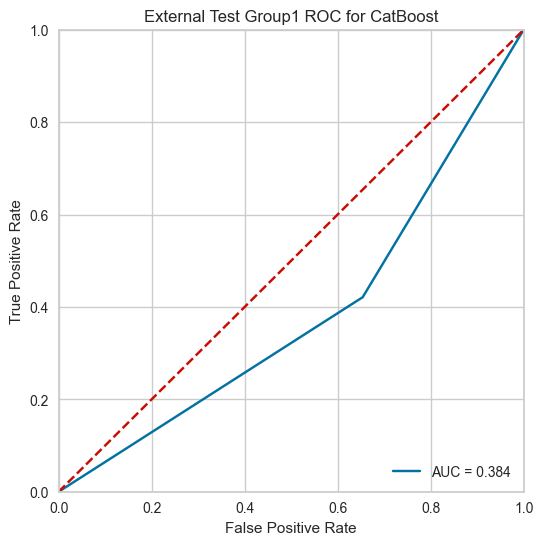

In [140]:
######CatBoost  测试集1
#############画图部分
# from sklearn.datasets import load_breast_cancer
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier
# from sklearn.model_selection import train_test_split
import pylab as plt
import warnings;warnings.filterwarnings('ignore')
fpr, tpr, threshold = metrics.roc_curve(external_test_label, external_test_pred)
roc_auc = metrics.auc(fpr, tpr)
plt.figure(figsize=(6,6))
plt.title('External Test Group1 ROC for CatBoost')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.3f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()



In [141]:
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="black" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion matrix, without normalization
[[ 9 17]
 [11  8]]
Normalized confusion matrix
[[0.35 0.65]
 [0.58 0.42]]


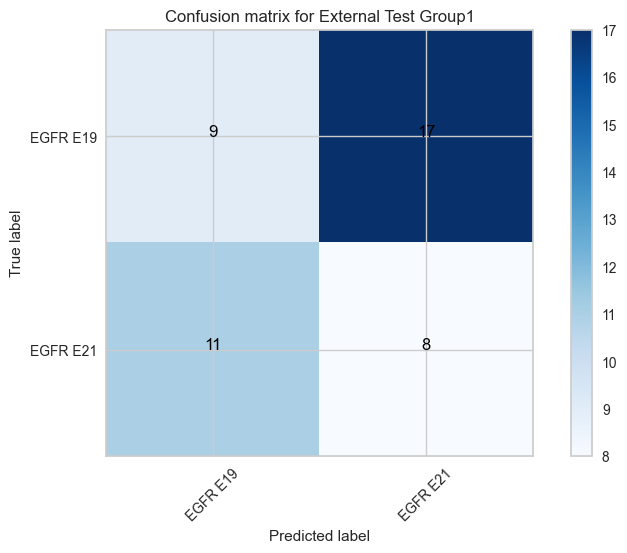

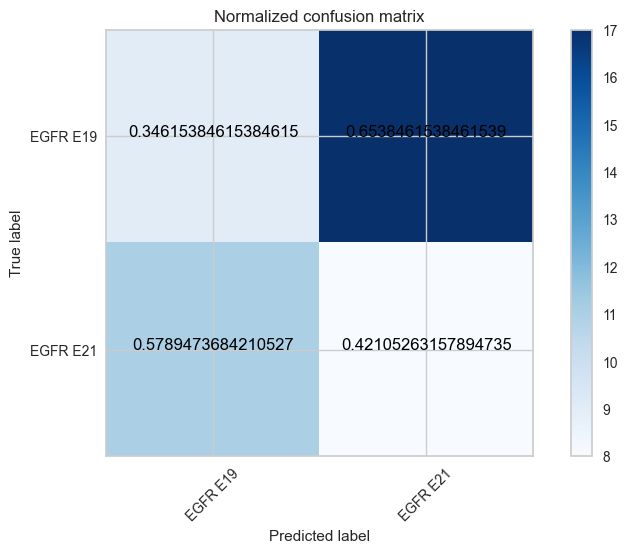

In [142]:
######CatBoost  测试集1
# Compute confusion matrix
cnf_matrix = confusion_matrix(external_test_label, external_test_pred)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Confusion matrix for External Test Group1')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,
                      title='Normalized confusion matrix')

plt.show()

In [143]:
######adaboost  测试集1
import numpy as np
# # Load the model that we saved before
pathpkl = '/RFE-RF-GB/SVM/AdaBoost.pkl'
finalpkl =  OSPath + pathpkl
adb = pickle.load(open(finalpkl, 'rb'))
external_test_pred=adb.predict(external_test)
path = '/RFE-RF-GB/ex-test-for-auc-dca-adb-SVM-73.csv'
pathaucfinal = OSPath + path
np.savetxt(pathaucfinal, external_test_pred, delimiter = ',')


# adb = pickle.load(open('C:/Users/zuoya/Desktop/Code/ipypb-fs/08_Catboost/Catboost/767cases/EGFR-1921-FS/RFE-RF-GB/RFERF19/AdaBoost.pkl', 'rb'))
# external_test_pred=adb.predict(external_test)
# np.savetxt('C:/Users/zuoya/Desktop/Code/ipypb-fs/08_Catboost/Catboost/767cases/EGFR-1921-FS/RFE-RF-GB/ex-test-for-auc-dca-adb-RFERF19-73.csv', external_test_pred, delimiter = ',')
auc = roc_auc_score(external_test_label, external_test_pred)
precision = precision_score(external_test_label, external_test_pred, pos_label=1, average='binary', sample_weight=None)
accuracy = accuracy_score(external_test_label, external_test_pred)
recall = recall_score(external_test_label, external_test_pred, average="binary", pos_label=1)
# f1_score = f1_score(external_test_label, external_test_pred)
# f1_score = f1_score(external_test_label, external_test_pred, average='weighted')
class_names = ["EGFR E19", "EGFR E21"]
print(classification_report(external_test_label, external_test_pred, target_names=class_names))
print('precision',precision,'accuracy',accuracy,'recall',recall,'auc',auc)


              precision    recall  f1-score   support

    EGFR E19       0.54      0.50      0.52        26
    EGFR E21       0.38      0.42      0.40        19

    accuracy                           0.47        45
   macro avg       0.46      0.46      0.46        45
weighted avg       0.47      0.47      0.47        45

precision 0.38095238095238093 accuracy 0.4666666666666667 recall 0.42105263157894735 auc 0.4605263157894737


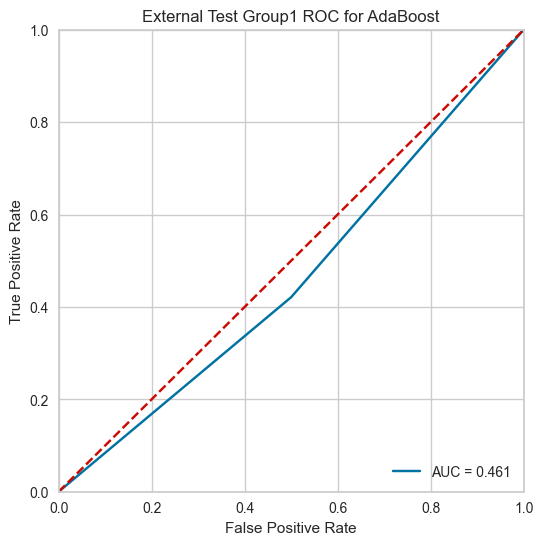

In [144]:
######adaboost  测试集1
#############画图部分
# from sklearn.datasets import load_breast_cancer
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier
# from sklearn.model_selection import train_test_split
import pylab as plt
import warnings;warnings.filterwarnings('ignore')
fpr, tpr, threshold = metrics.roc_curve(external_test_label, external_test_pred)
roc_auc = metrics.auc(fpr, tpr)
plt.figure(figsize=(6,6))
plt.title('External Test Group1 ROC for AdaBoost')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.3f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()



In [145]:
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="black" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion matrix, without normalization
[[13 13]
 [11  8]]
Normalized confusion matrix
[[0.5  0.5 ]
 [0.58 0.42]]


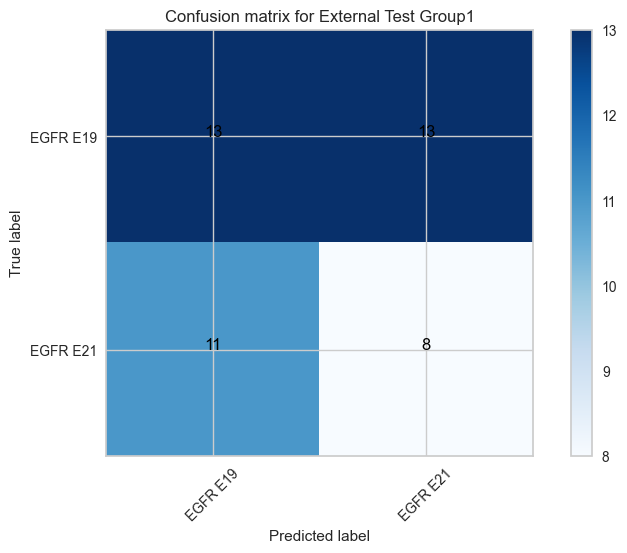

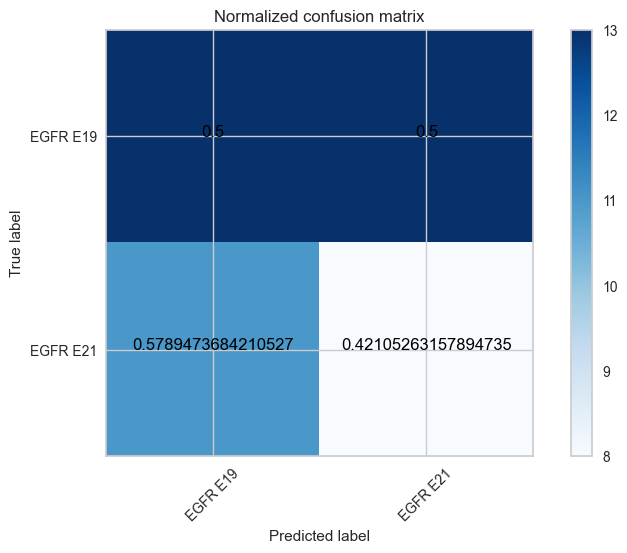

In [146]:
######adaboost  测试集1
# Compute confusion matrix
cnf_matrix = confusion_matrix(external_test_label, external_test_pred)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Confusion matrix for External Test Group1')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,
                      title='Normalized confusion matrix')

plt.show()

In [147]:
######XGB  测试集1
import numpy as np
import pickle
import numpy as np
import pandas as pd
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score, recall_score, f1_score
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno

from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from ngboost import NGBClassifier

import os
import pickle

from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve, classification_report, confusion_matrix, plot_confusion_matrix
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, StratifiedKFold

from yellowbrick.classifier import ConfusionMatrix, ClassificationReport, ROCAUC, ClassPredictionError
from yellowbrick.model_selection import LearningCurve, FeatureImportances

# # Load the model that we saved before
pathpkl = '/RFE-RF-GB/SVM/XGBoost.pkl'
finalpkl =  OSPath + pathpkl
xgb = pickle.load(open(finalpkl, 'rb'))
external_test_pred=xgb.predict(external_test)
path = '/RFE-RF-GB/ex-test-for-auc-dca-xgb-SVM-73.csv'
pathaucfinal = OSPath + path
np.savetxt(pathaucfinal, external_test_pred, delimiter = ',')


# xgb = pickle.load(open('C:/Users/zuoya/Desktop/Code/ipypb-fs/08_Catboost/Catboost/767cases/EGFR-1921-FS/RFE-RF-GB/RFERF19/XGBoost.pkl', 'rb'))
# external_test_pred=xgb.predict(external_test)
# np.savetxt('C:/Users/zuoya/Desktop/Code/ipypb-fs/08_Catboost/Catboost/767cases/EGFR-1921-FS/RFE-RF-GB/ex-test-for-auc-dca-xgb-RFERF19-73.csv', external_test_pred, delimiter = ',')
auc = roc_auc_score(external_test_label, external_test_pred)
precision = precision_score(external_test_label, external_test_pred, pos_label=1, average='macro', sample_weight=None)
accuracy = accuracy_score(external_test_label, external_test_pred)
recall = recall_score(external_test_label, external_test_pred, average="macro", pos_label=1)
# f1_score = f1_score(external_test_label, external_test_pred)
# f1_score = f1_score(external_test_label, external_test_pred, average='weighted')
class_names = ["EGFR E19", "EGFR E21"]
print(classification_report(external_test_label, external_test_pred, target_names=class_names))
print('precision',precision,'accuracy',accuracy,'recall',recall,'auc',auc)
# precision 0.625 accuracy 0.6349206349206349 recall 0.7575757575757576 auc 0.6287878787878788
# precision    recall  f1-score   support

#     EGFR_E19       0.65      0.50      0.57        30
#     EGFR_E21       0.62      0.76      0.68        33

#     accuracy                           0.63        63
#    macro avg       0.64      0.63      0.63        63
# weighted avg       0.64      0.63      0.63        63


              precision    recall  f1-score   support

    EGFR E19       0.41      0.27      0.33        26
    EGFR E21       0.32      0.47      0.38        19

    accuracy                           0.36        45
   macro avg       0.37      0.37      0.35        45
weighted avg       0.37      0.36      0.35        45

precision 0.3665966386554622 accuracy 0.35555555555555557 recall 0.3714574898785425 auc 0.3714574898785425


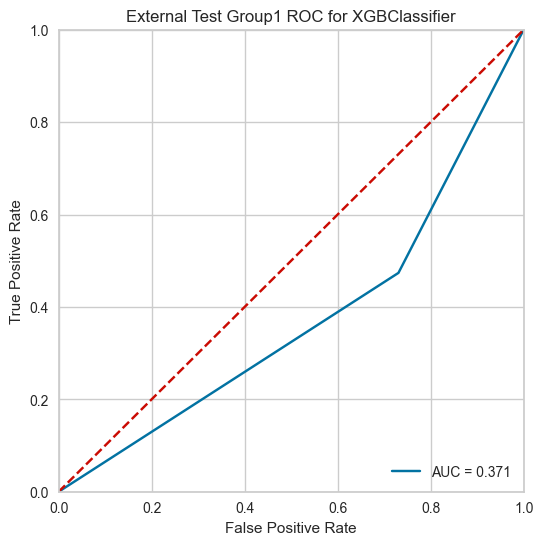

In [148]:
######XGB  测试集1
#############画图部分
# from sklearn.datasets import load_breast_cancer
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier
# from sklearn.model_selection import train_test_split
import pylab as plt
import warnings;warnings.filterwarnings('ignore')
fpr, tpr, threshold = metrics.roc_curve(external_test_label, external_test_pred)
roc_auc = metrics.auc(fpr, tpr)
plt.figure(figsize=(6,6))
plt.title('External Test Group1 ROC for XGBClassifier')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.3f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()



In [149]:
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="black" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion matrix, without normalization
[[ 7 19]
 [10  9]]
Normalized confusion matrix
[[0.27 0.73]
 [0.53 0.47]]


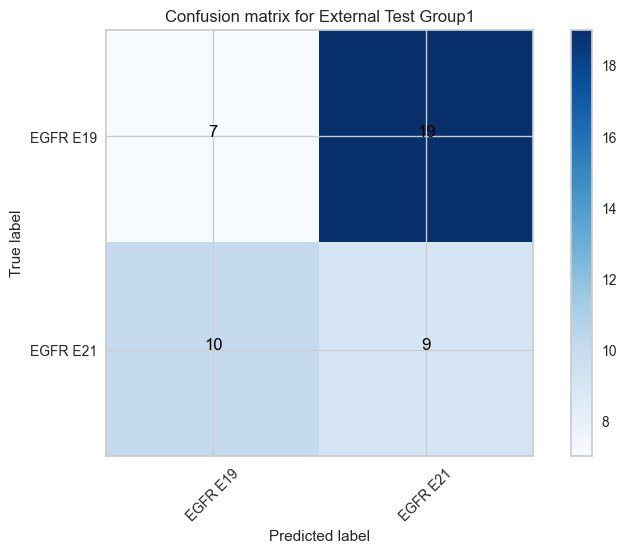

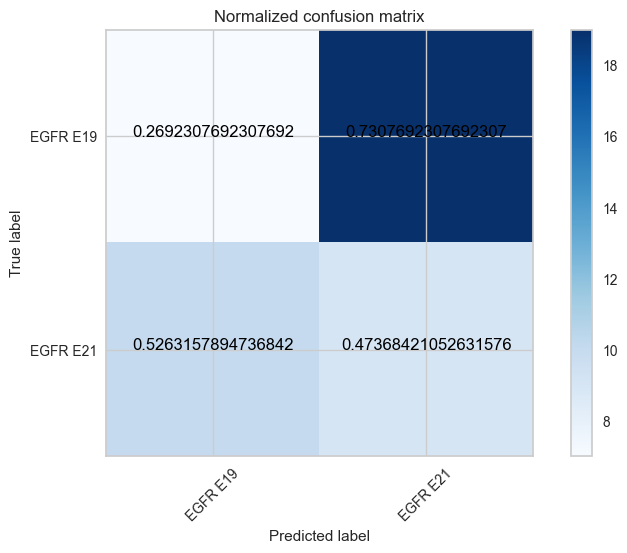

In [150]:
######XGB  测试集1
# Compute confusion matrix
cnf_matrix = confusion_matrix(external_test_label, external_test_pred)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Confusion matrix for External Test Group1')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,
                      title='Normalized confusion matrix')

plt.show()

In [151]:
#####RF  测试集1
import numpy as np
# # Load the model that we saved before
import numpy as np
# # Load the model that we saved before
pathpkl = '/RFE-RF-GB/SVM/RF.pkl'
finalpkl =  OSPath + pathpkl
rft = pickle.load(open(finalpkl, 'rb'))
external_test_pred=rft.predict(external_test)
path = '/RFE-RF-GB/ex-test-for-auc-dca-RF-SVM-73.csv'
pathaucfinal = OSPath + path
np.savetxt(pathaucfinal, external_test_pred, delimiter = ',')
# rft = pickle.load(open('C:/Users/zuoya/Desktop/Code/ipypb-fs/08_Catboost/Catboost/767cases/EGFR-1921-FS/RFE-RF-GB/RFERF19/RF.pkl', 'rb'))
# external_test_pred=rft.predict(external_test)
# np.savetxt('C:/Users/zuoya/Desktop/Code/ipypb-fs/08_Catboost/Catboost/767cases/EGFR-1921-FS/RFE-RF-GB/ex-test-for-auc-dca-RF-RFERF19-73.csv', external_test_pred, delimiter = ',')
auc = roc_auc_score(external_test_label, external_test_pred)
precision = precision_score(external_test_label, external_test_pred, pos_label=1, average='binary', sample_weight=None)
accuracy = accuracy_score(external_test_label, external_test_pred)
recall = recall_score(external_test_label, external_test_pred, average="binary", pos_label=1)
# f1_score = f1_score(external_test_label, external_test_pred)
# f1_score = f1_score(external_test_label, external_test_pred, average='weighted')
class_names = ["EGFR E19", "EGFR E21"]
print(classification_report(external_test_label, external_test_pred, target_names=class_names))
print('precision',precision,'accuracy',accuracy,'recall',recall,'auc',auc)

              precision    recall  f1-score   support

    EGFR E19       0.45      0.38      0.42        26
    EGFR E21       0.30      0.37      0.33        19

    accuracy                           0.38        45
   macro avg       0.38      0.38      0.38        45
weighted avg       0.39      0.38      0.38        45

precision 0.30434782608695654 accuracy 0.37777777777777777 recall 0.3684210526315789 auc 0.3765182186234818


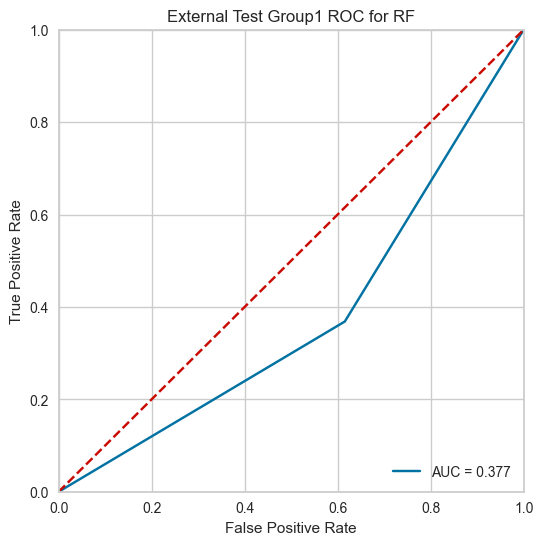

In [152]:
#####RF  测试集1
fpr, tpr, threshold = metrics.roc_curve(external_test_label, external_test_pred)
roc_auc = metrics.auc(fpr, tpr)
plt.figure(figsize=(6,6))
plt.title('External Test Group1 ROC for RF')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.3f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

Confusion matrix, without normalization
[[10 16]
 [12  7]]
Normalized confusion matrix
[[0.38 0.62]
 [0.63 0.37]]


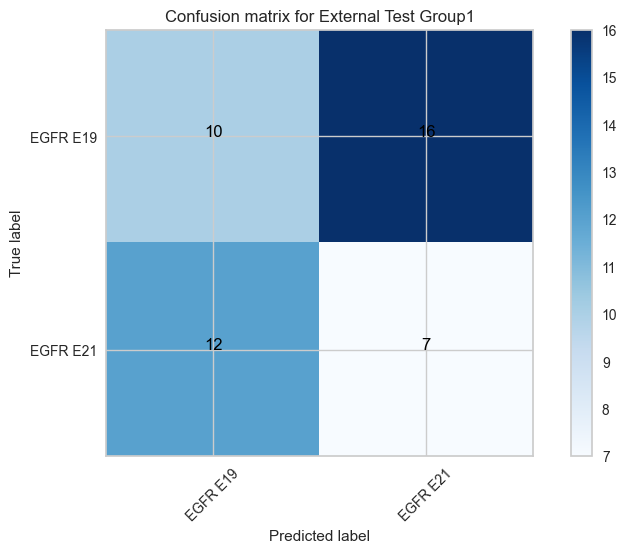

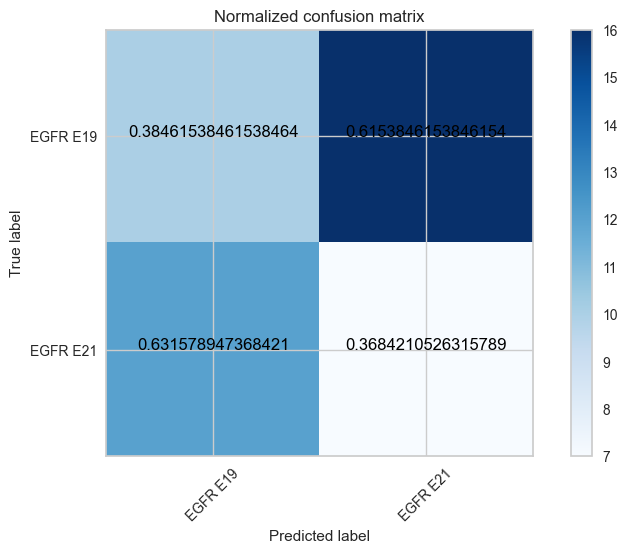

In [153]:
#####RF  测试集1
# Compute confusion matrix
cnf_matrix = confusion_matrix(external_test_label, external_test_pred)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Confusion matrix for External Test Group1')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,
                      title='Normalized confusion matrix')

plt.show()

In [154]:
######LR 测试集1
import numpy as np
# # Load the model that we saved before
pathpkl = '/RFE-RF-GB/SVM/LogisticRegression.pkl'
finalpkl =  OSPath + pathpkl
lrt = pickle.load(open(finalpkl, 'rb'))
external_test_pred=lrt.predict(external_test)
path = '/RFE-RF-GB/ex-test-for-auc-dca-lr-SVM-73.csv'
pathaucfinal = OSPath + path
np.savetxt(pathaucfinal, external_test_pred, delimiter = ',')
# lrt = pickle.load(open('C:/Users/zuoya/Desktop/Code/ipypb-fs/08_Catboost/Catboost/767cases/EGFR-1921-FS/RFE-RF-GB/RFERF19/LogisticRegression.pkl', 'rb'))
# external_test_pred=lrt.predict(external_test)
# np.savetxt('C:/Users/zuoya/Desktop/Code/ipypb-fs/08_Catboost/Catboost/767cases/EGFR-1921-FS/RFE-RF-GB/ex-test-for-auc-dca-lr-RFERF19-73.csv', external_test_pred, delimiter = ',')
auc = roc_auc_score(external_test_label, external_test_pred)
precision = precision_score(external_test_label, external_test_pred, pos_label=1, average='binary', sample_weight=None)
accuracy = accuracy_score(external_test_label, external_test_pred)
recall = recall_score(external_test_label, external_test_pred, average="binary", pos_label=1)
# f1_score = f1_score(external_test_label, external_test_pred)
# f1_score = f1_score(external_test_label, external_test_pred, average='weighted')
class_names = ["EGFR E19", "EGFR E21"]
print(classification_report(external_test_label, external_test_pred, target_names=class_names))
print('precision',precision,'accuracy',accuracy,'recall',recall,'auc',auc)


              precision    recall  f1-score   support

    EGFR E19       0.48      0.42      0.45        26
    EGFR E21       0.32      0.37      0.34        19

    accuracy                           0.40        45
   macro avg       0.40      0.40      0.40        45
weighted avg       0.41      0.40      0.40        45

precision 0.3181818181818182 accuracy 0.4 recall 0.3684210526315789 auc 0.39574898785425106


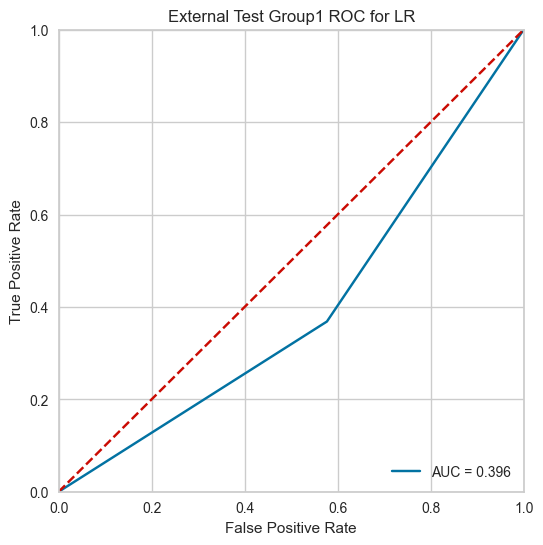

In [155]:
######LR 测试集1
fpr, tpr, threshold = metrics.roc_curve(external_test_label, external_test_pred)
roc_auc = metrics.auc(fpr, tpr)
plt.figure(figsize=(6,6))
plt.title('External Test Group1 ROC for LR')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.3f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

Confusion matrix, without normalization
[[11 15]
 [12  7]]
Normalized confusion matrix
[[0.42 0.58]
 [0.63 0.37]]


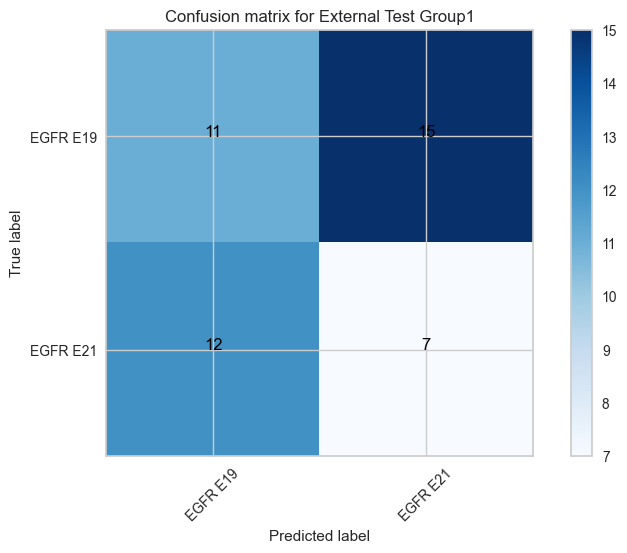

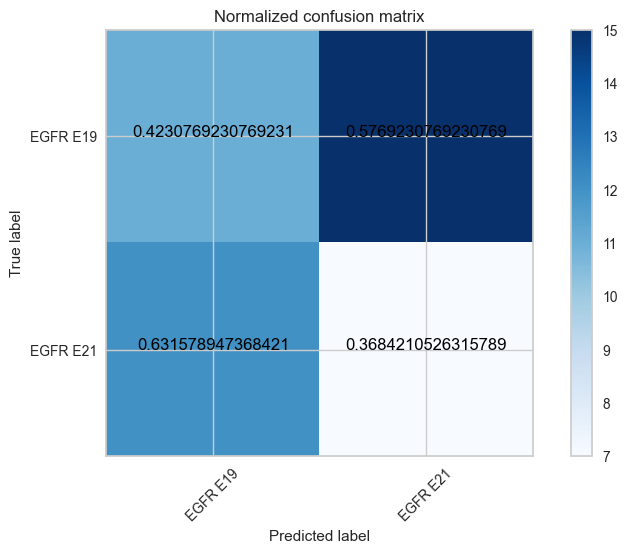

In [156]:
#####LR  测试集1
# Compute confusion matrix
cnf_matrix = confusion_matrix(external_test_label, external_test_pred)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Confusion matrix for External Test Group1')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,
                      title='Normalized confusion matrix')

plt.show()

In [157]:
##GBDT 测试集1
import numpy as np
# # Load the model that we saved before
pathpkl = '/RFE-RF-GB/SVM/GBDT.pkl'
finalpkl =  OSPath + pathpkl
GBDT = pickle.load(open(finalpkl, 'rb'))
external_test_pred=GBDT.predict(external_test)
path = '/RFE-RF-GB/ex-test-for-auc-dca-GBDT-SVM-73.csv'
pathaucfinal = OSPath + path
np.savetxt(pathaucfinal, external_test_pred, delimiter = ',')
# svm = pickle.load(open('C:/Users/zuoya/Desktop/Code/ipypb-fs/08_Catboost/Catboost/767cases/EGFR-1921-FS/RFE-RF-GB/RFERF19/LightGBM.pkl', 'rb'))
# external_test_pred=lgbt.predict(external_test)
# np.savetxt('C:/Users/zuoya/Desktop/Code/ipypb-fs/08_Catboost/Catboost/767cases/EGFR-1921-FS/RFE-RF-GB/ex-test-for-auc-dca-lgb-RFERF19-73.csv', external_test_pred, delimiter = ',')
auc = roc_auc_score(external_test_label, external_test_pred)
precision = precision_score(external_test_label, external_test_pred, pos_label=1, average='binary', sample_weight=None)
accuracy = accuracy_score(external_test_label, external_test_pred)
recall = recall_score(external_test_label, external_test_pred, average="binary", pos_label=1)
# f1_score = f1_score(external_test_label, external_test_pred)
# f1_score = f1_score(external_test_label, external_test_pred, average='weighted')
class_names = ["EGFR E19", "EGFR E21"]
print(classification_report(external_test_label, external_test_pred, target_names=class_names))
print('precision',precision,'accuracy',accuracy,'recall',recall,'auc',auc)

              precision    recall  f1-score   support

    EGFR E19       0.47      0.31      0.37        26
    EGFR E21       0.36      0.53      0.43        19

    accuracy                           0.40        45
   macro avg       0.41      0.42      0.40        45
weighted avg       0.42      0.40      0.39        45

precision 0.35714285714285715 accuracy 0.4 recall 0.5263157894736842 auc 0.41700404858299595


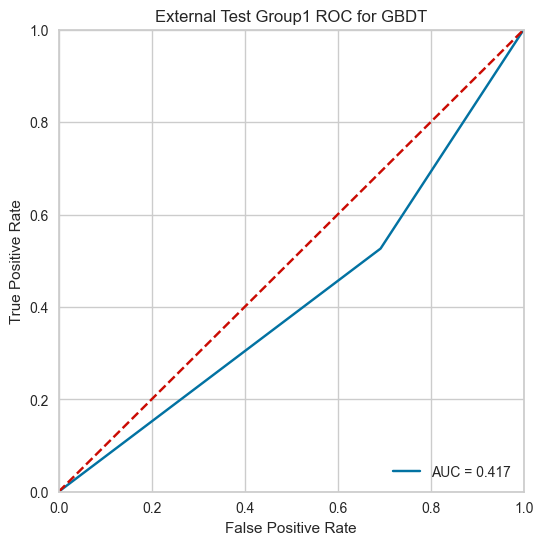

In [158]:
##GBDT 测试集1
fpr, tpr, threshold = metrics.roc_curve(external_test_label, external_test_pred)
roc_auc = metrics.auc(fpr, tpr)
plt.figure(figsize=(6,6))
plt.title('External Test Group1 ROC for GBDT')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.3f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

Confusion matrix, without normalization
[[ 8 18]
 [ 9 10]]
Normalized confusion matrix
[[0.31 0.69]
 [0.47 0.53]]


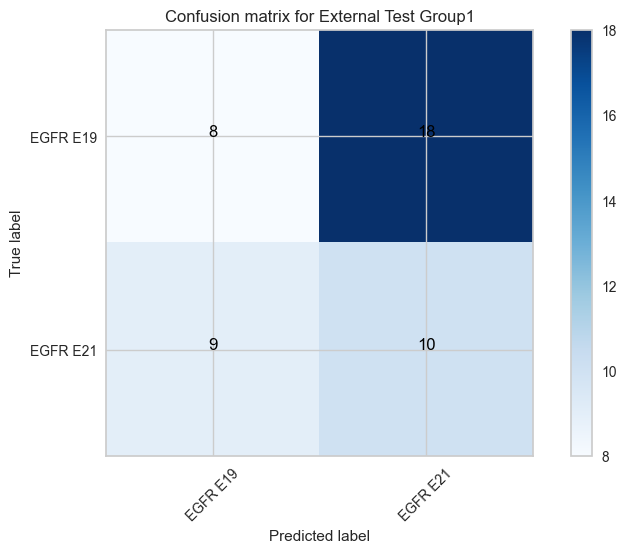

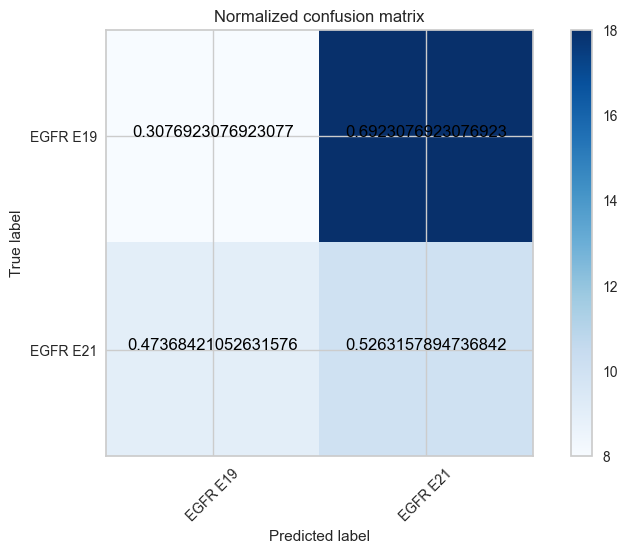

In [159]:
##GBDT 测试集1
# Compute confusion matrix
cnf_matrix = confusion_matrix(external_test_label, external_test_pred)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Confusion matrix for External Test Group1')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,
                      title='Normalized confusion matrix')

plt.show()

In [160]:
##lgb 测试集1
import numpy as np
# # Load the model that we saved before
pathpkl = '/RFE-RF-GB/SVM/LightGBM.pkl'
finalpkl =  OSPath + pathpkl
lgbt = pickle.load(open(finalpkl, 'rb'))
external_test_pred=lgbt.predict(external_test)
path = '/RFE-RF-GB/ex-test-for-auc-dca-lgb-SVM-73.csv'
pathaucfinal = OSPath + path
np.savetxt(pathaucfinal, external_test_pred, delimiter = ',')
# lgbt = pickle.load(open('C:/Users/zuoya/Desktop/Code/ipypb-fs/08_Catboost/Catboost/767cases/EGFR-1921-FS/RFE-RF-GB/RFERF19/LightGBM.pkl', 'rb'))
# external_test_pred=lgbt.predict(external_test)
# np.savetxt('C:/Users/zuoya/Desktop/Code/ipypb-fs/08_Catboost/Catboost/767cases/EGFR-1921-FS/RFE-RF-GB/ex-test-for-auc-dca-lgb-RFERF19-73.csv', external_test_pred, delimiter = ',')
auc = roc_auc_score(external_test_label, external_test_pred)
precision = precision_score(external_test_label, external_test_pred, pos_label=1, average='binary', sample_weight=None)
accuracy = accuracy_score(external_test_label, external_test_pred)
recall = recall_score(external_test_label, external_test_pred, average="binary", pos_label=1)
# f1_score = f1_score(external_test_label, external_test_pred)
# f1_score = f1_score(external_test_label, external_test_pred, average='weighted')
class_names = ["EGFR E19", "EGFR E21"]
print(classification_report(external_test_label, external_test_pred, target_names=class_names))
print('precision',precision,'accuracy',accuracy,'recall',recall,'auc',auc)

              precision    recall  f1-score   support

    EGFR E19       0.38      0.31      0.34        26
    EGFR E21       0.25      0.32      0.28        19

    accuracy                           0.31        45
   macro avg       0.32      0.31      0.31        45
weighted avg       0.33      0.31      0.31        45

precision 0.25 accuracy 0.3111111111111111 recall 0.3157894736842105 auc 0.3117408906882591


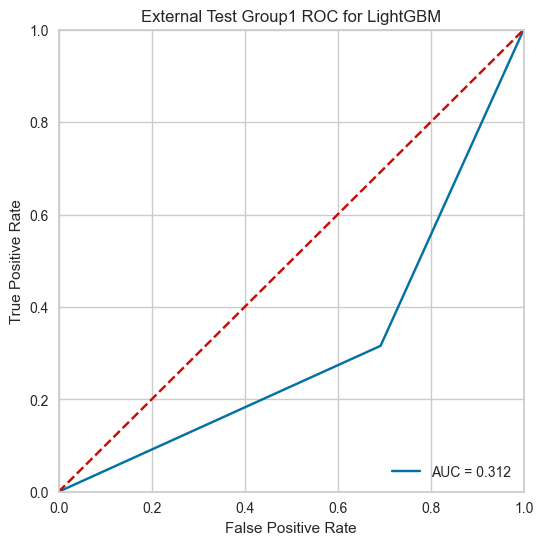

In [161]:
##lgb 测试集1
fpr, tpr, threshold = metrics.roc_curve(external_test_label, external_test_pred)
roc_auc = metrics.auc(fpr, tpr)
plt.figure(figsize=(6,6))
plt.title('External Test Group1 ROC for LightGBM')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.3f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

Confusion matrix, without normalization
[[ 8 18]
 [13  6]]
Normalized confusion matrix
[[0.31 0.69]
 [0.68 0.32]]


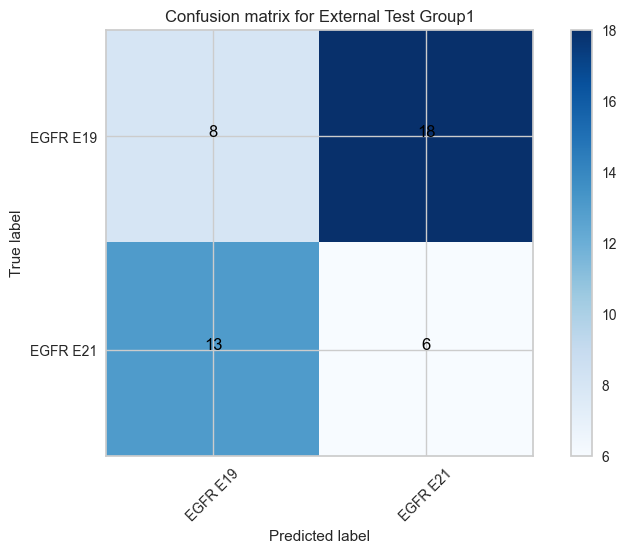

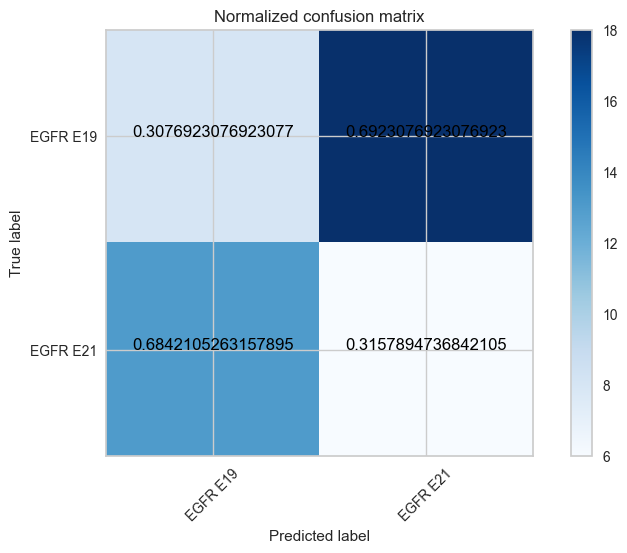

In [162]:
##lgb 测试集1
# Compute confusion matrix
cnf_matrix = confusion_matrix(external_test_label, external_test_pred)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Confusion matrix for External Test Group1')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,
                      title='Normalized confusion matrix')

plt.show()